# DataCollection For All Landmarks of Images

In [1]:
#import all necessary libraries
import os
import csv
import cv2
import tensorflow as tf
import numpy as np
import dlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

### Loading the 81Landmark DAT File

In [2]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_81_face_landmarks.dat')

### Code to generate Landmark for each image using DLIB

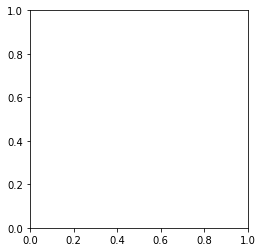

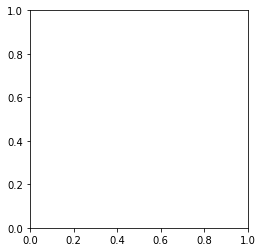

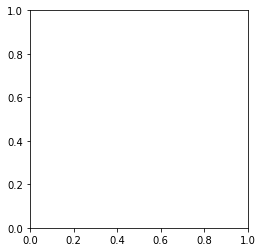

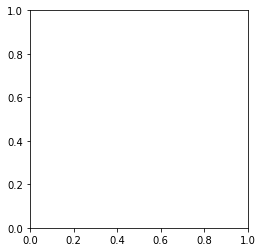

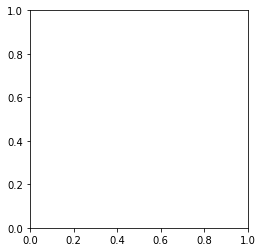

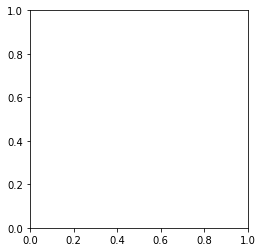

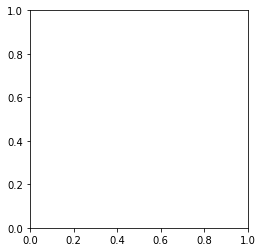

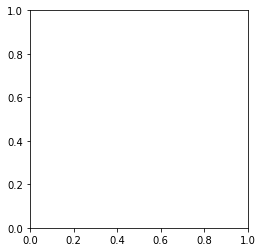

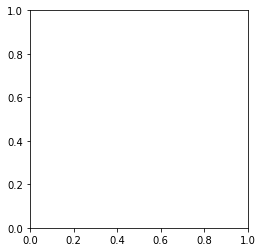

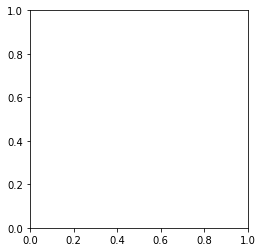

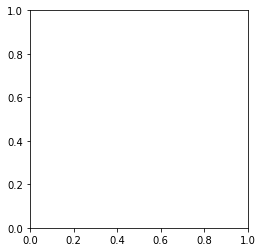

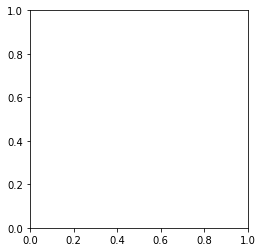

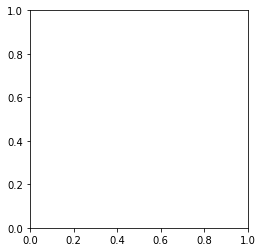

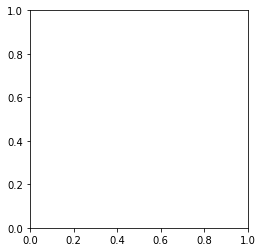

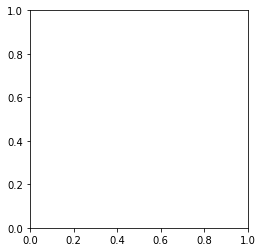

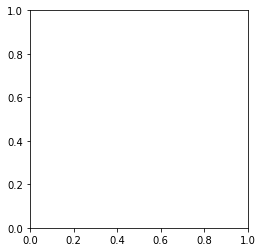

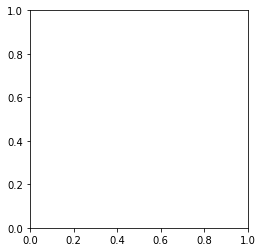

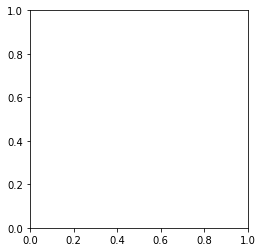

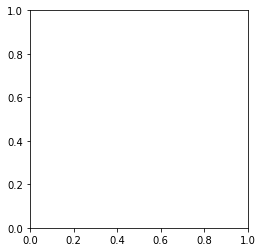

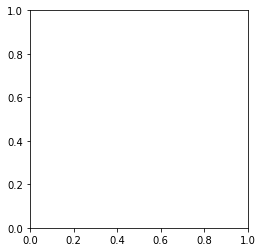

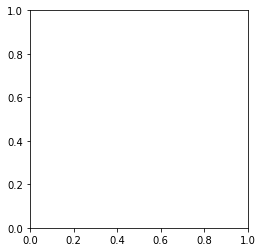

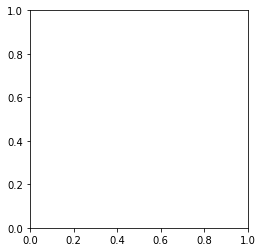

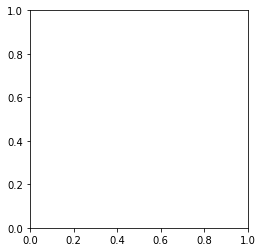

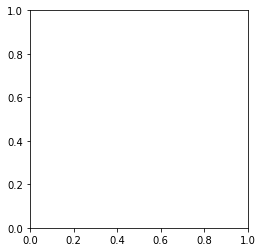

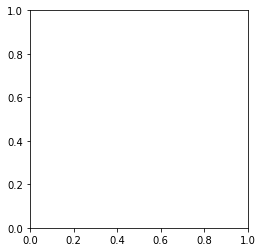

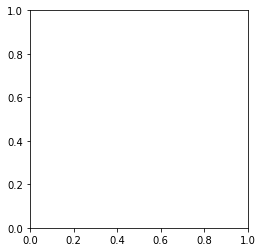

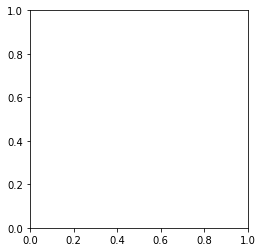

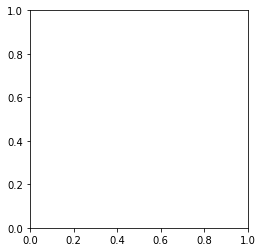

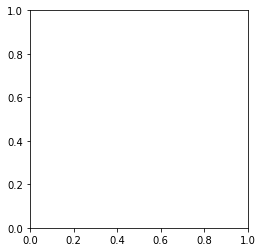

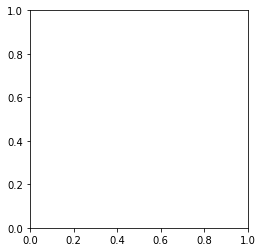

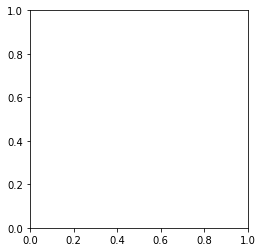

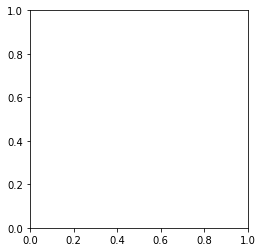

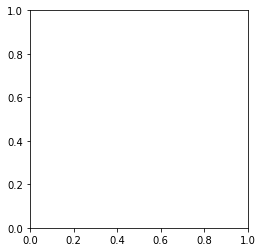

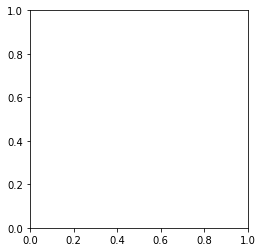

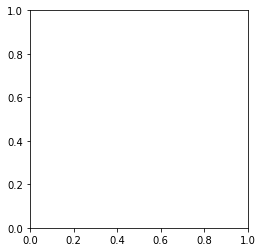

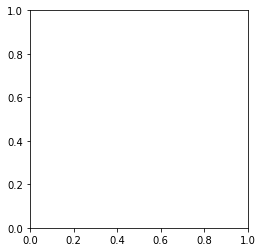

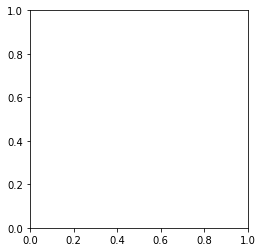

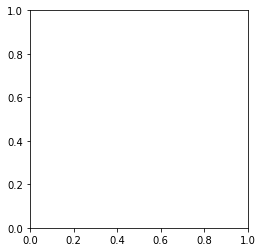

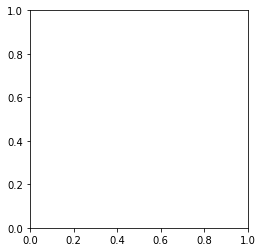

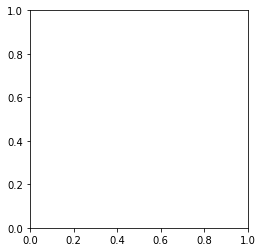

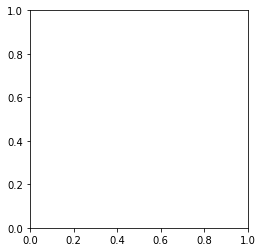

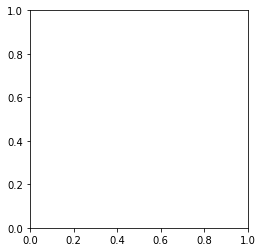

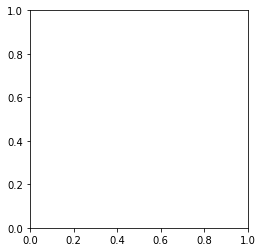

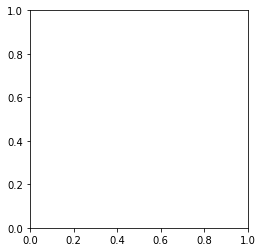

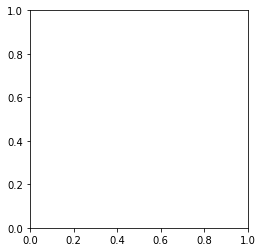

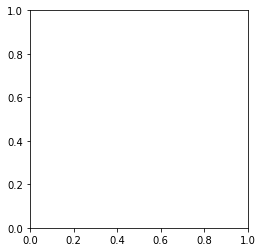

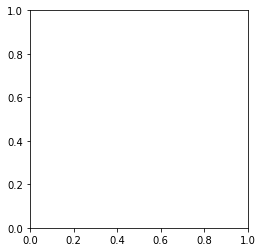

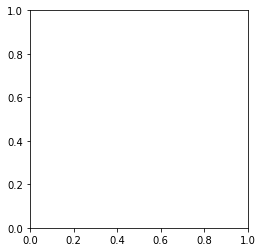

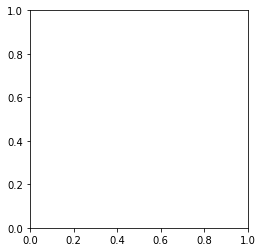

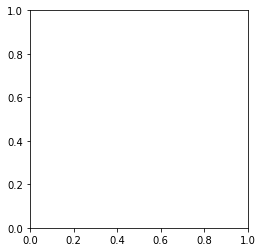

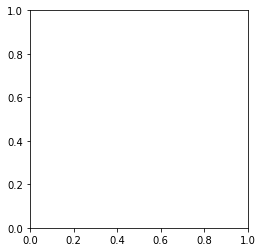

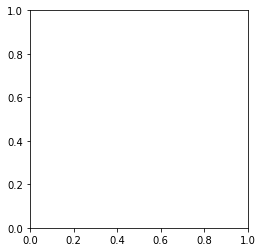

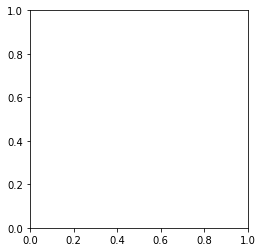

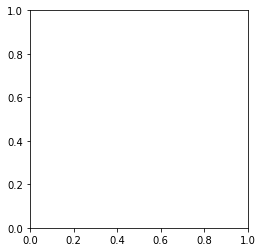

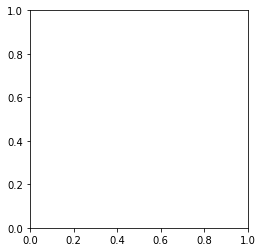

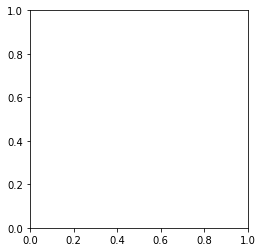

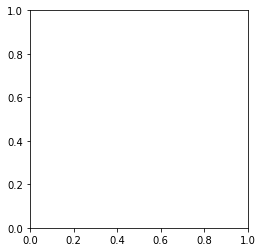

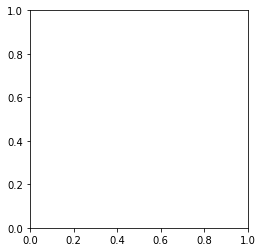

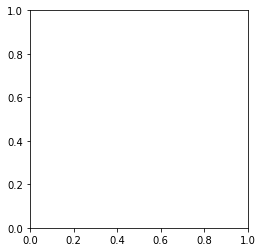

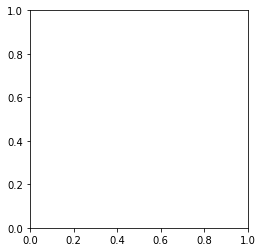

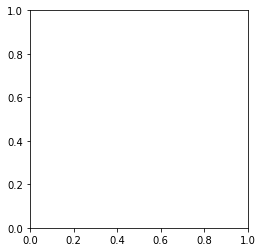

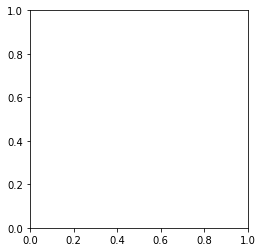

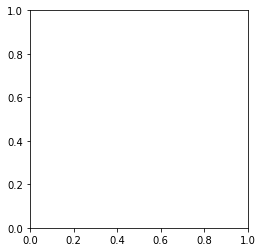

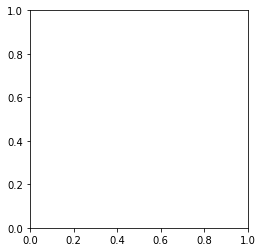

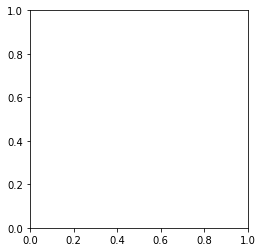

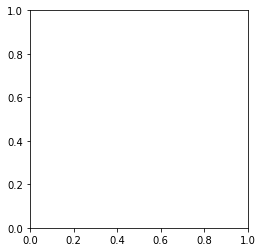

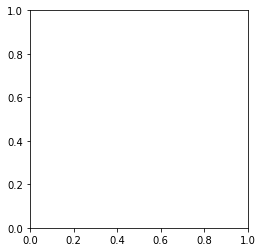

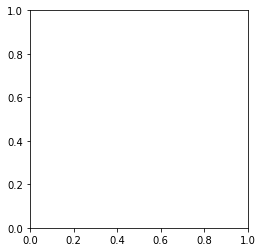

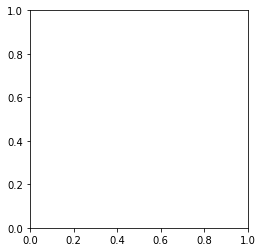

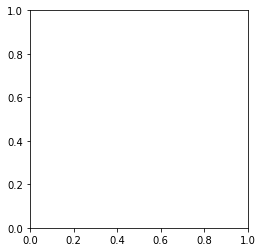

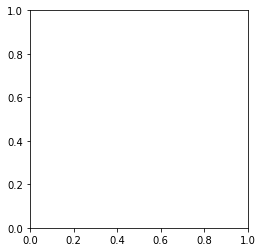

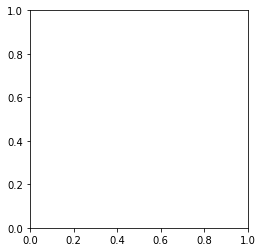

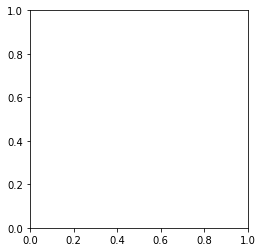

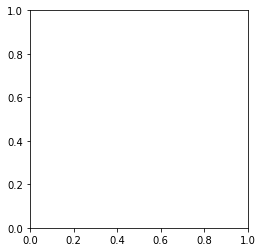

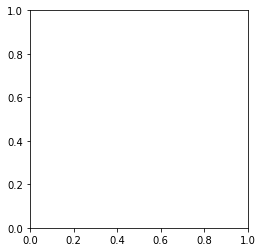

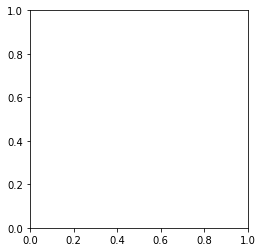

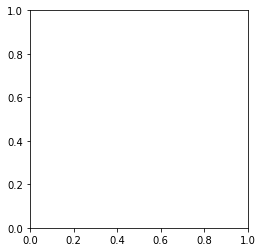

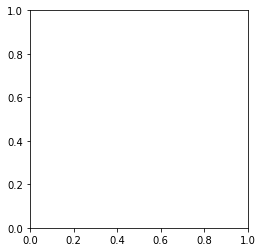

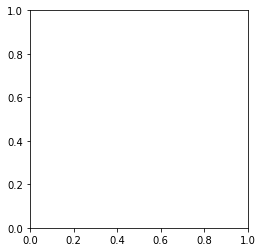

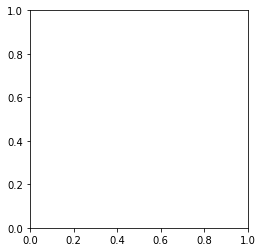

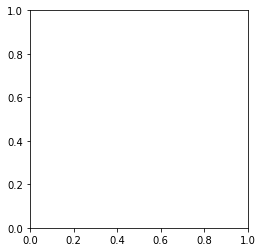

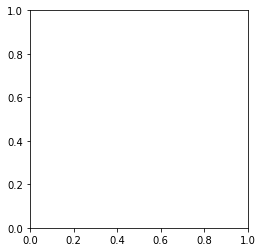

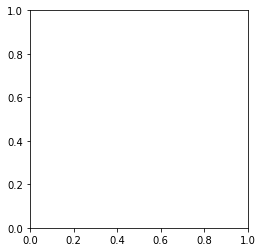

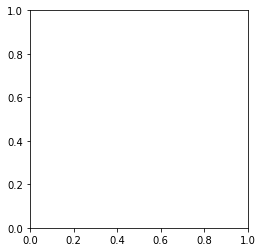

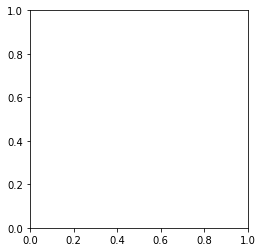

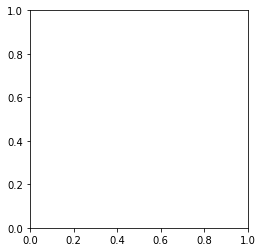

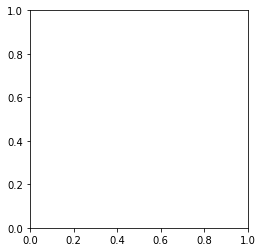

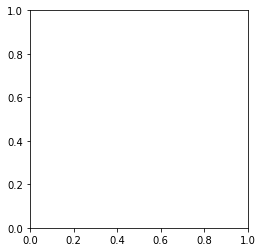

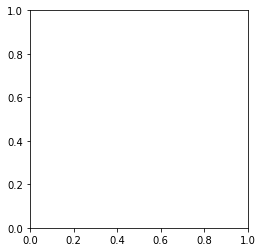

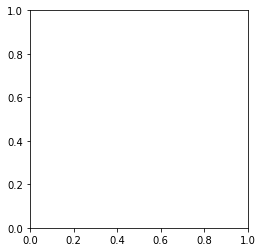

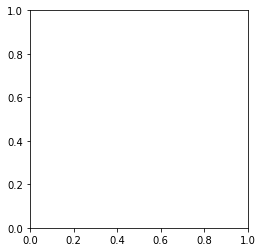

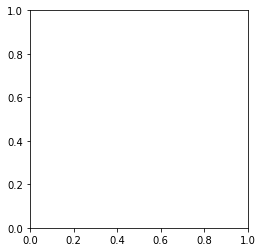

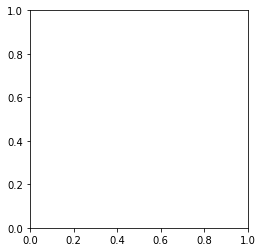

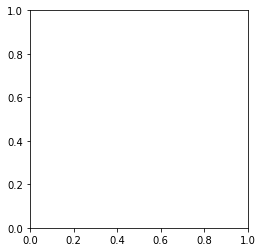

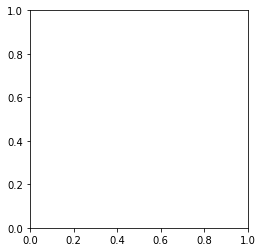

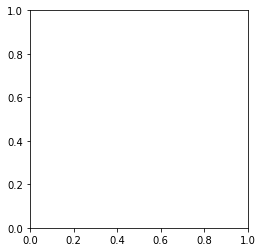

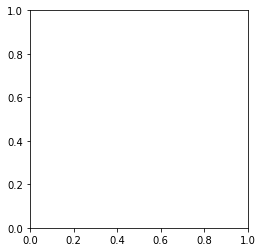

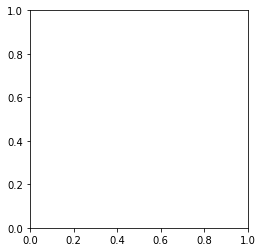

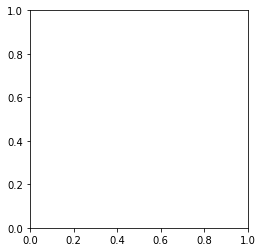

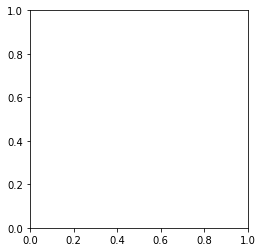

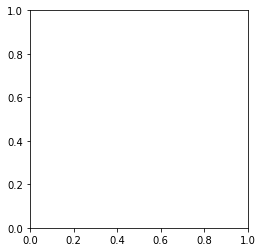

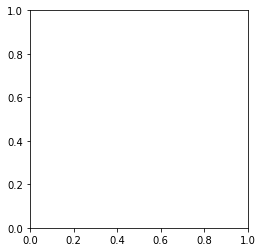

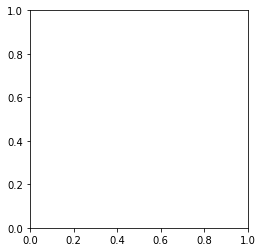

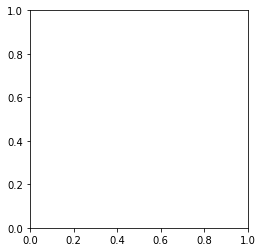

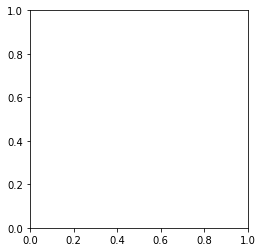

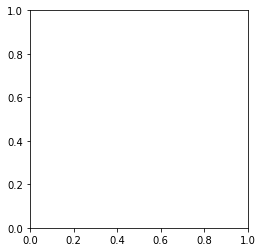

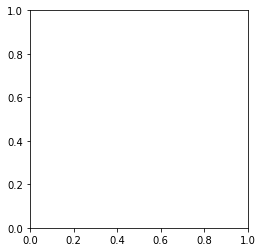

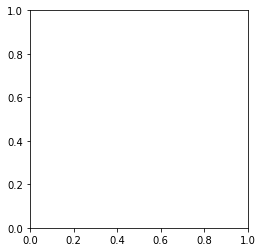

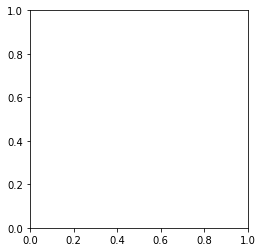

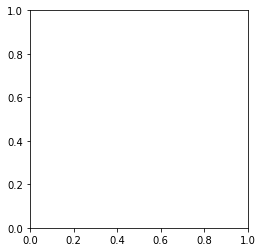

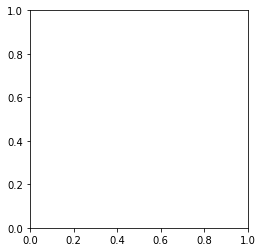

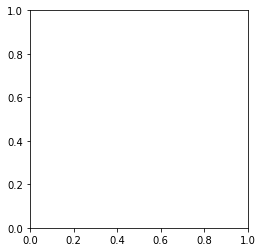

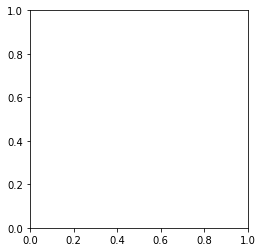

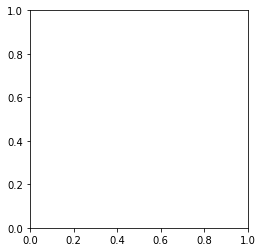

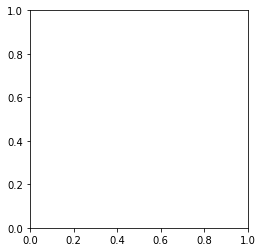

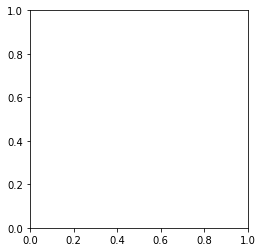

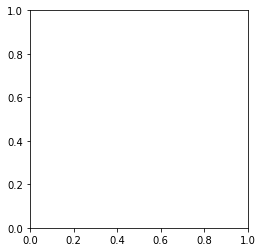

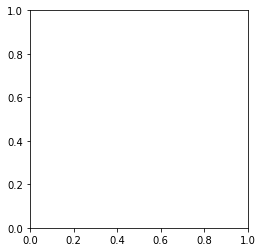

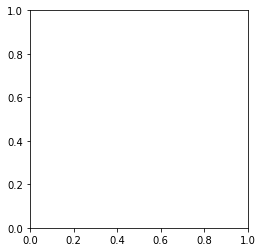

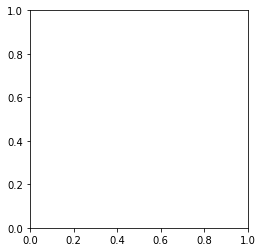

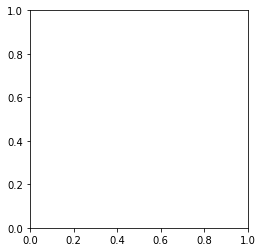

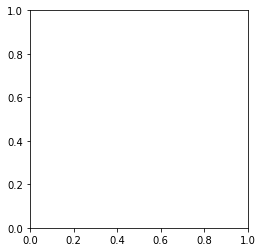

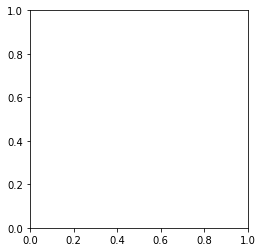

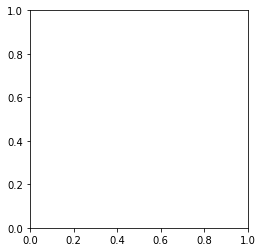

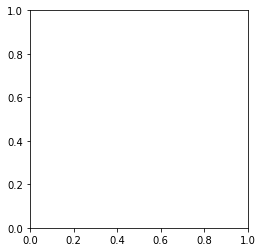

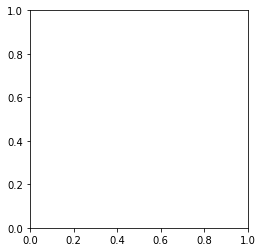

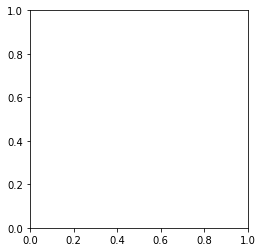

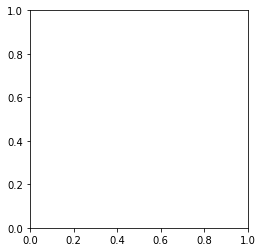

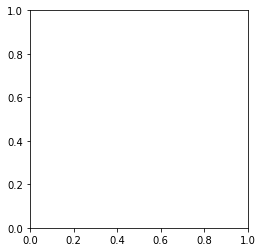

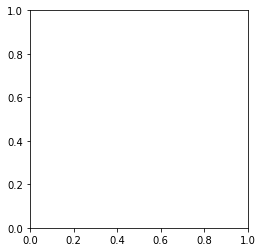

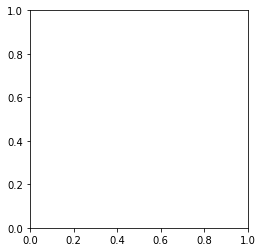

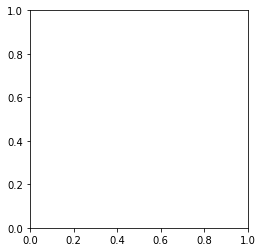

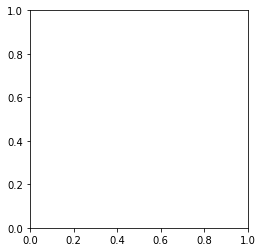

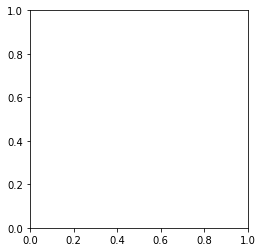

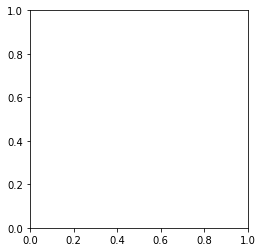

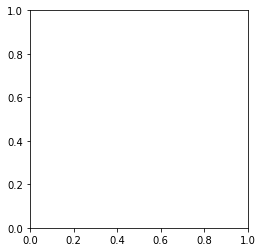

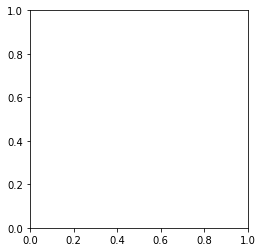

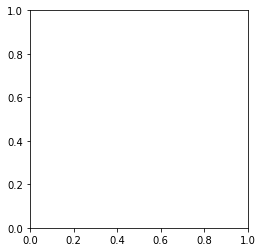

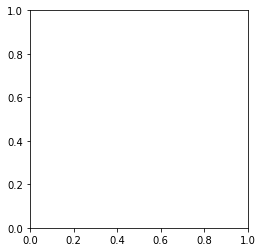

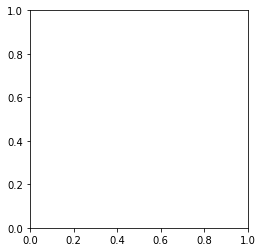

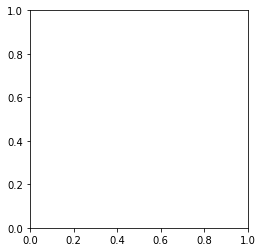

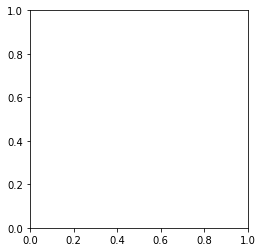

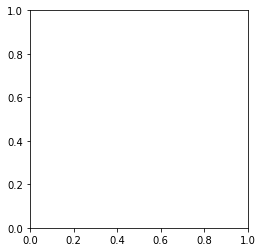

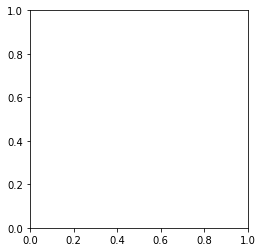

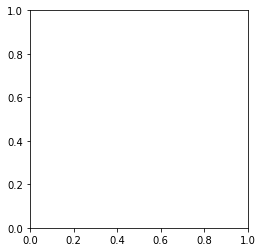

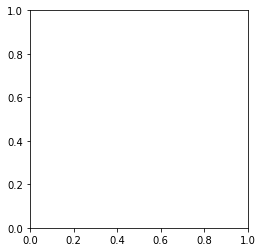

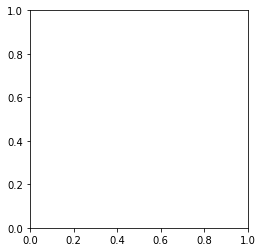

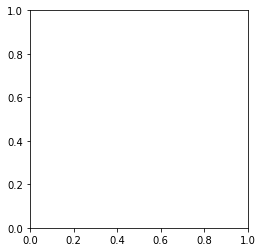

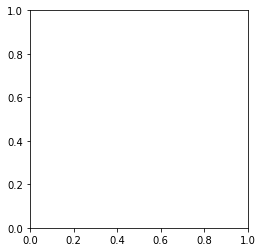

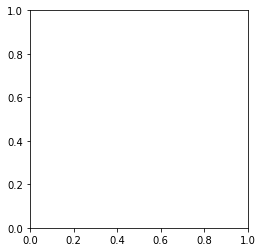

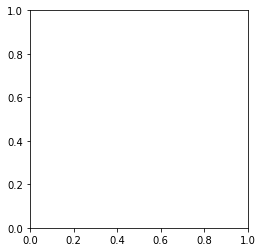

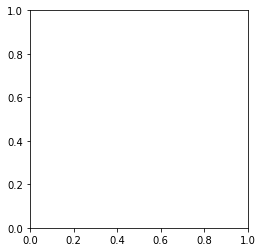

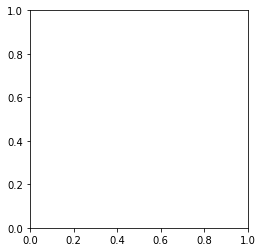

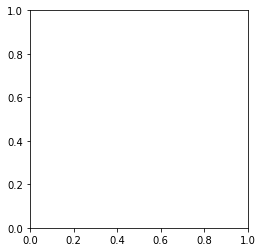

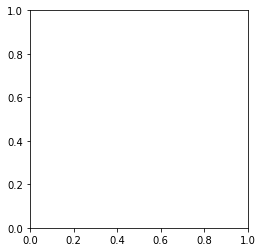

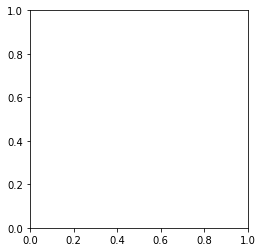

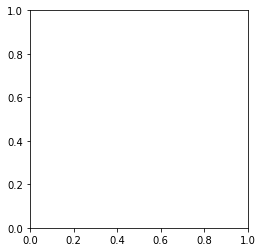

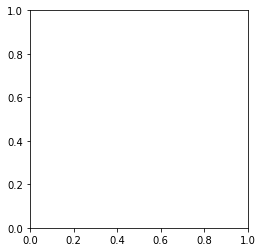

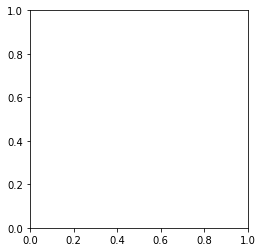

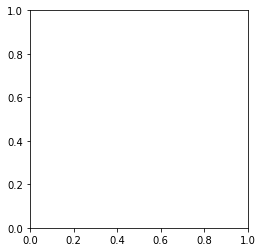

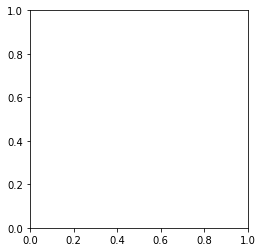

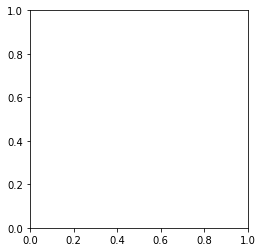

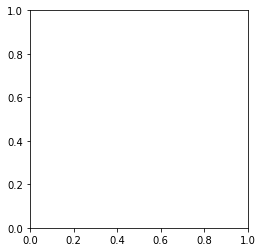

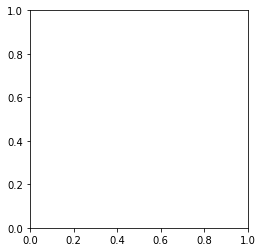

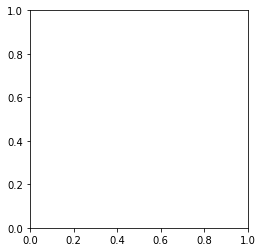

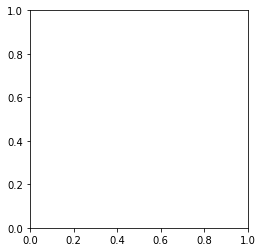

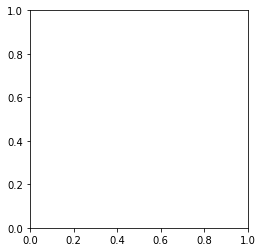

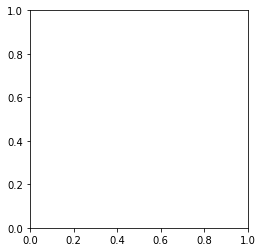

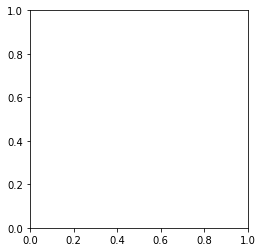

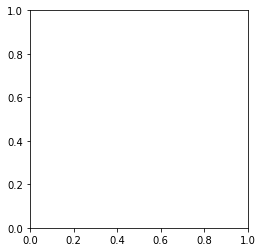

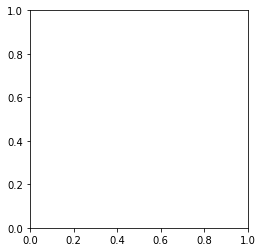

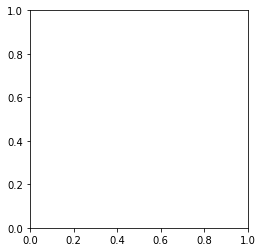

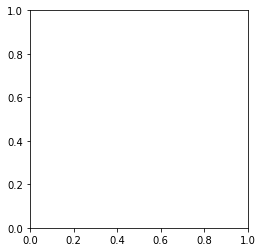

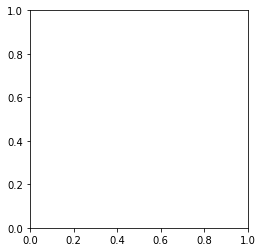

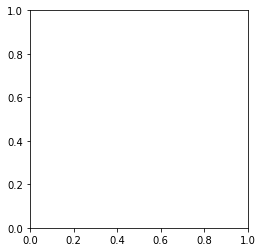

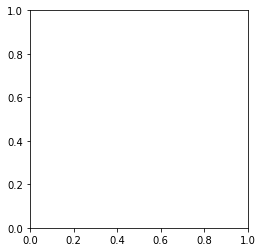

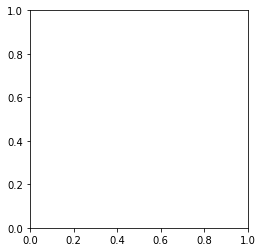

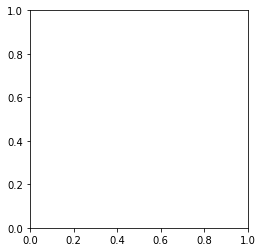

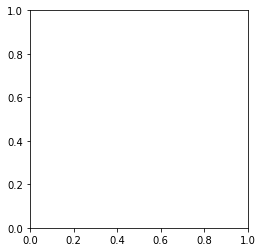

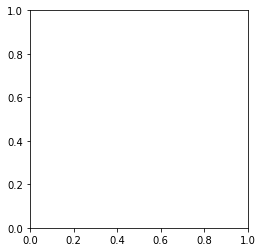

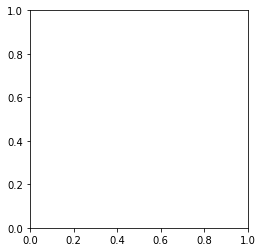

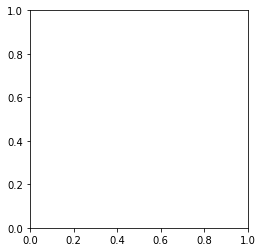

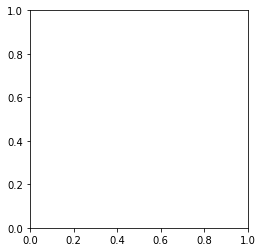

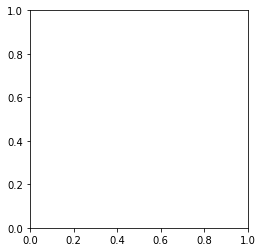

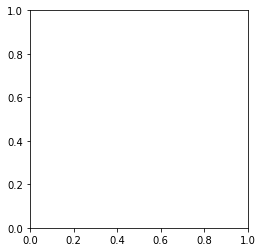

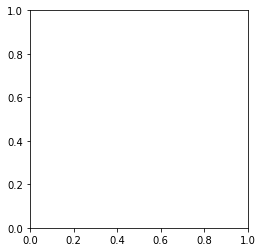

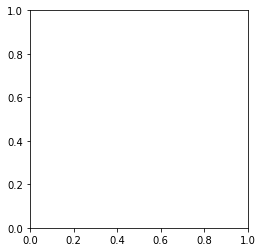

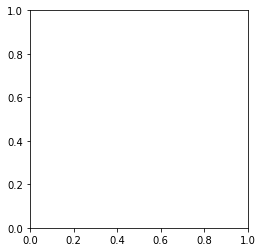

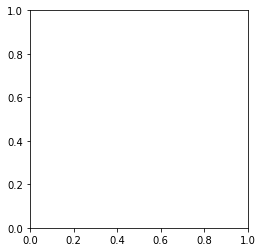

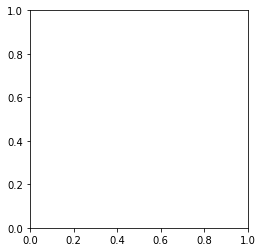

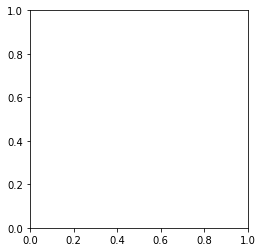

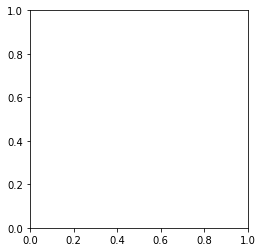

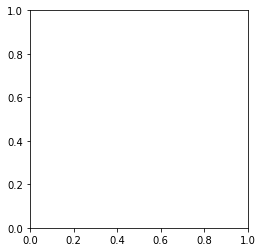

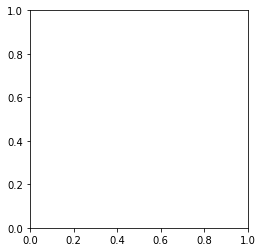

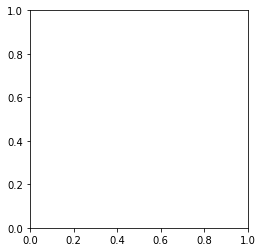

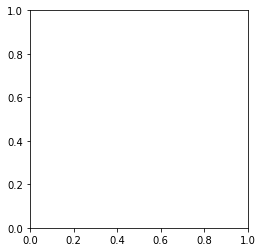

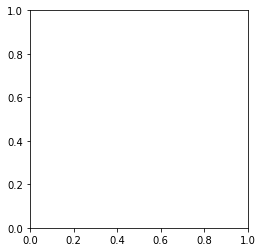

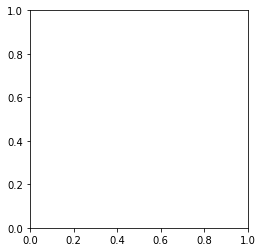

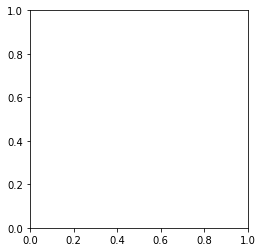

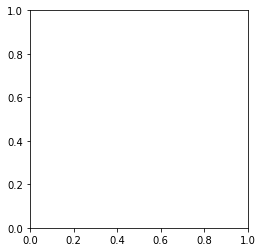

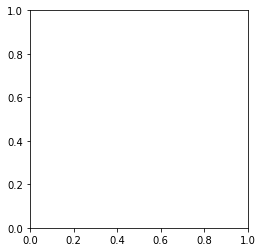

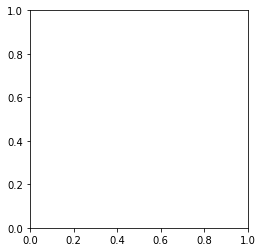

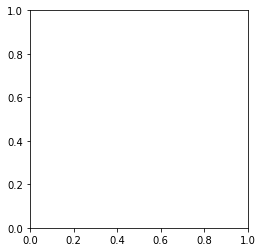

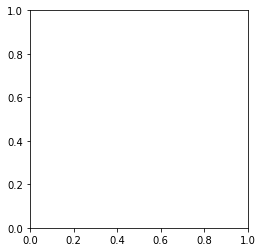

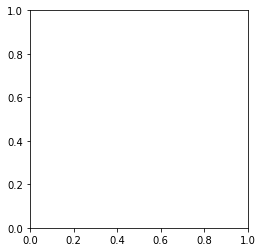

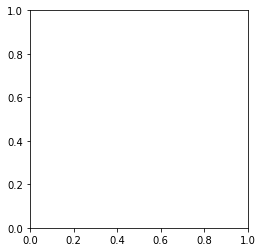

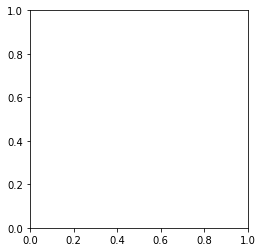

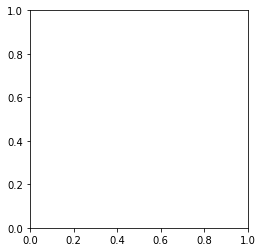

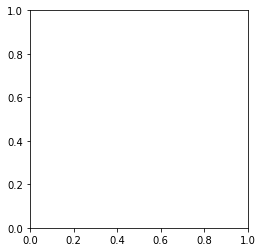

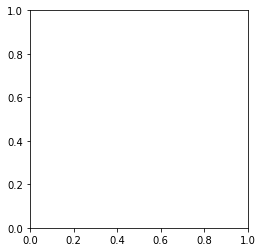

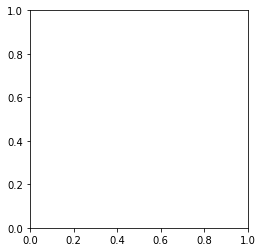

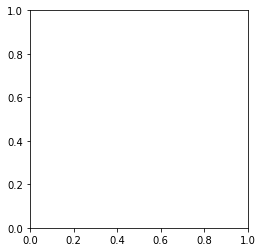

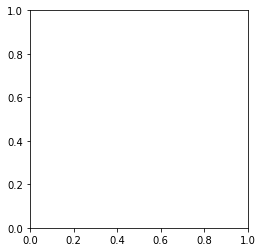

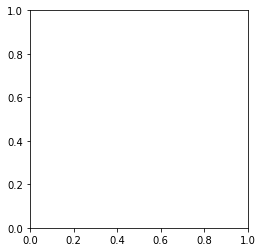

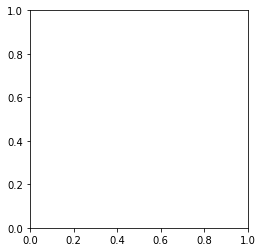

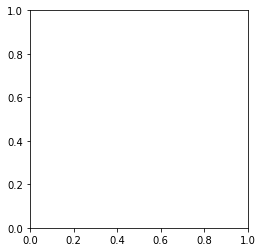

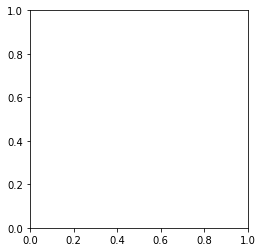

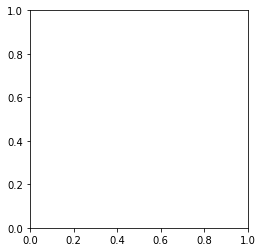

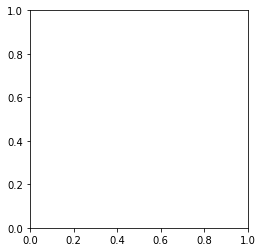

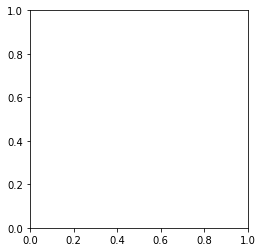

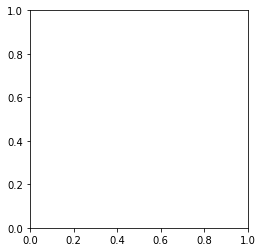

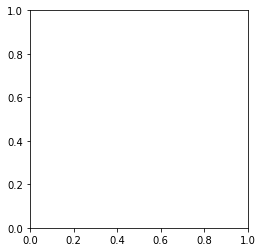

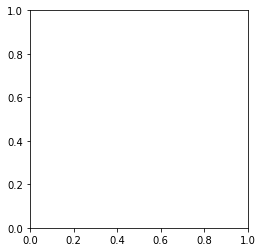

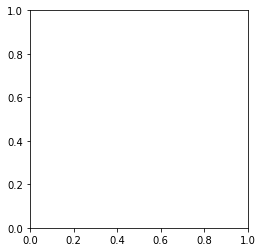

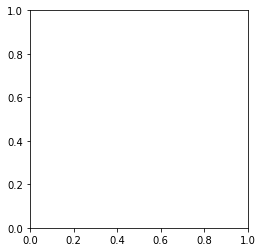

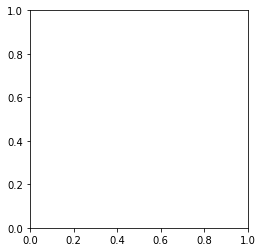

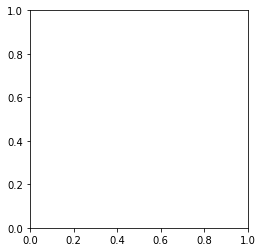

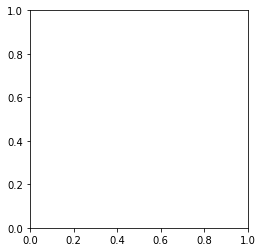

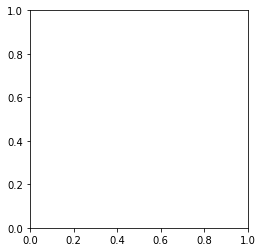

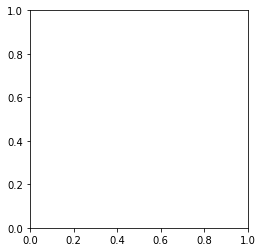

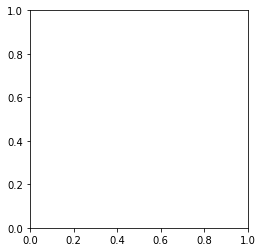

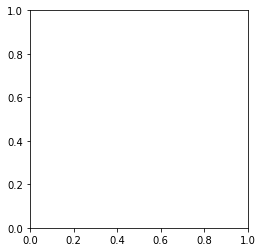

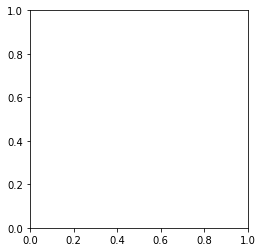

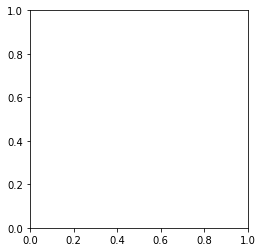

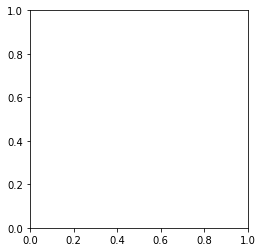

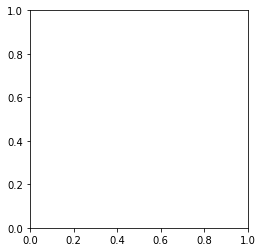

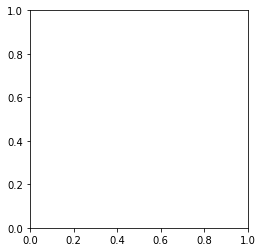

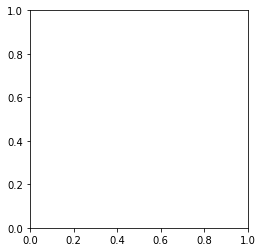

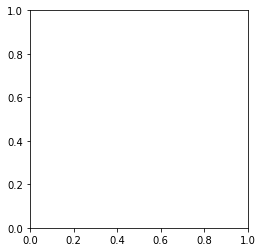

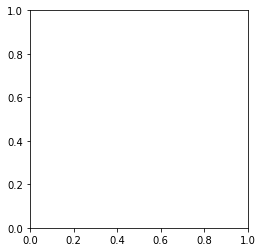

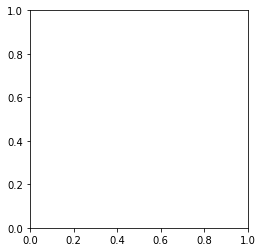

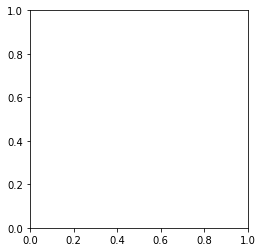

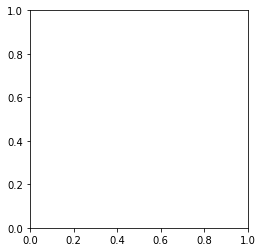

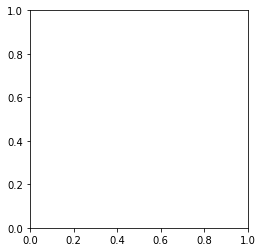

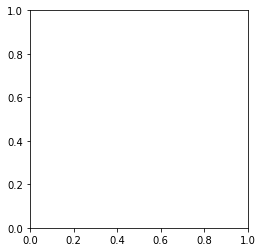

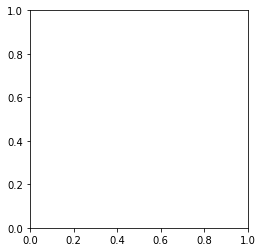

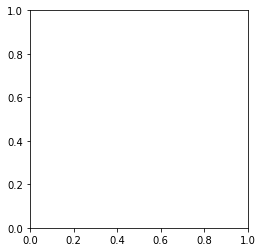

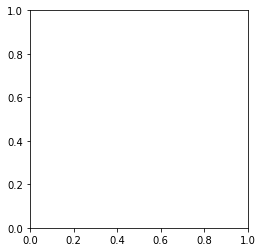

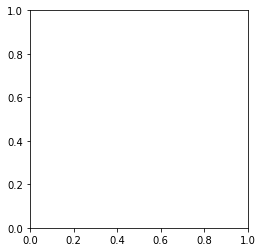

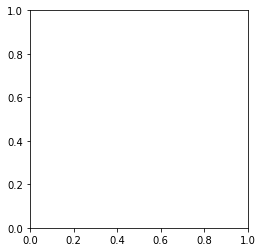

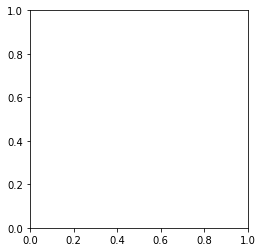

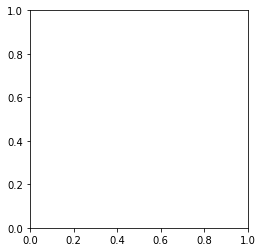

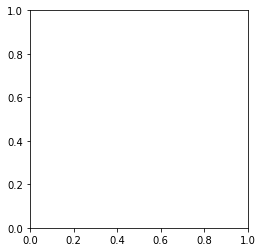

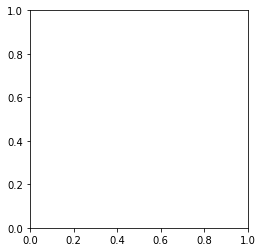

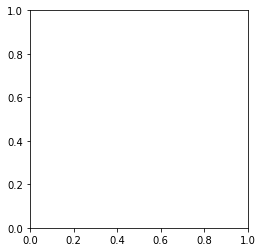

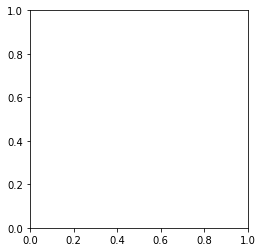

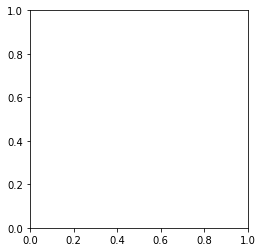

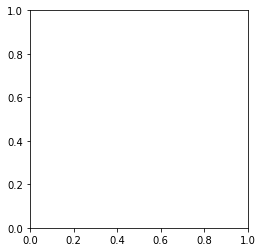

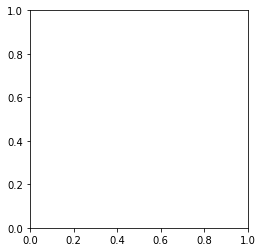

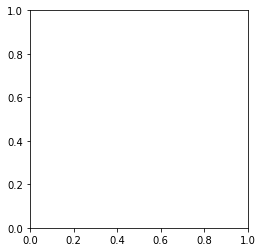

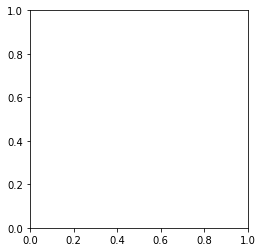

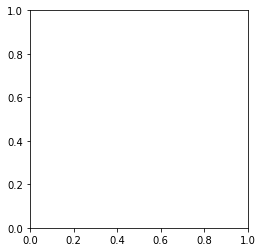

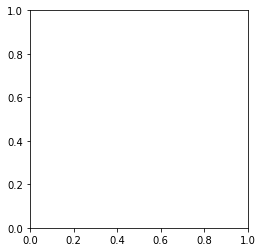

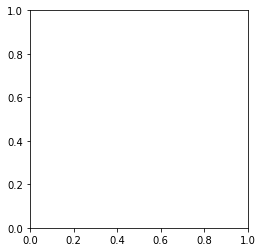

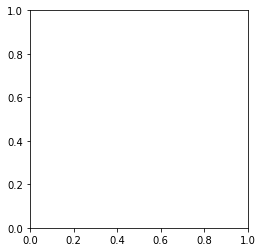

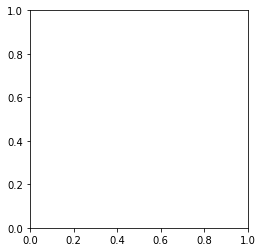

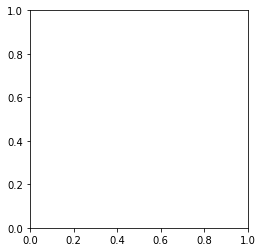

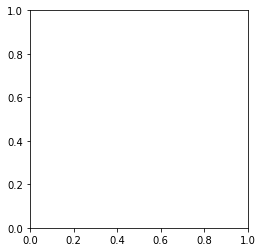

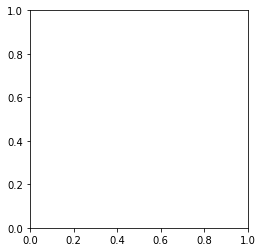

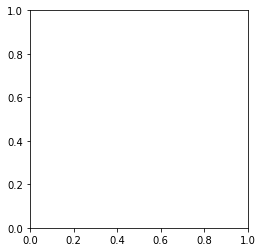

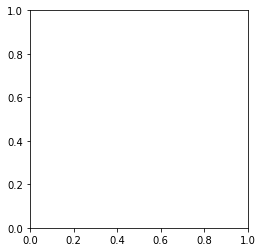

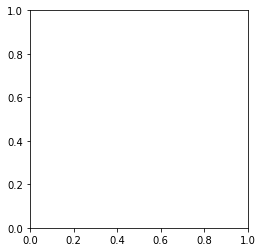

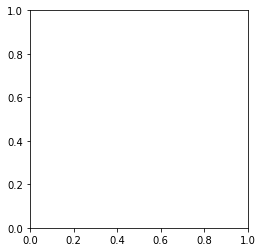

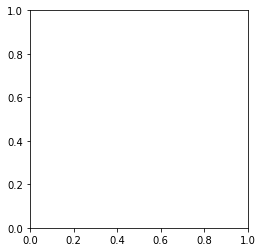

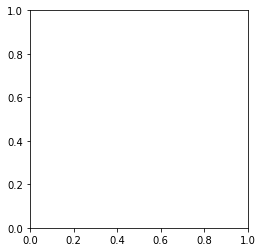

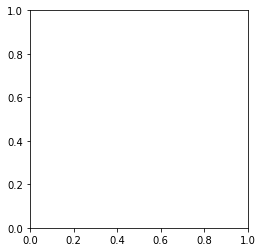

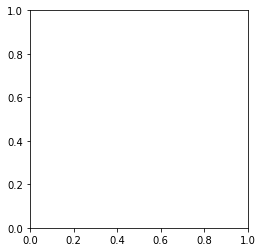

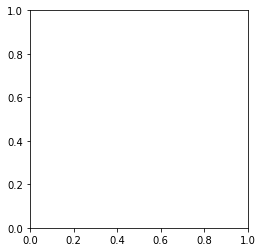

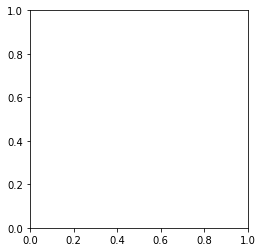

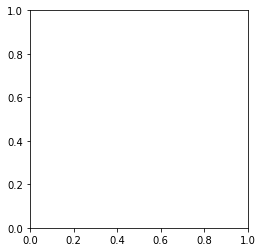

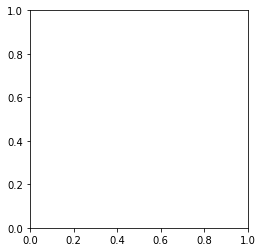

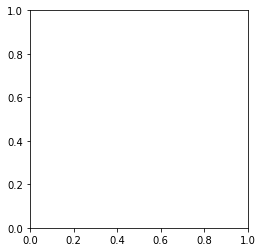

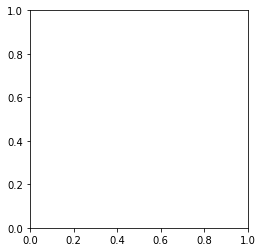

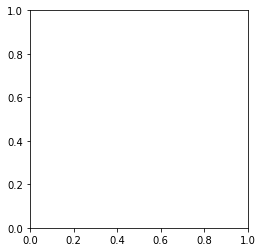

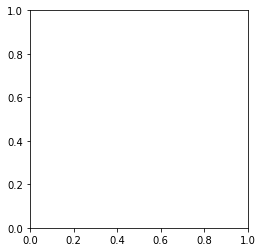

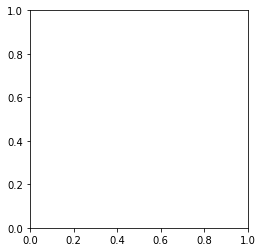

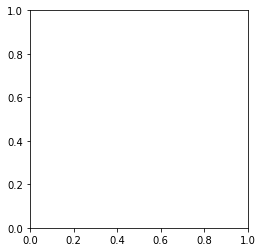

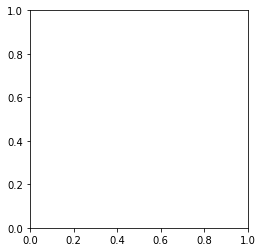

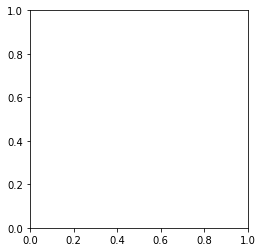

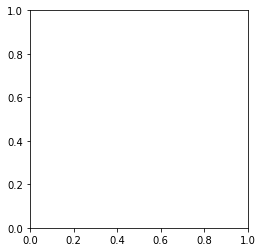

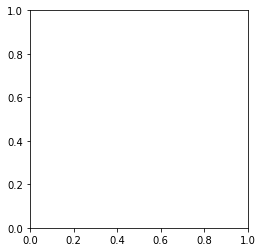

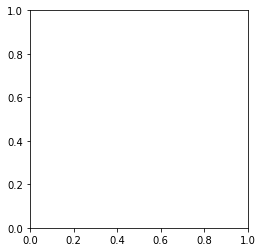

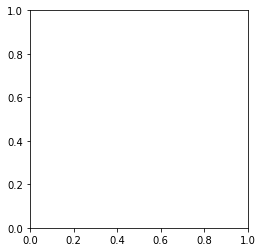

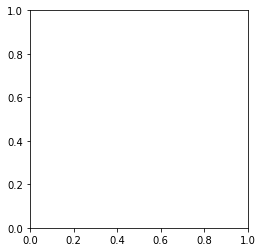

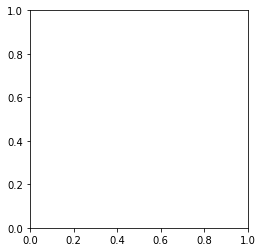

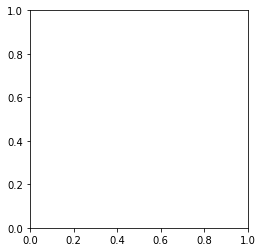

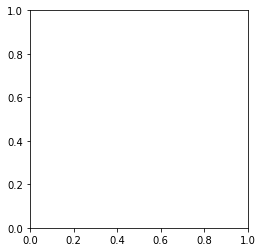

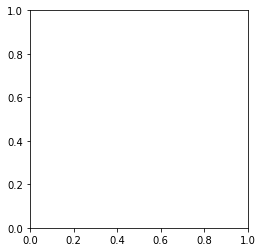

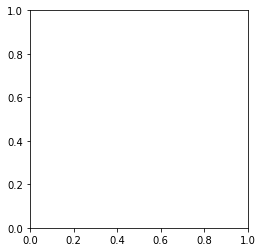

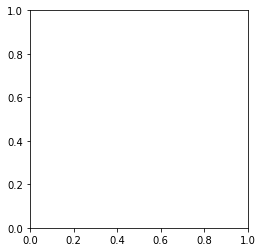

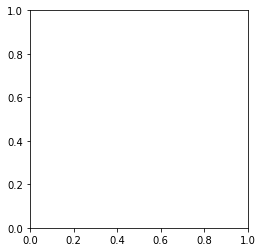

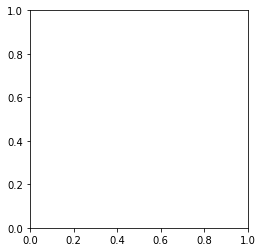

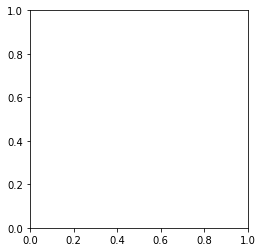

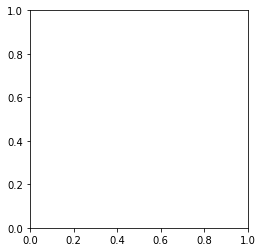

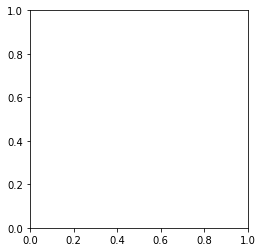

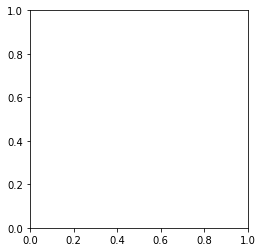

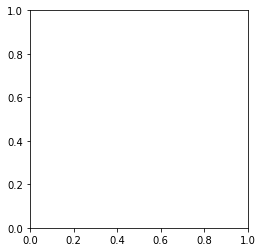

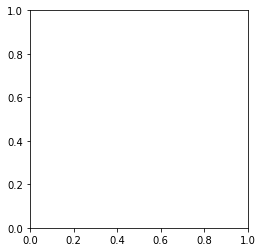

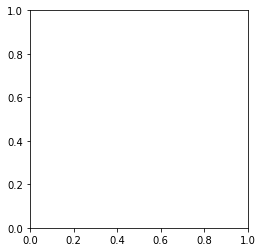

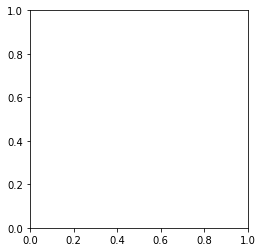

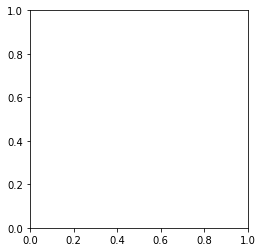

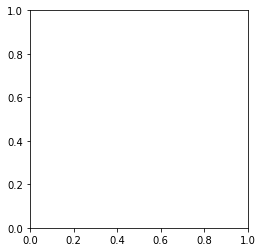

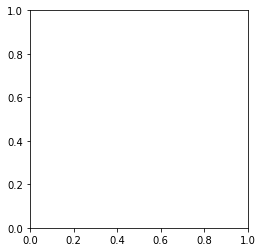

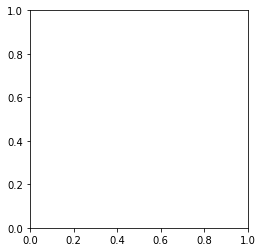

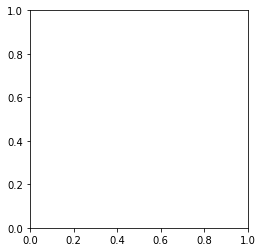

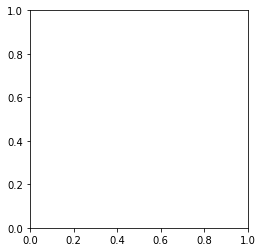

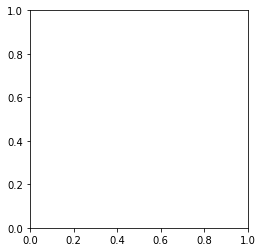

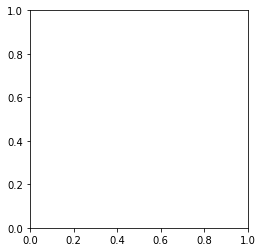

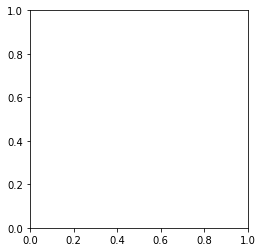

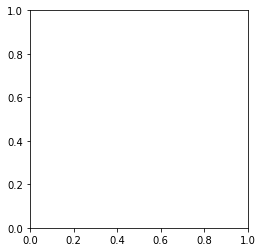

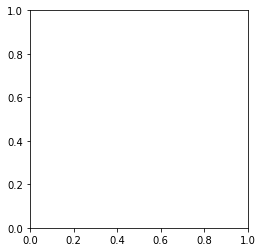

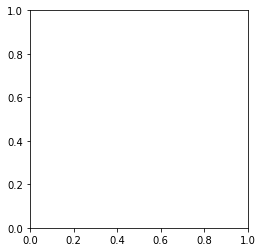

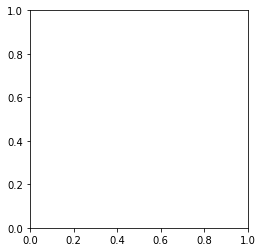

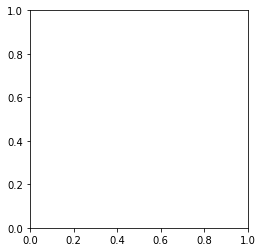

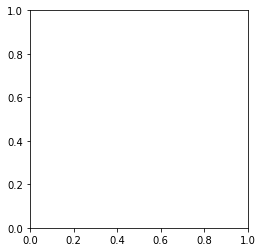

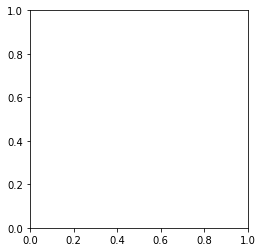

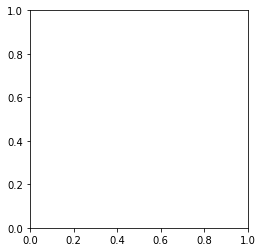

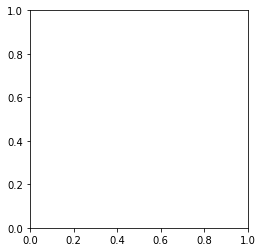

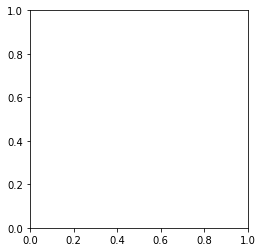

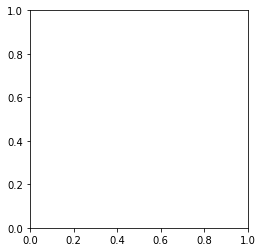

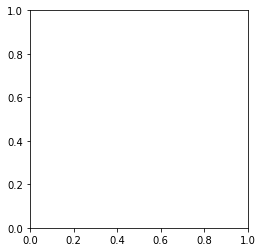

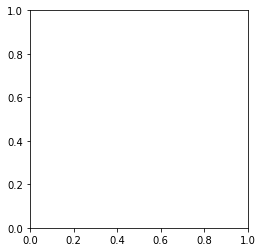

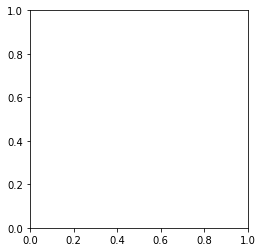

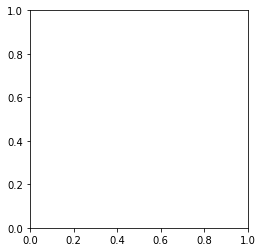

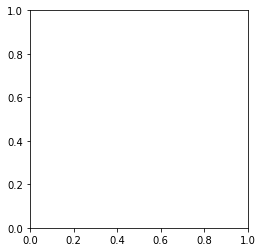

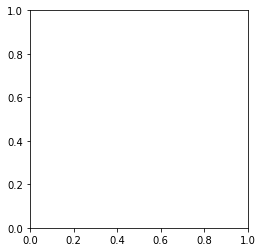

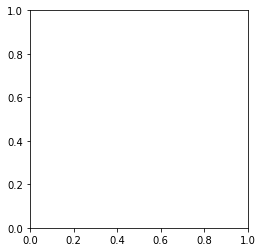

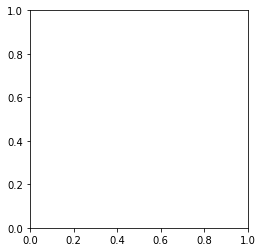

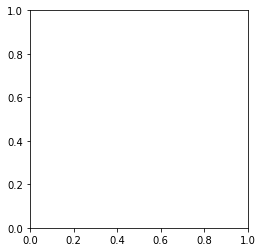

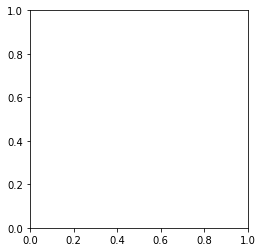

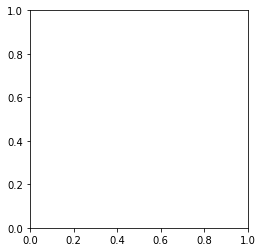

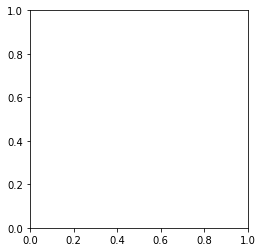

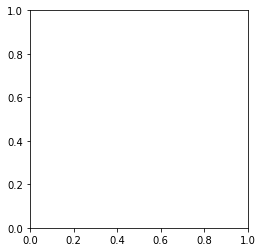

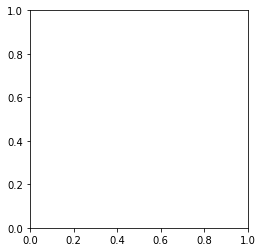

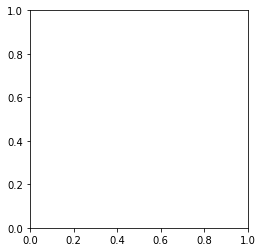

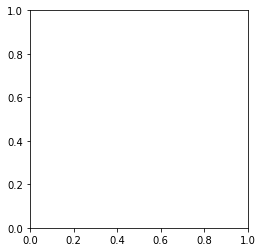

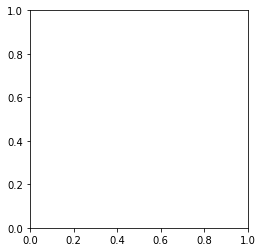

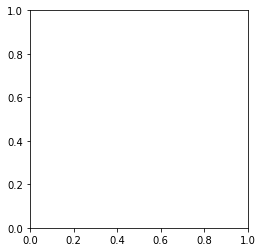

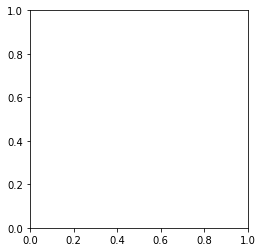

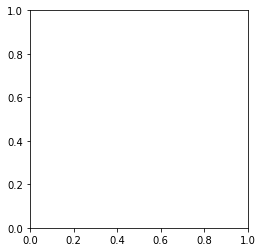

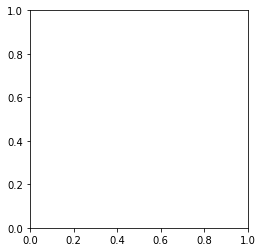

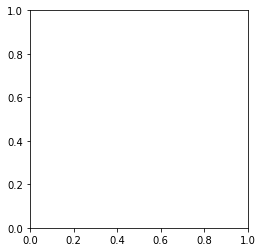

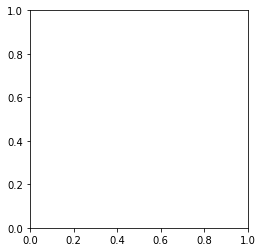

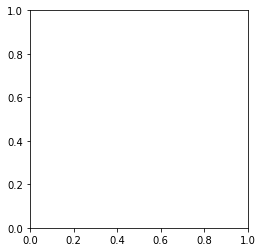

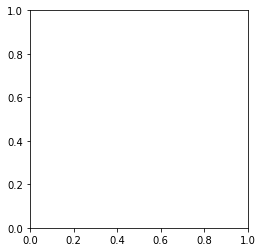

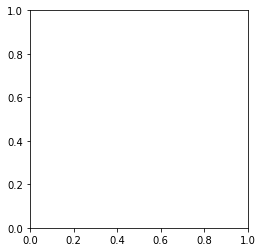

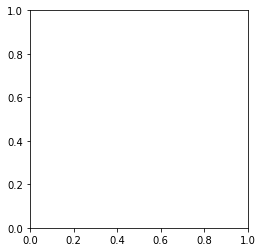

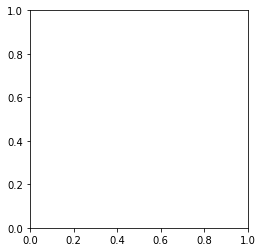

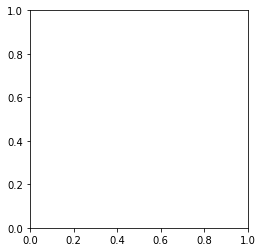

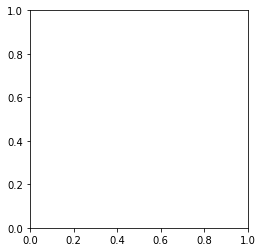

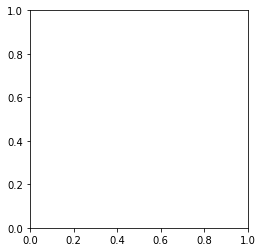

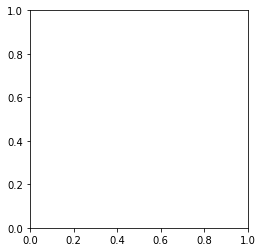

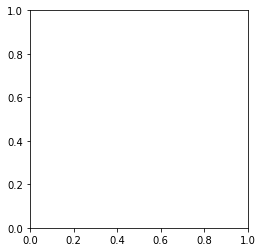

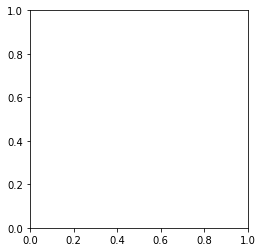

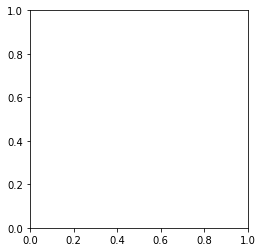

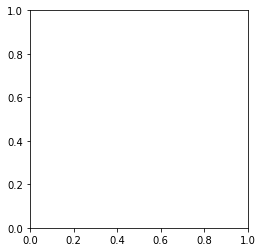

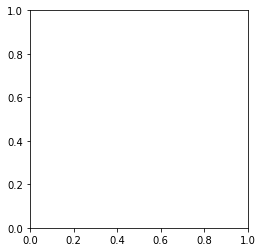

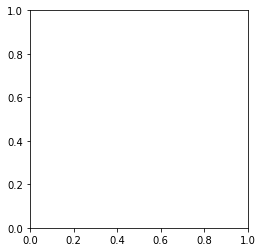

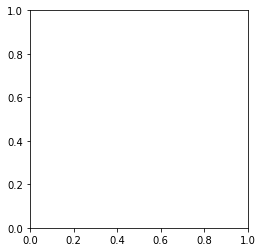

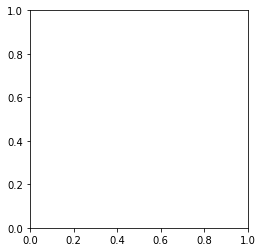

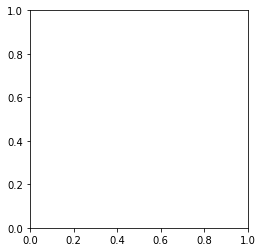

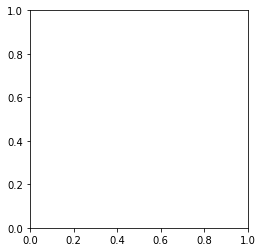

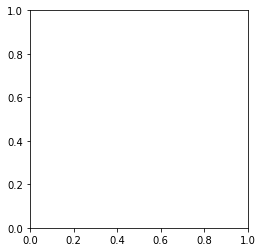

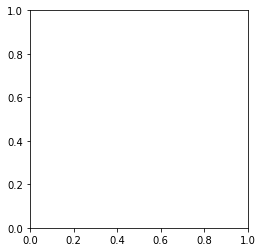

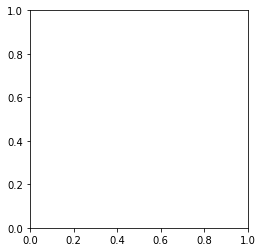

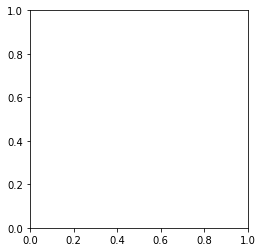

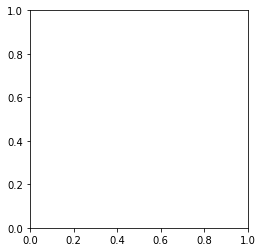

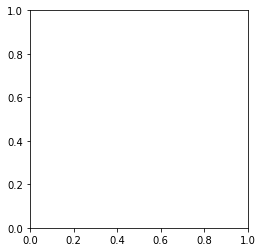

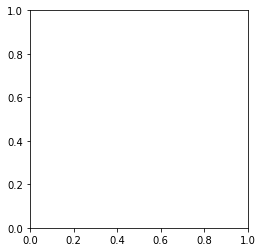

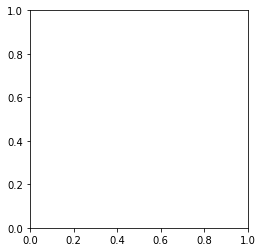

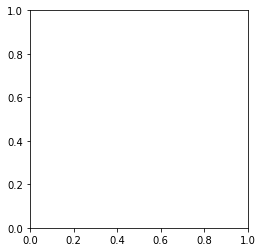

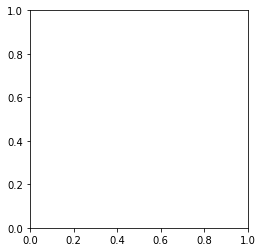

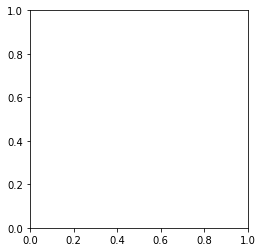

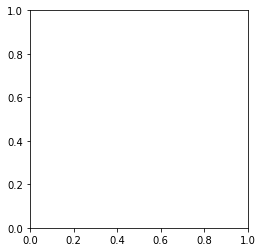

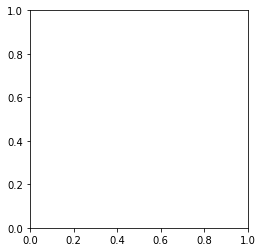

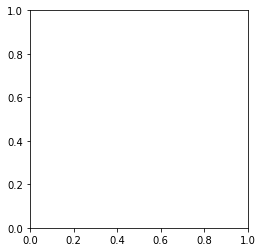

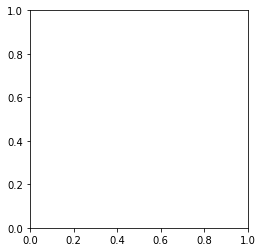

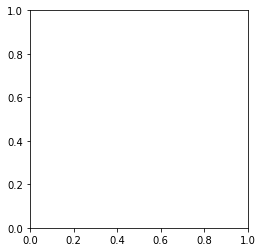

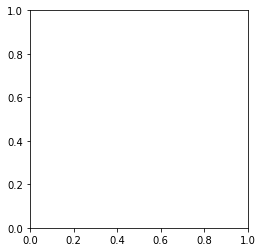

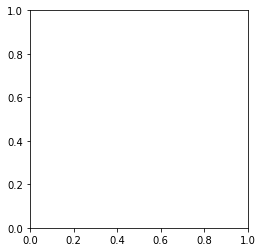

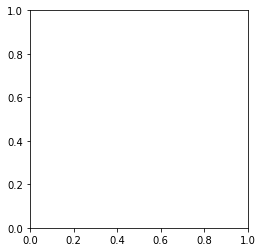

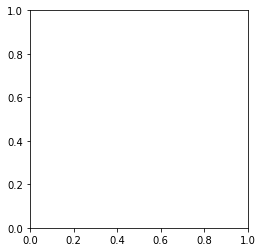

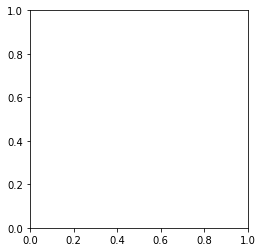

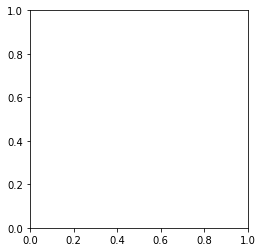

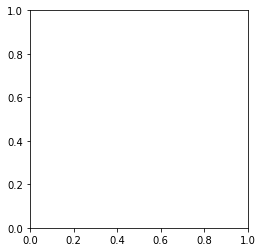

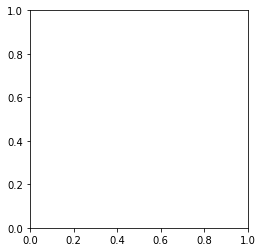

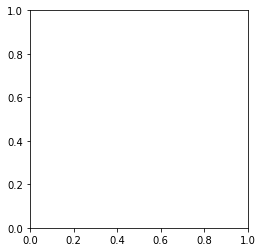

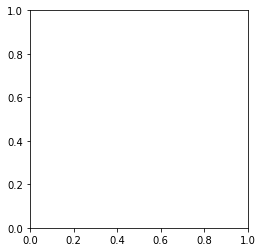

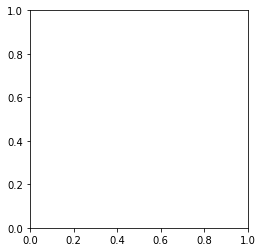

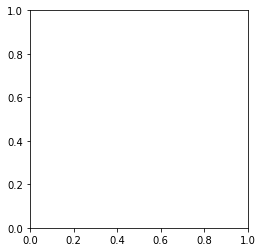

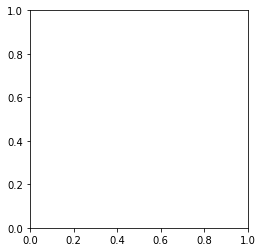

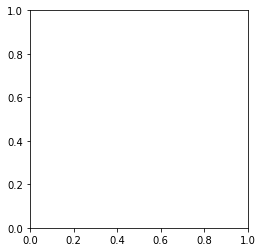

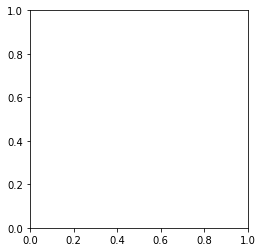

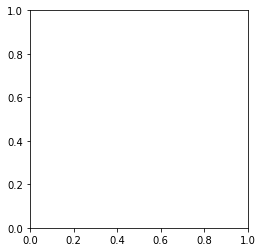

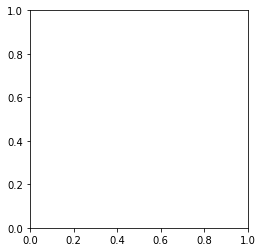

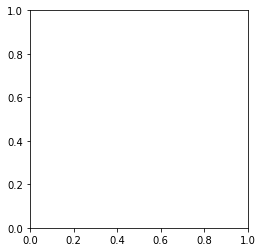

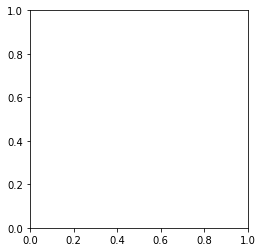

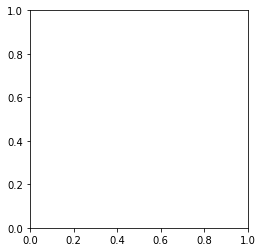

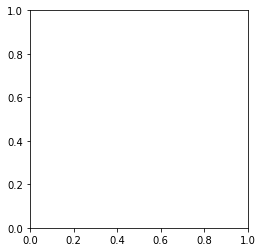

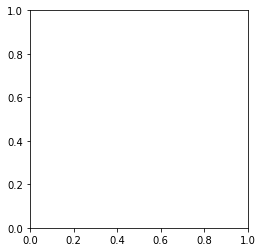

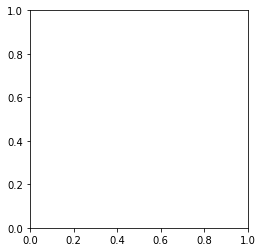

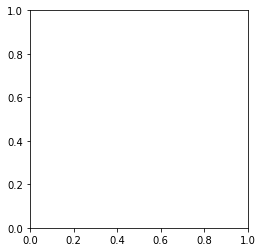

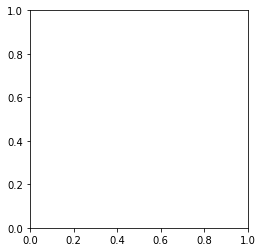

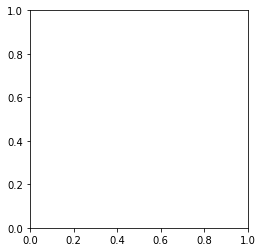

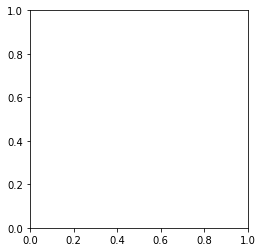

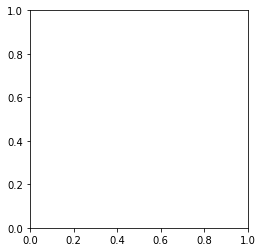

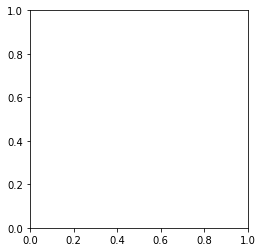

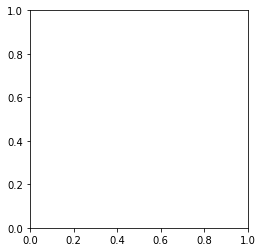

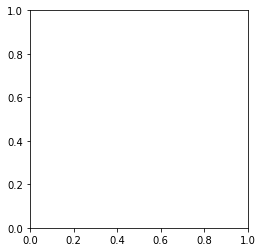

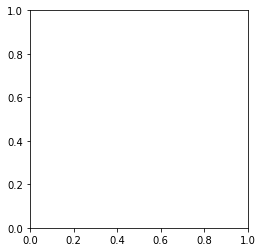

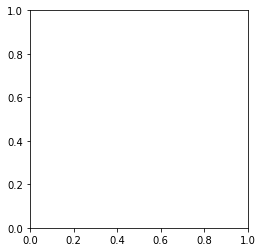

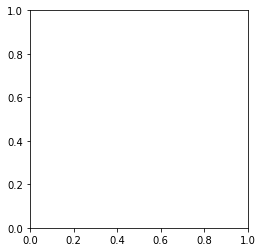

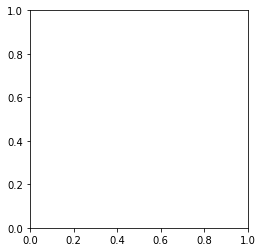

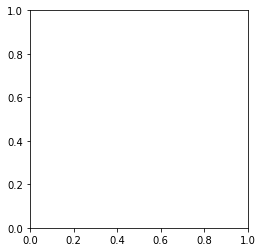

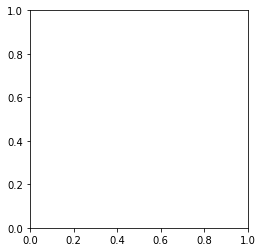

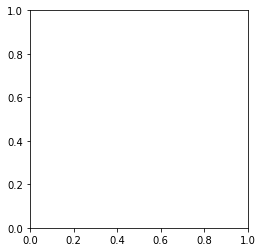

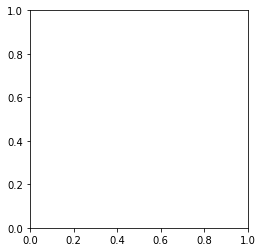

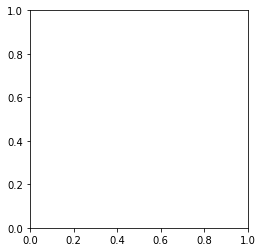

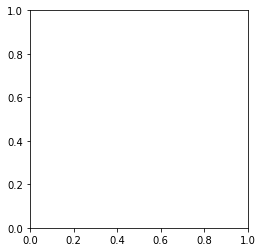

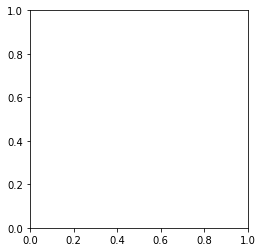

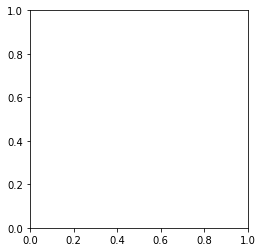

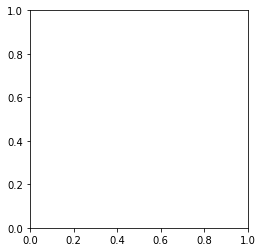

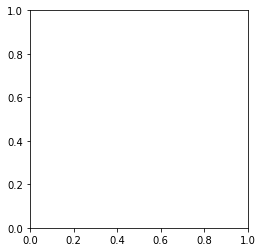

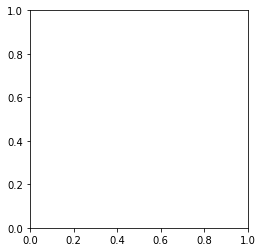

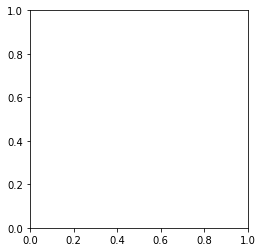

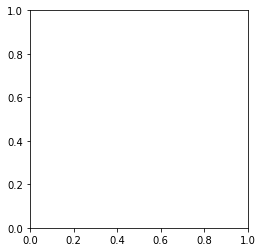

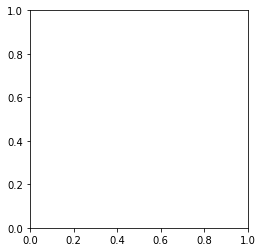

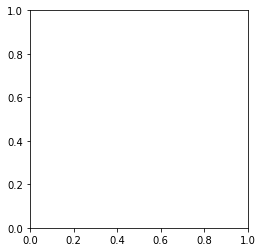

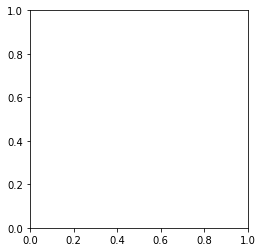

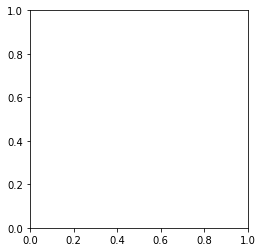

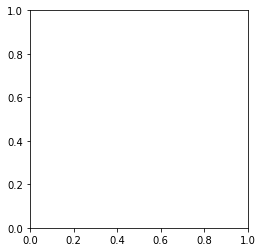

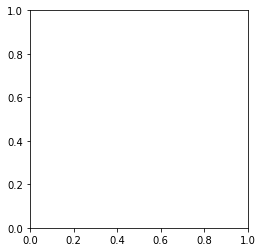

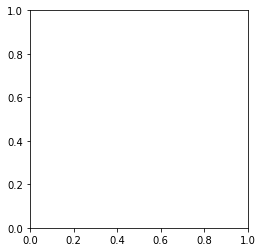

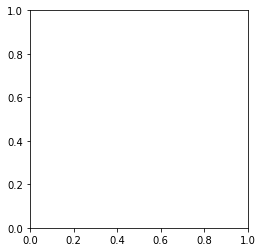

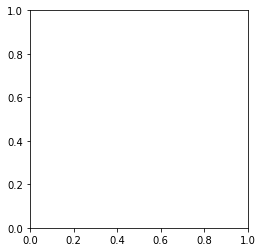

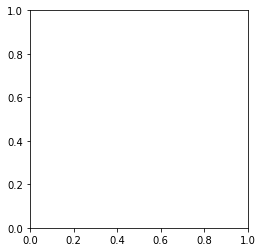

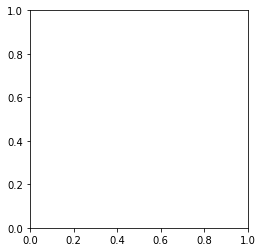

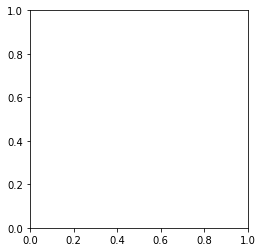

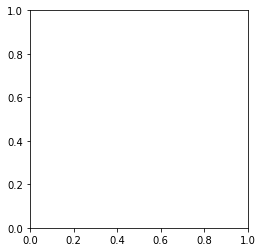

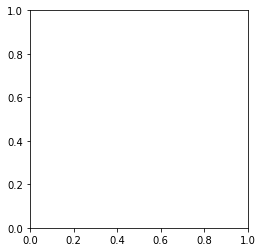

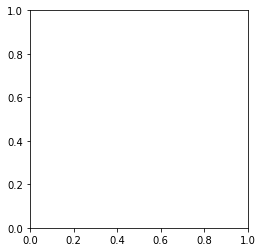

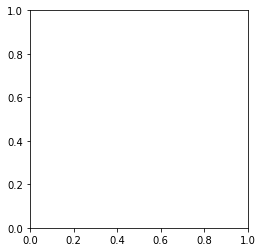

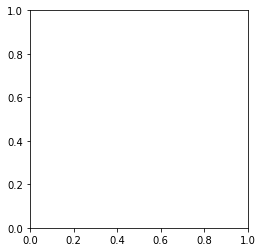

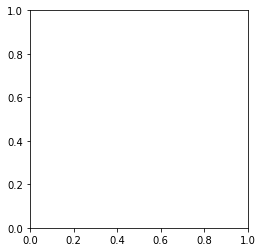

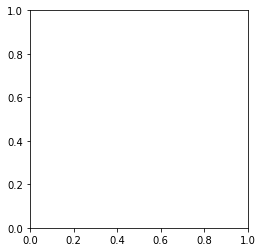

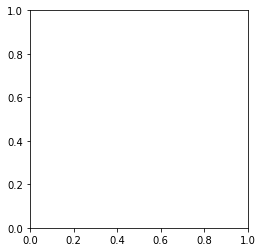

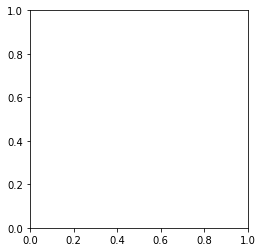

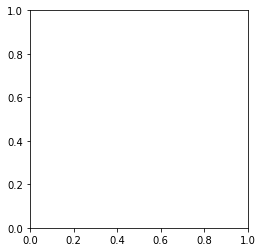

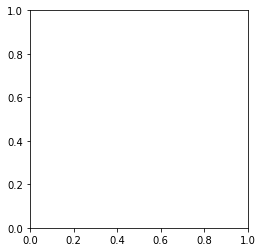

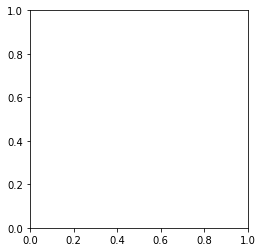

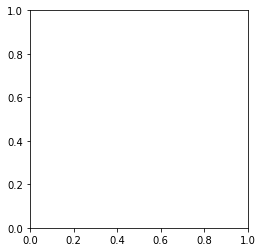

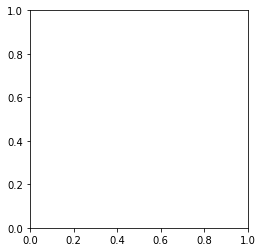

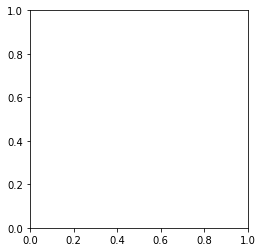

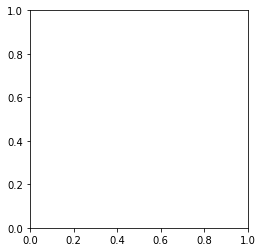

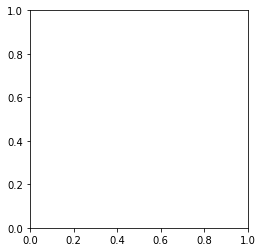

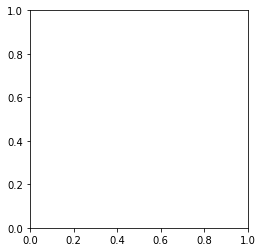

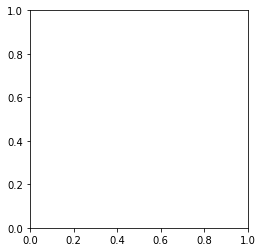

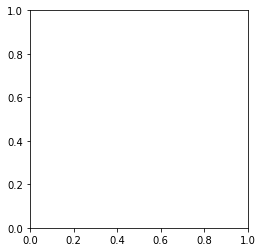

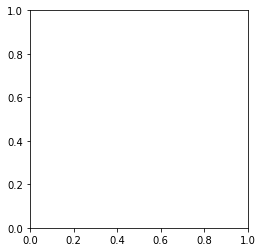

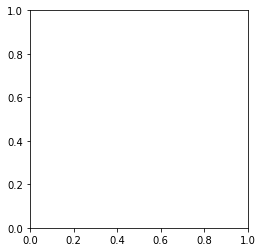

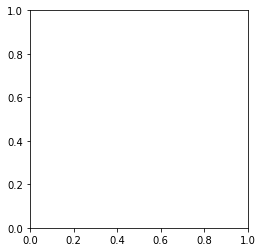

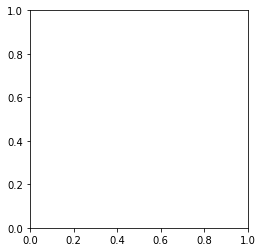

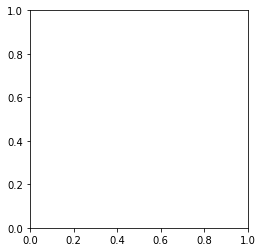

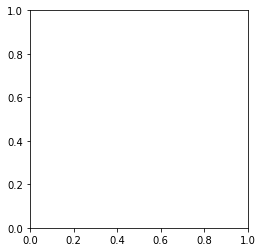

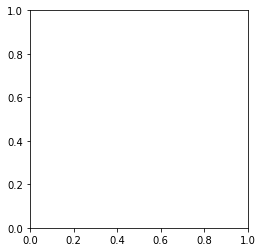

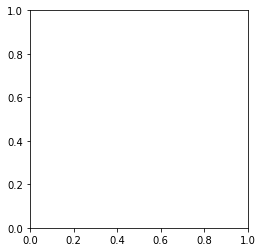

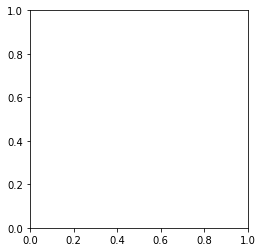

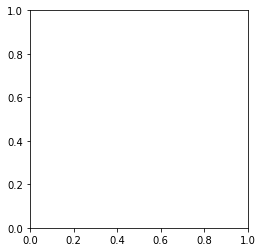

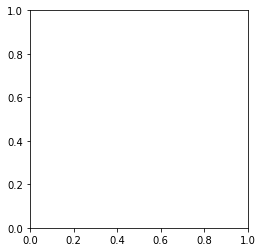

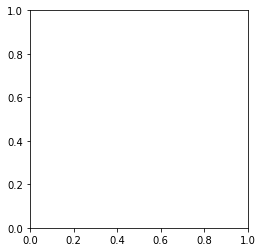

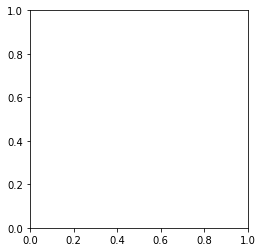

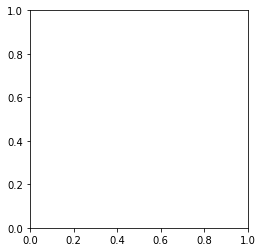

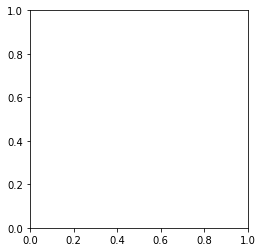

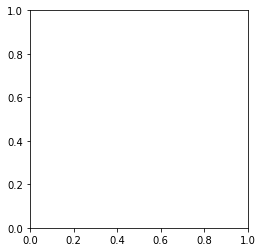

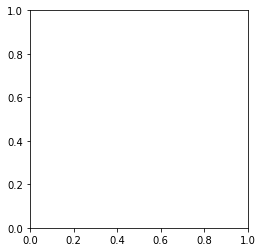

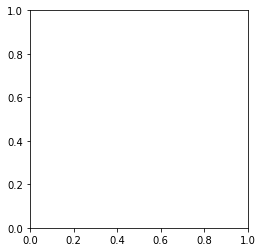

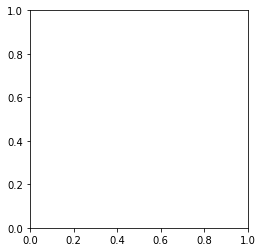

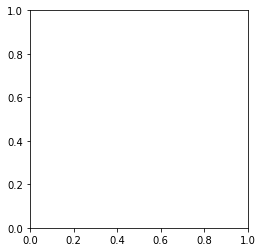

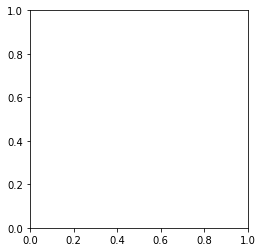

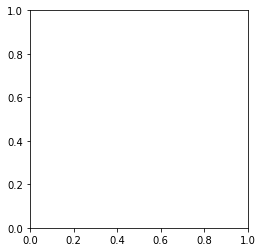

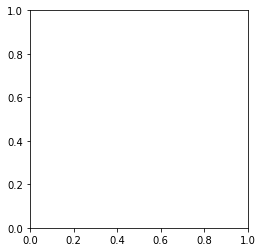

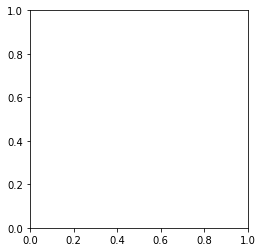

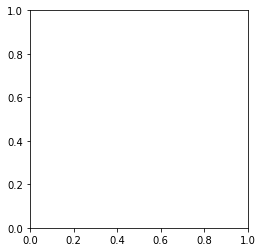

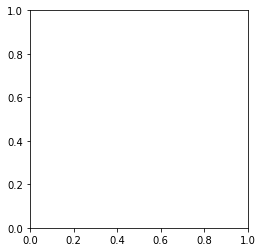

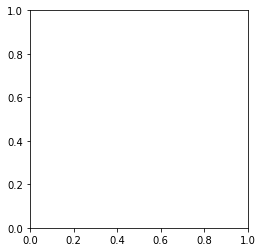

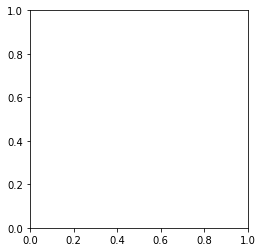

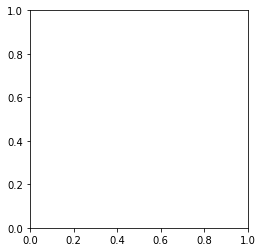

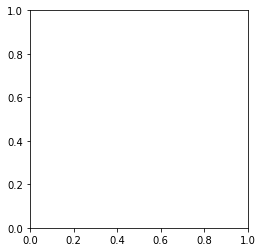

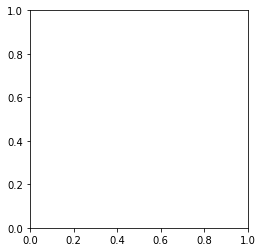

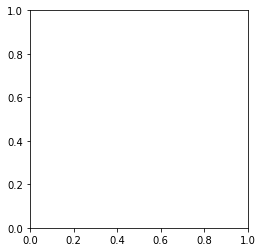

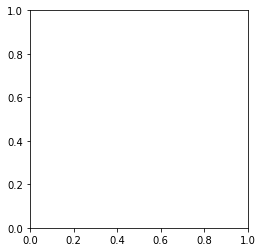

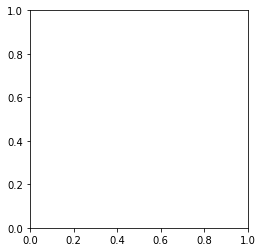

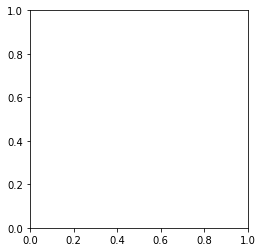

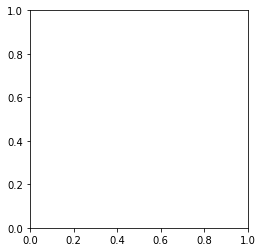

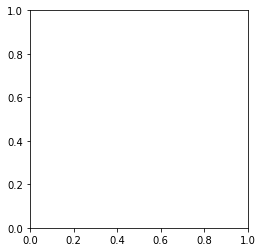

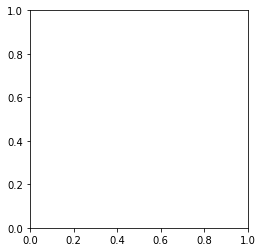

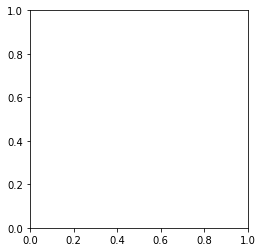

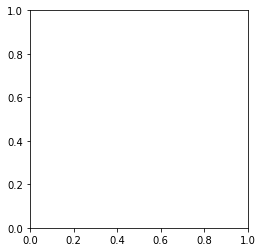

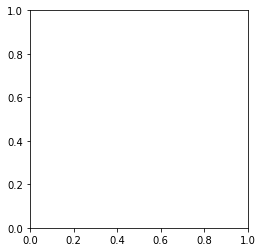

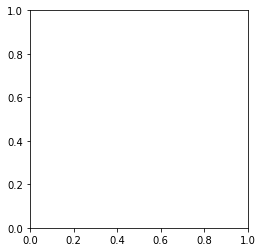

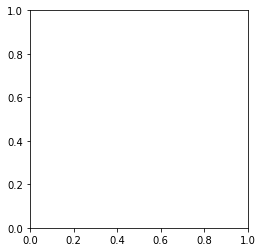

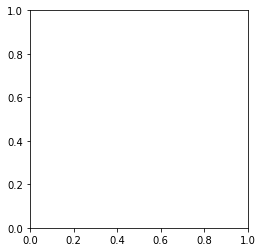

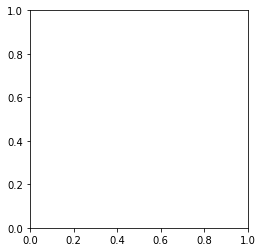

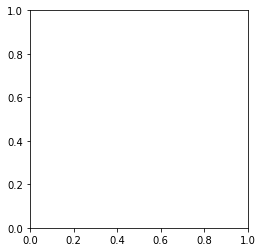

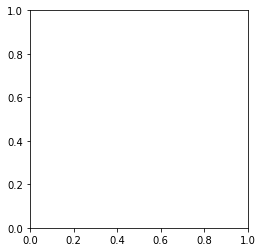

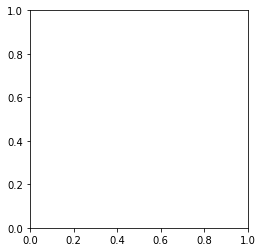

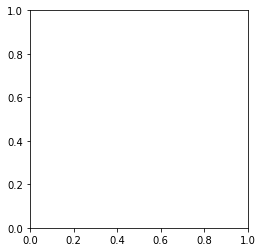

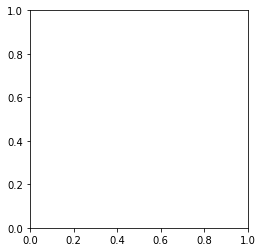

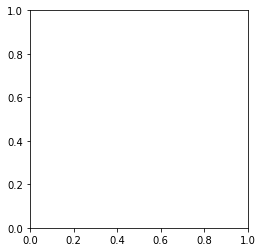

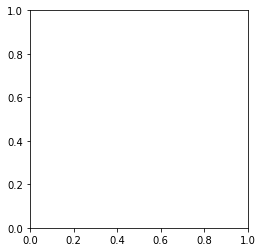

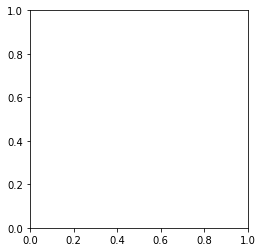

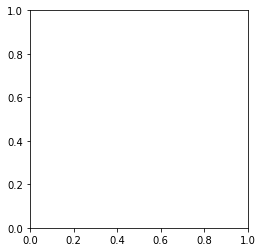

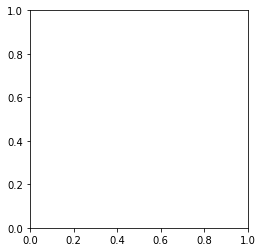

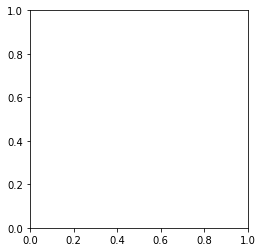

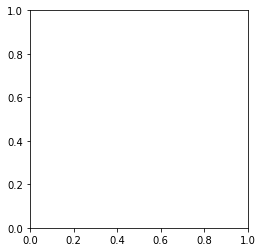

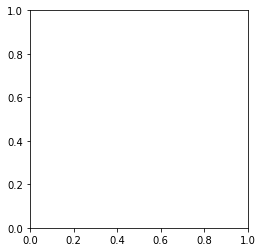

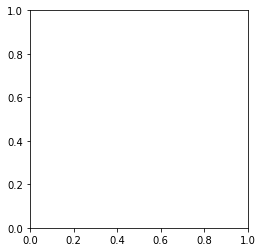

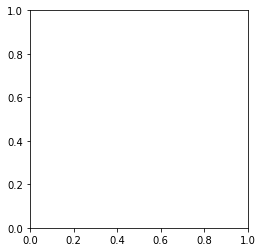

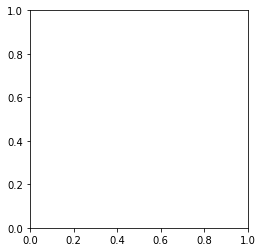

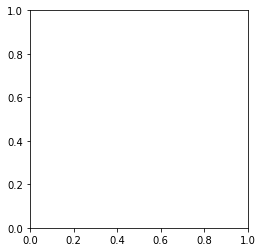

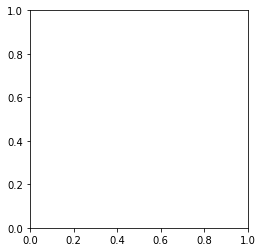

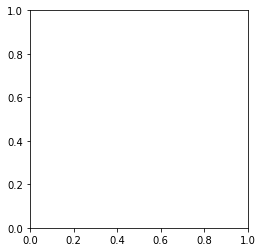

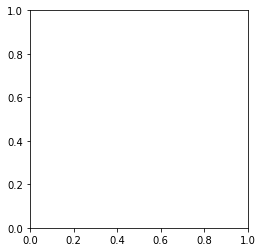

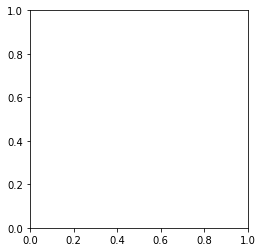

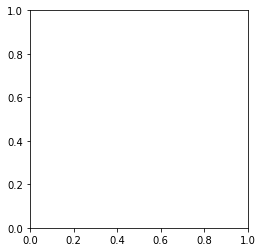

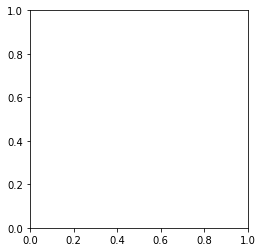

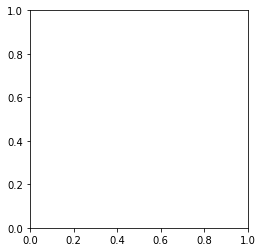

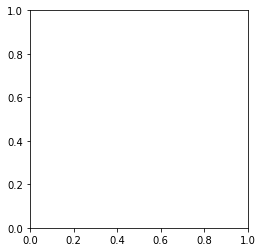

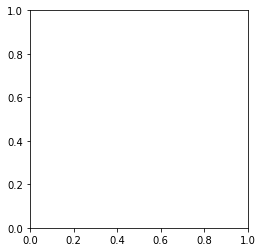

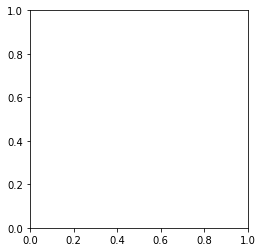

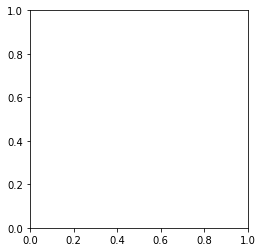

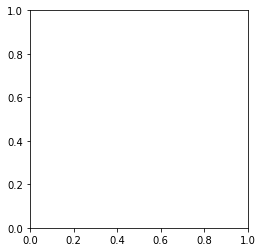

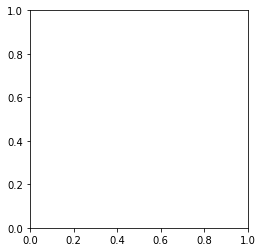

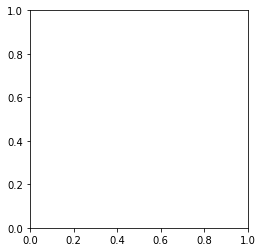

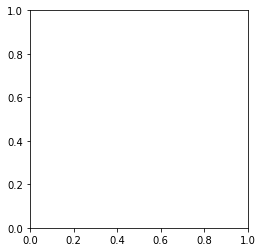

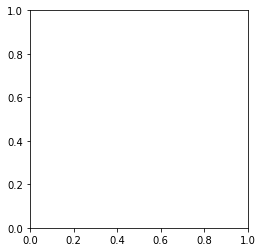

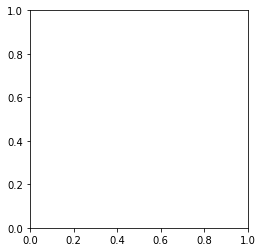

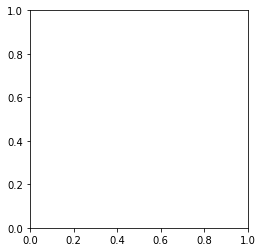

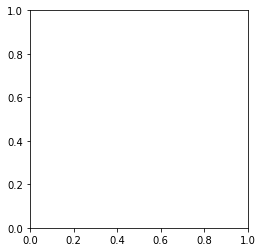

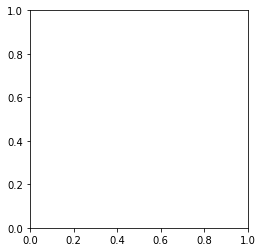

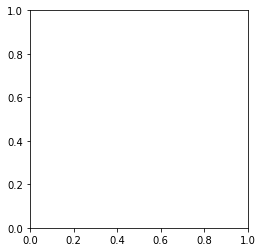

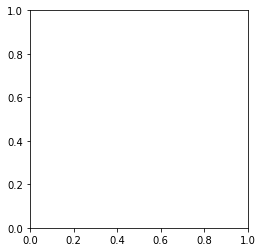

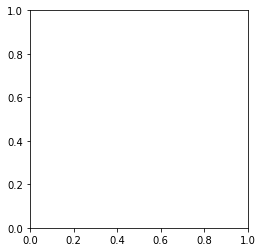

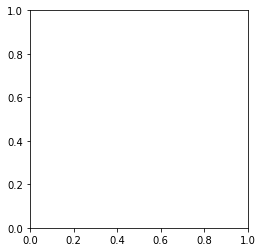

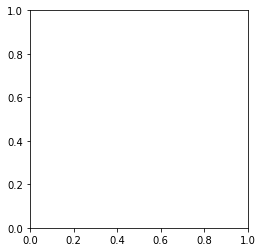

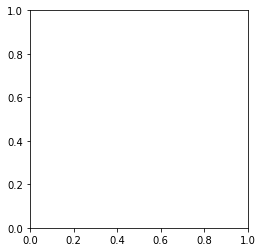

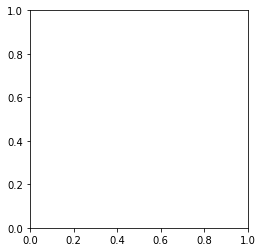

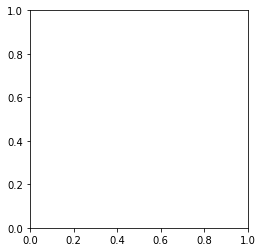

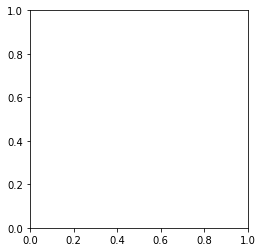

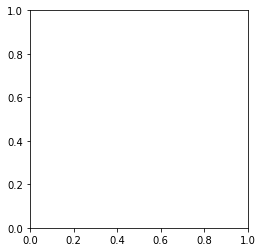

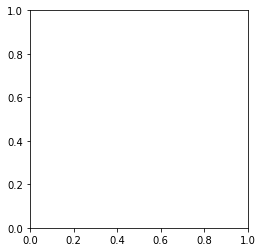

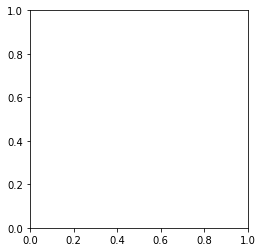

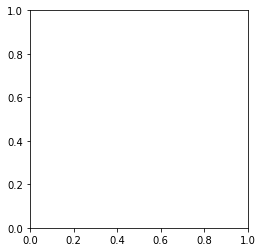

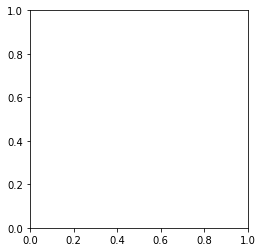

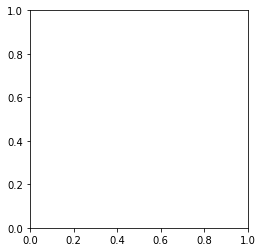

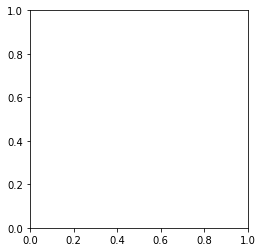

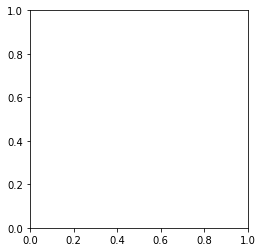

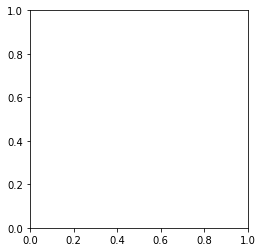

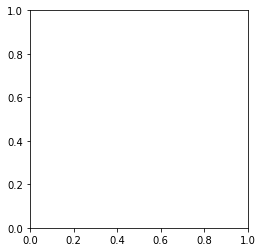

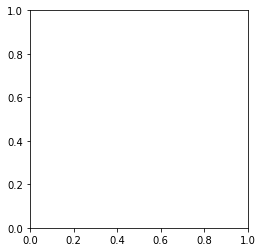

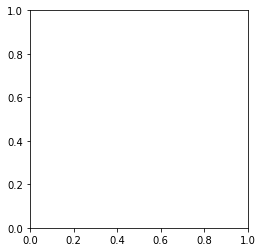

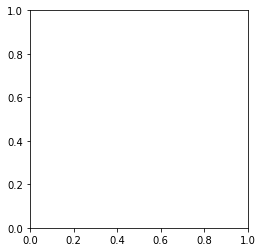

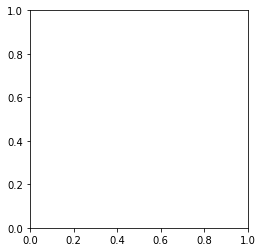

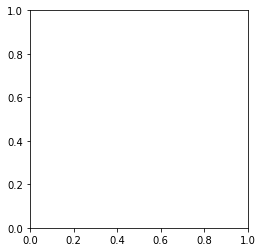

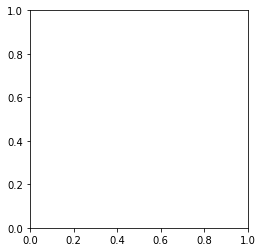

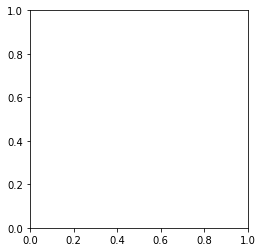

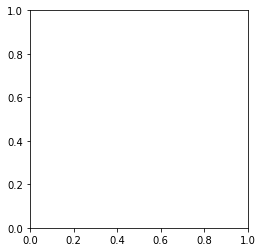

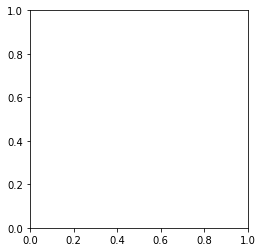

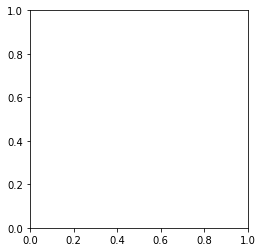

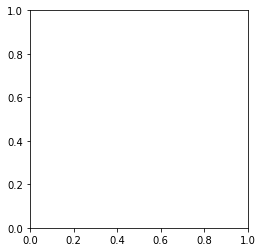

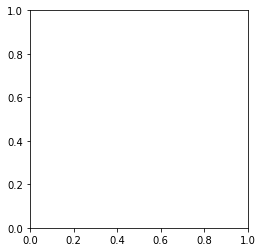

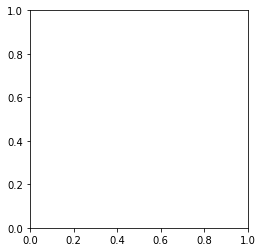

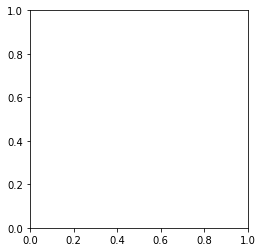

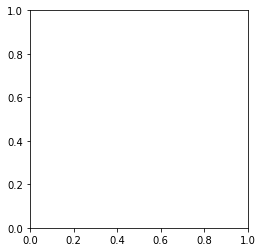

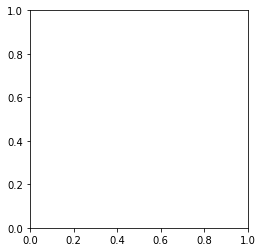

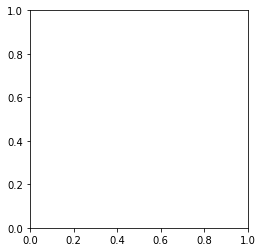

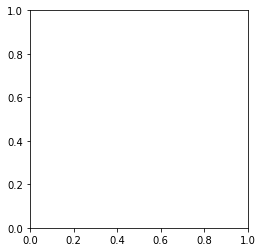

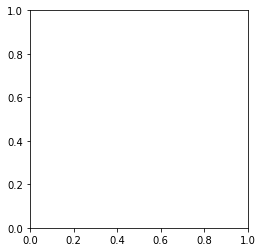

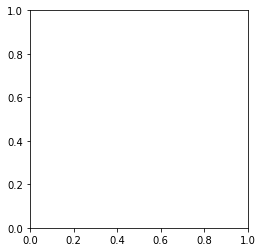

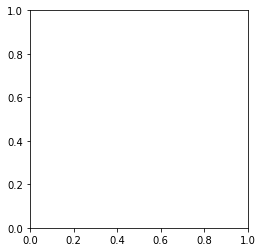

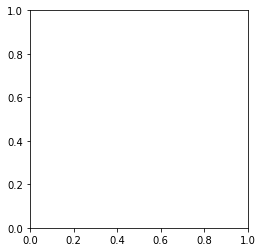

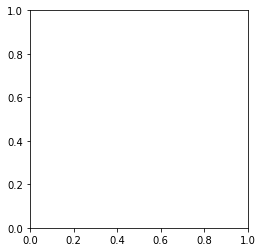

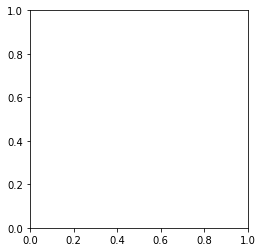

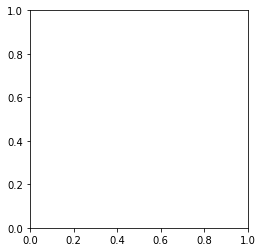

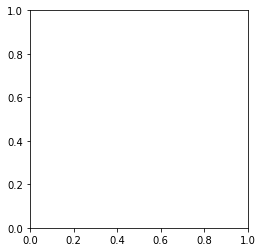

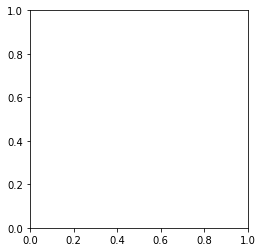

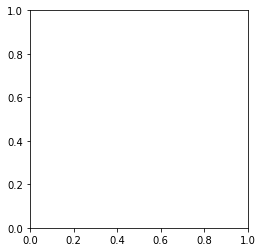

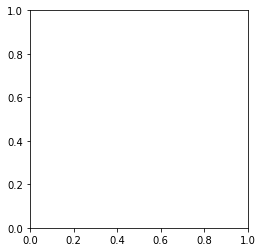

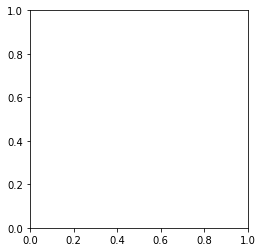

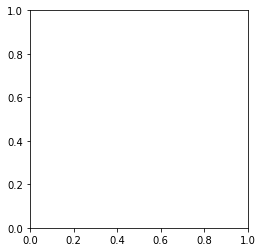

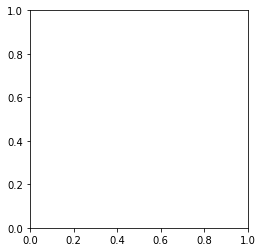

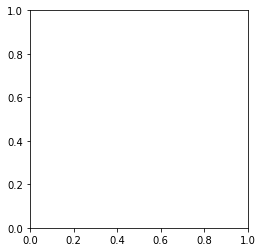

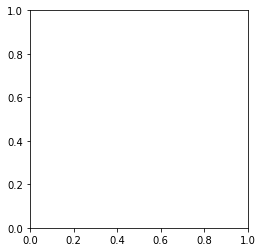

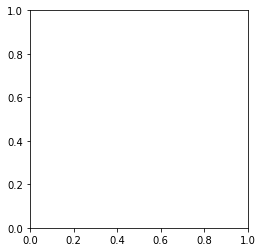

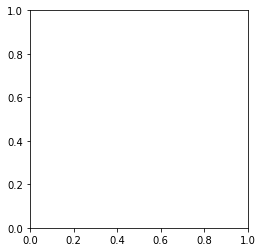

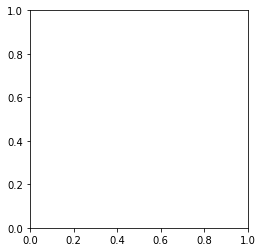

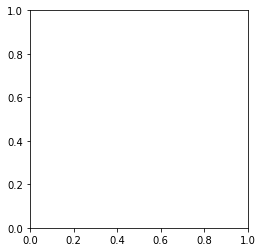

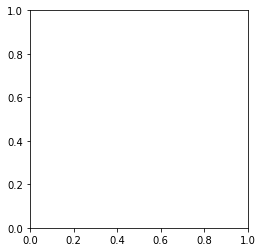

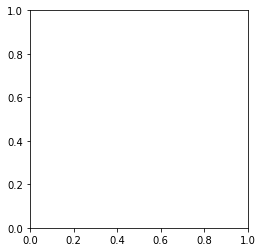

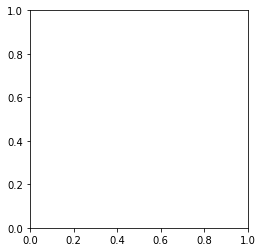

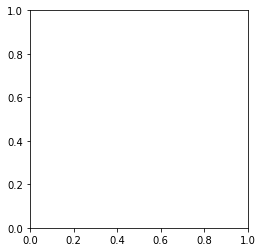

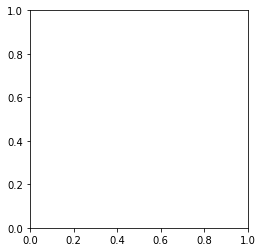

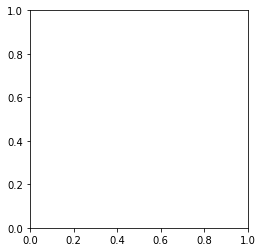

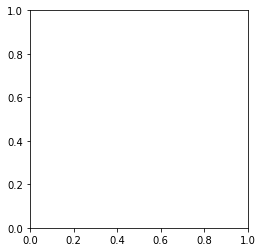

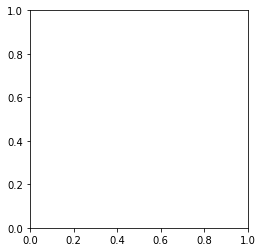

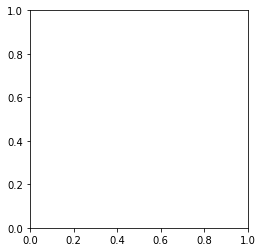

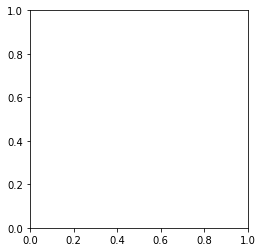

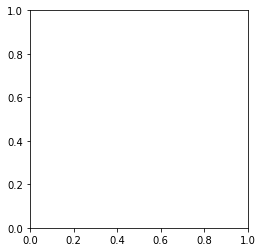

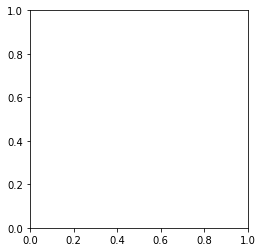

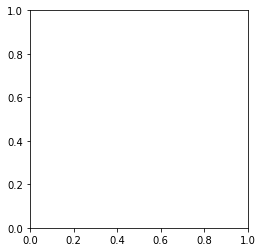

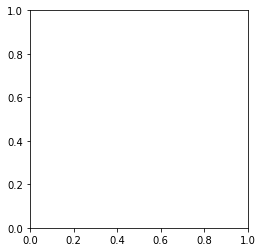

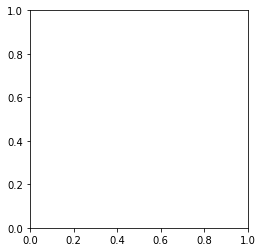

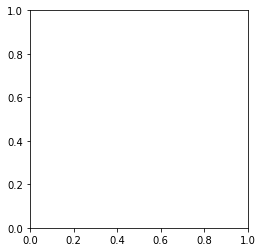

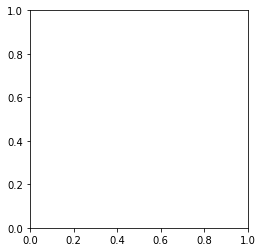

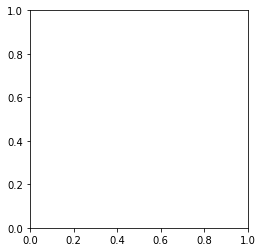

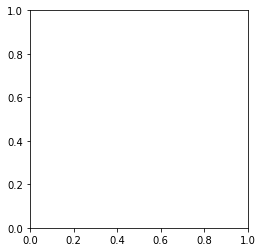

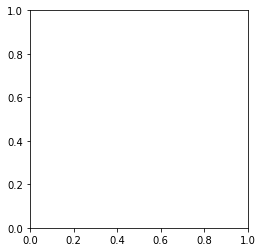

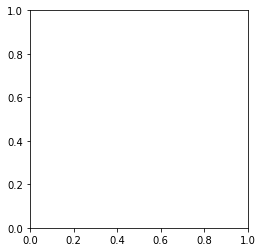

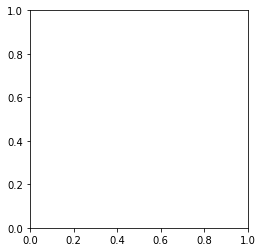

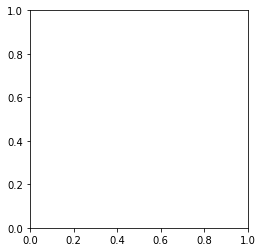

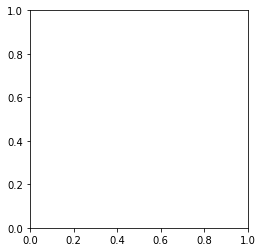

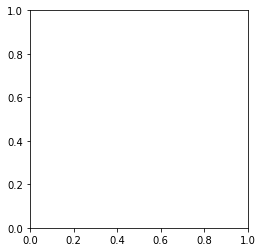

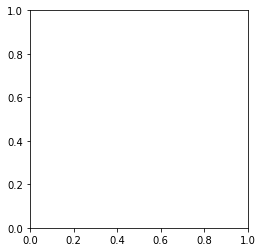

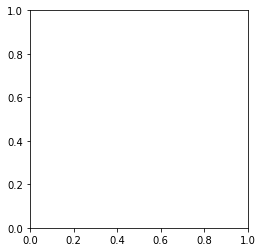

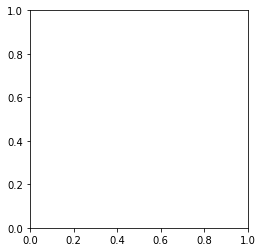

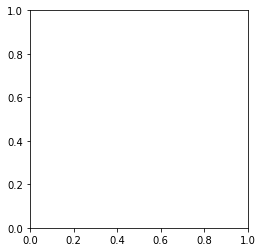

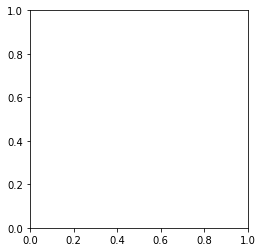

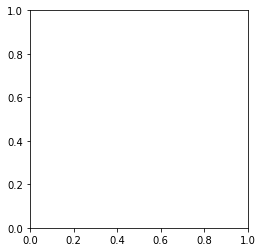

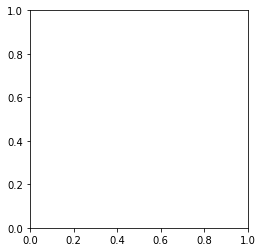

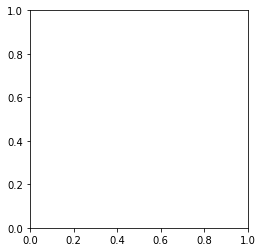

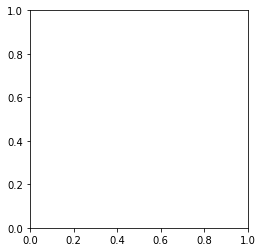

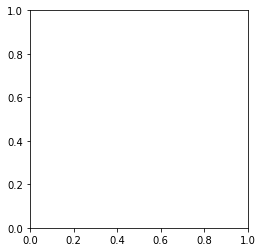

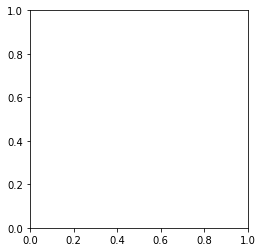

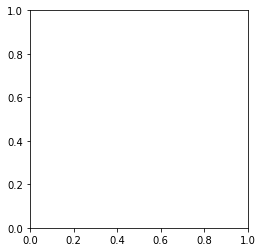

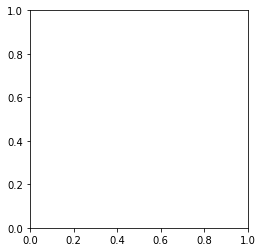

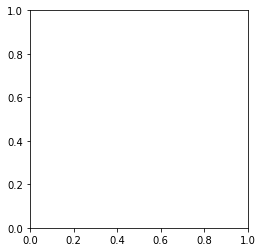

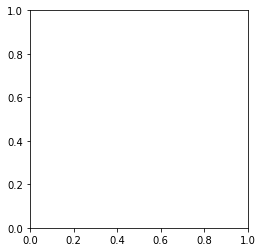

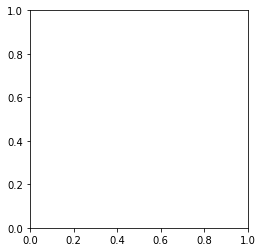

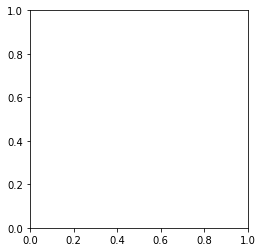

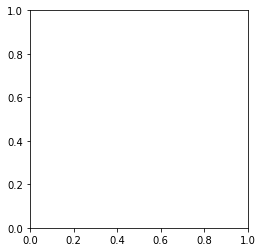

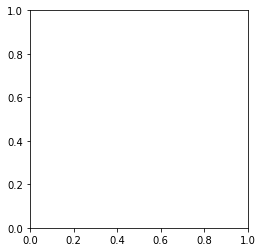

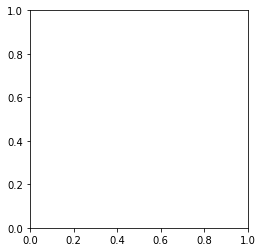

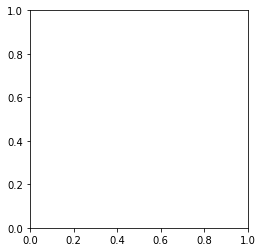

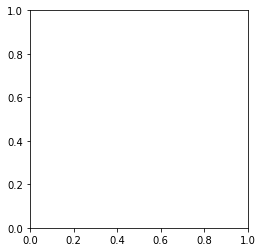

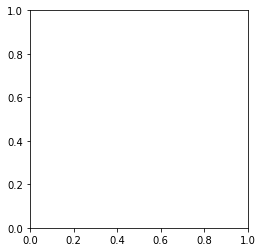

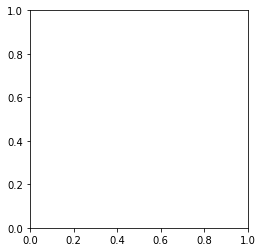

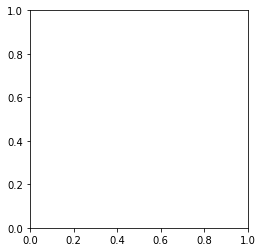

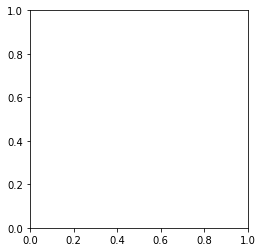

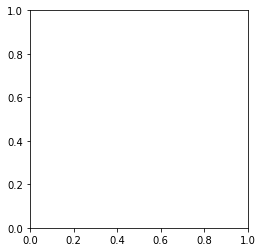

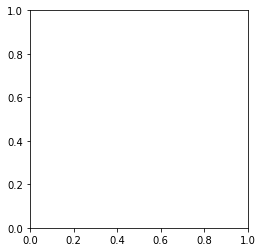

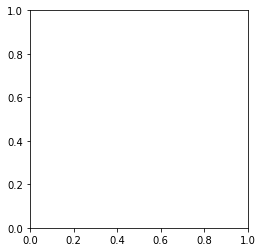

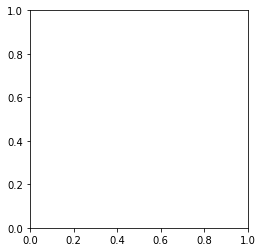

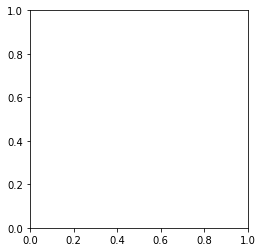

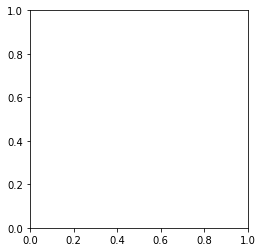

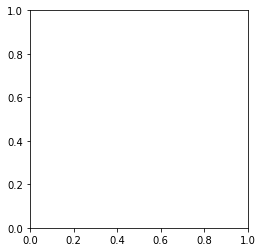

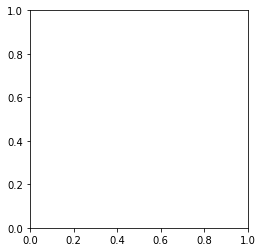

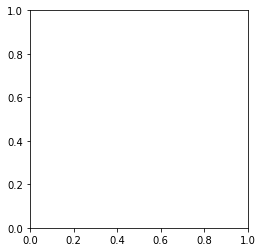

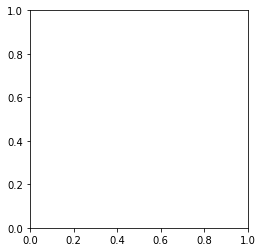

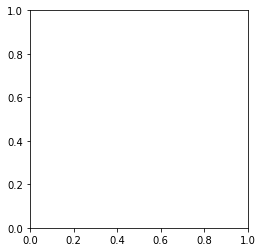

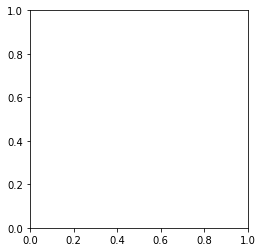

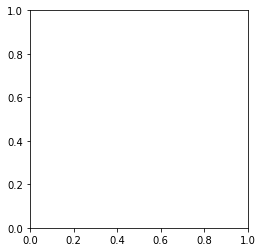

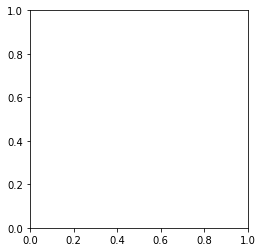

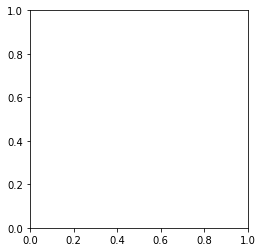

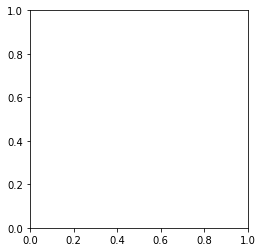

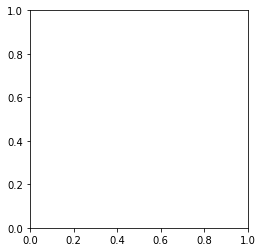

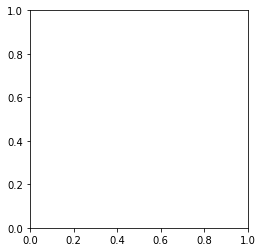

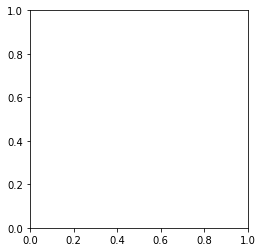

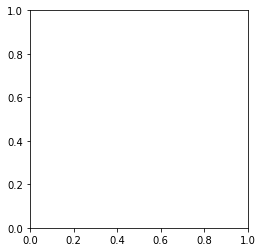

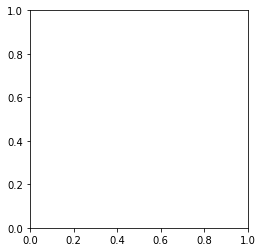

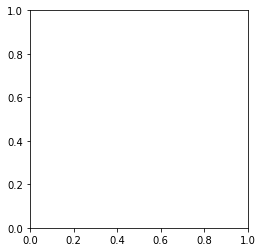

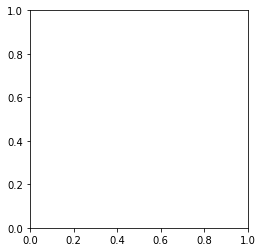

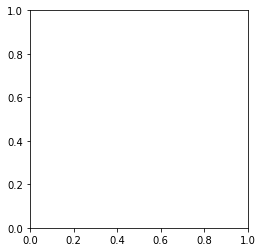

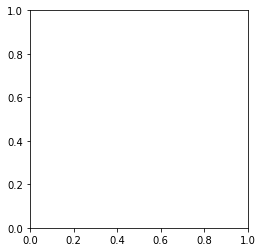

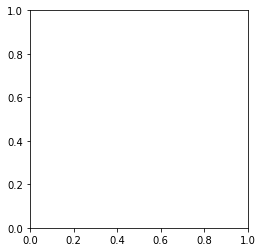

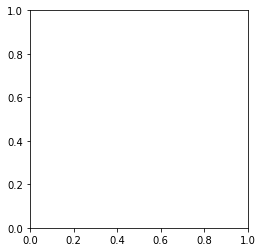

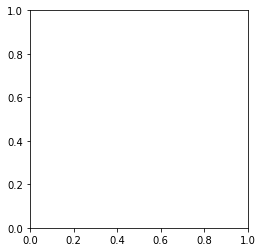

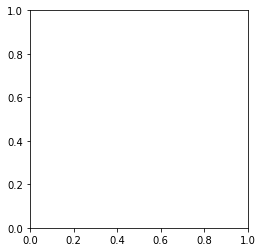

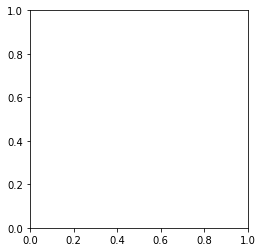

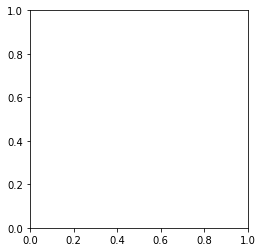

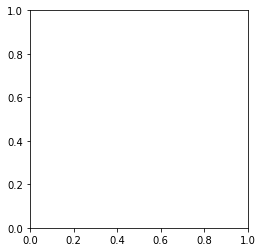

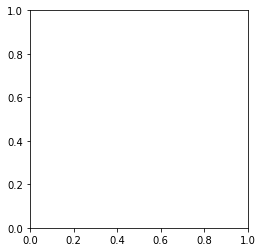

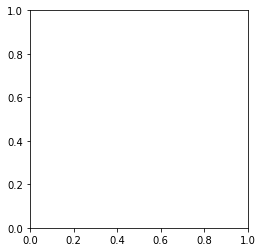

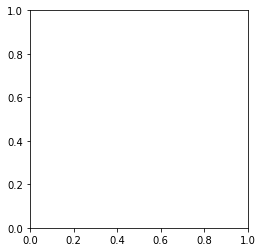

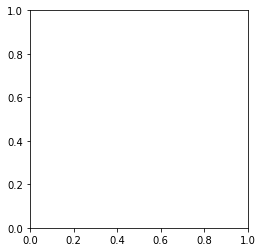

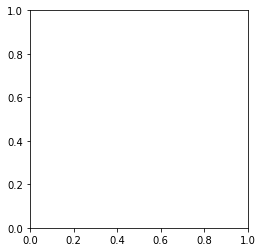

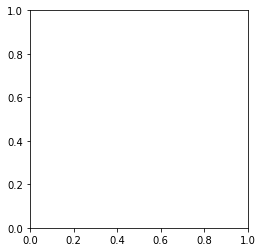

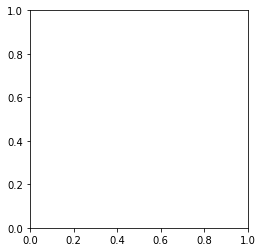

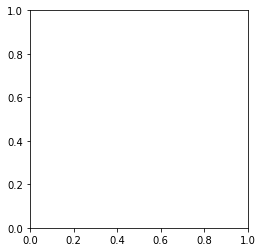

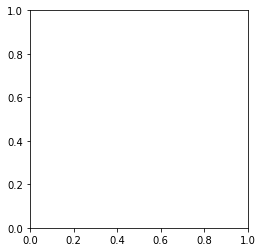

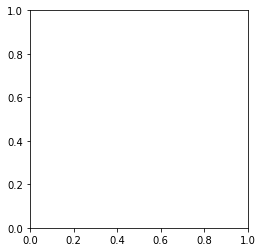

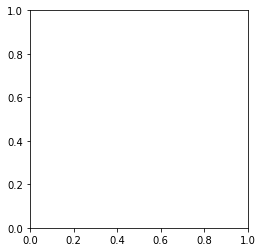

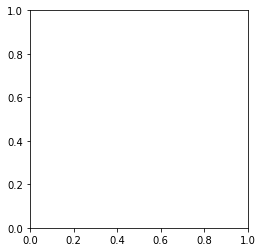

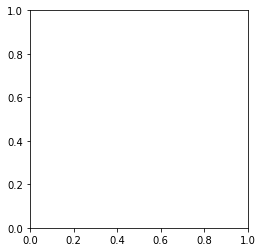

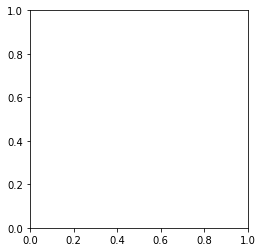

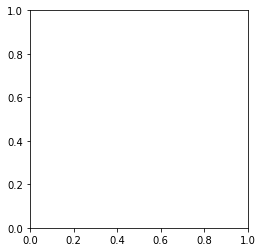

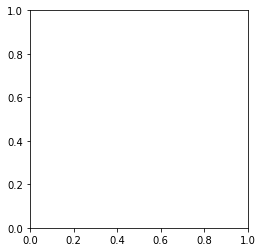

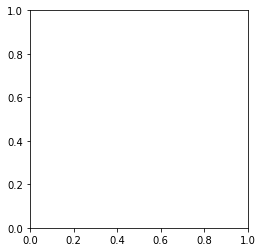

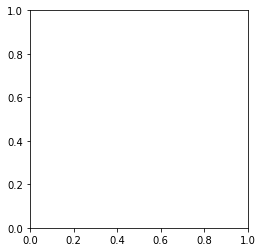

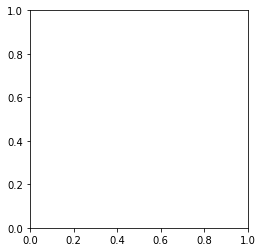

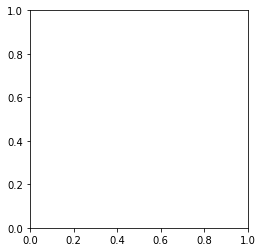

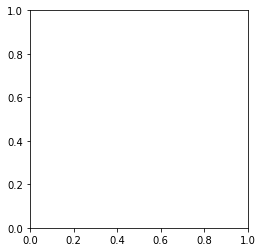

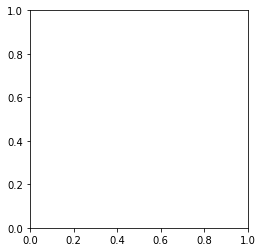

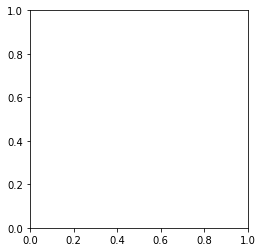

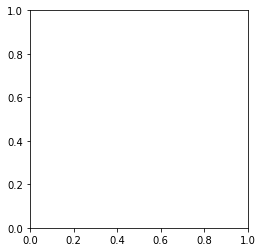

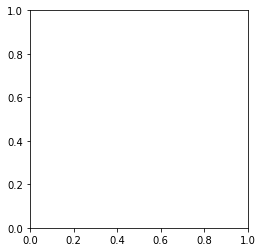

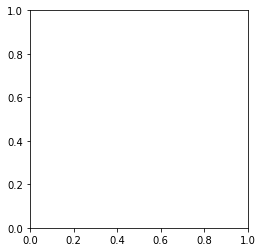

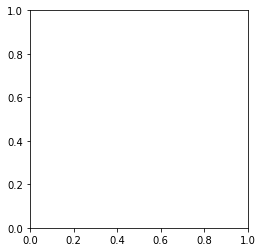

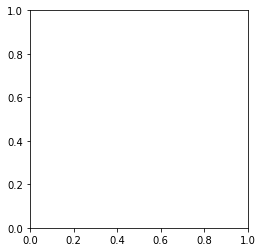

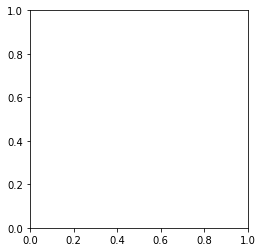

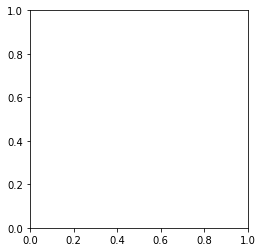

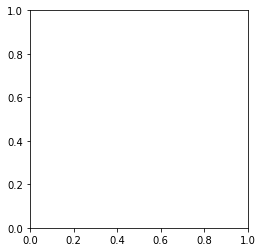

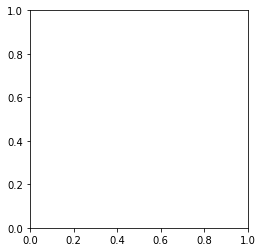

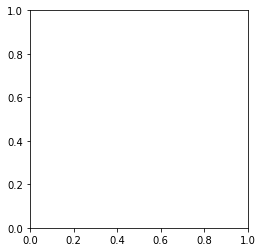

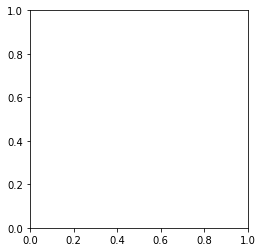

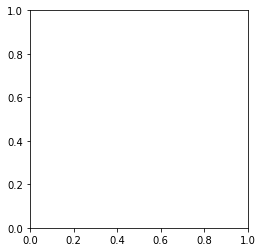

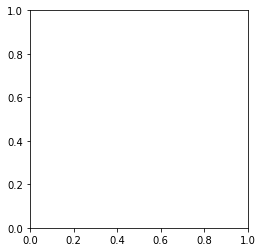

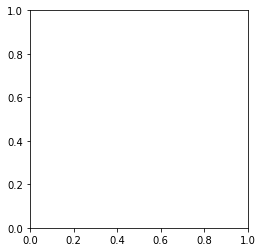

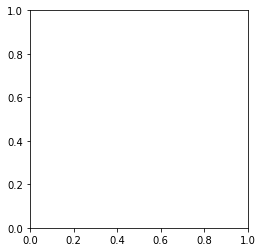

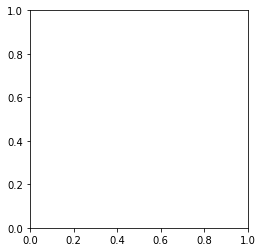

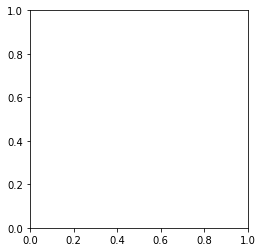

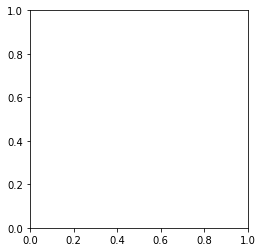

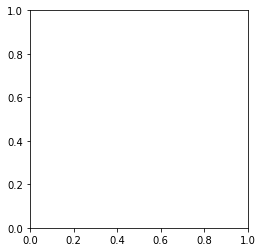

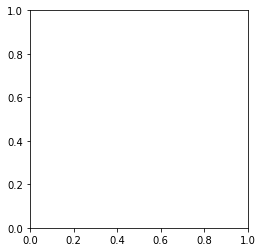

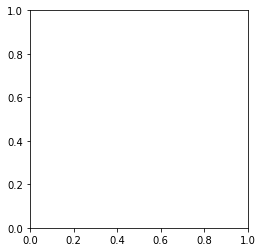

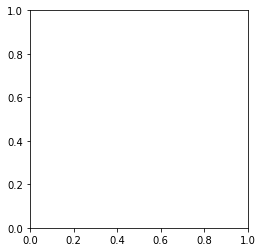

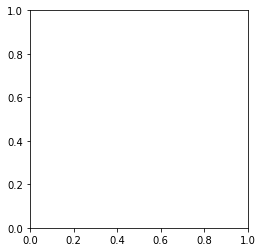

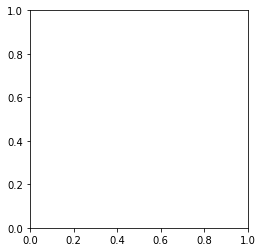

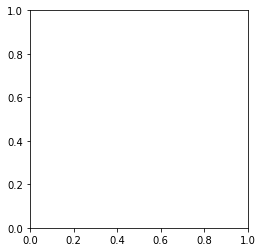

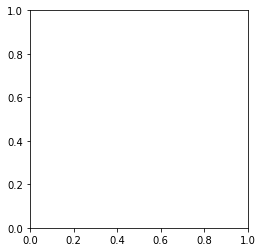

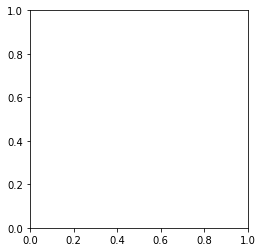

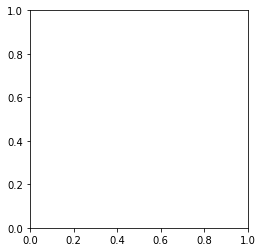

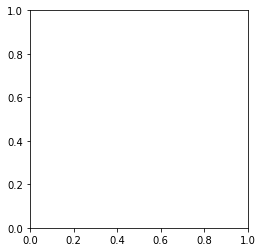

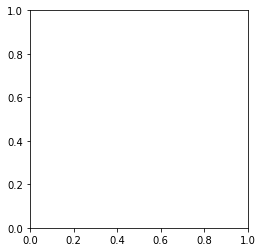

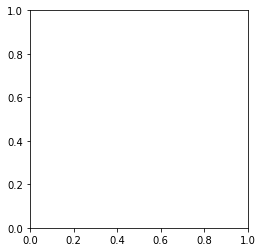

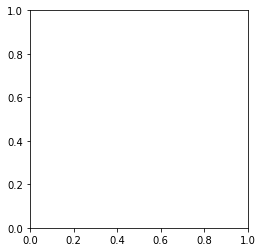

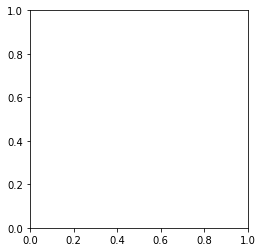

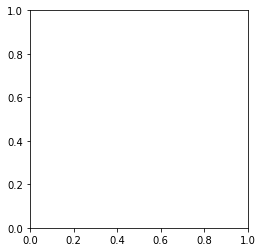

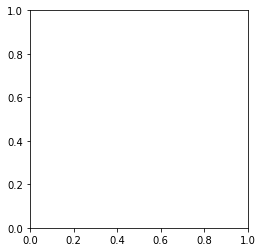

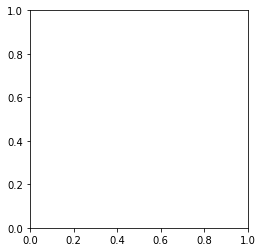

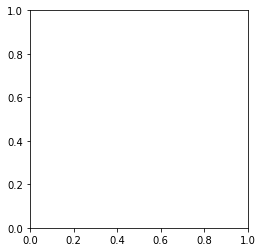

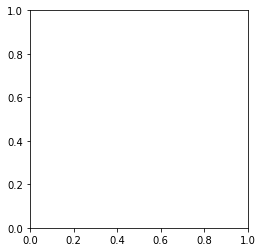

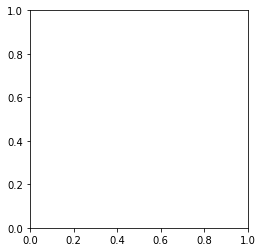

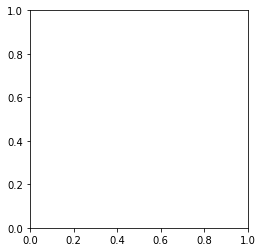

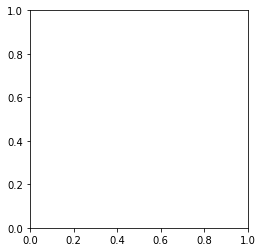

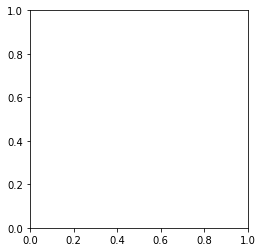

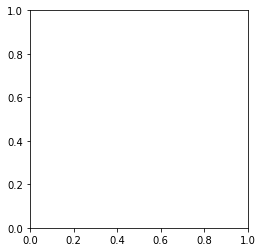

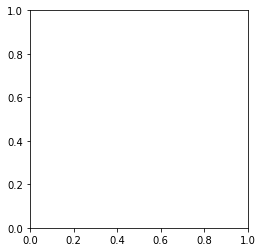

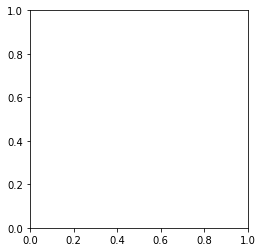

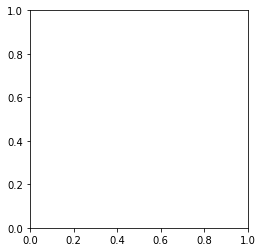

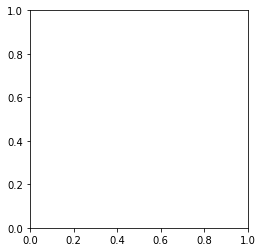

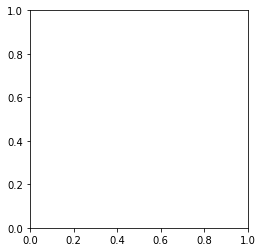

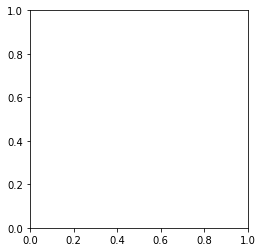

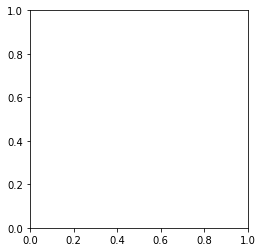

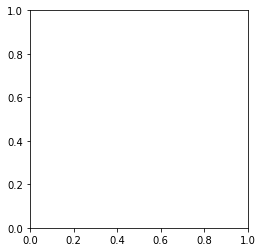

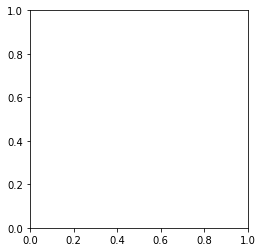

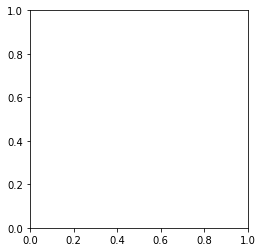

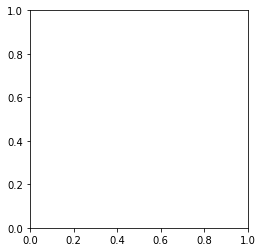

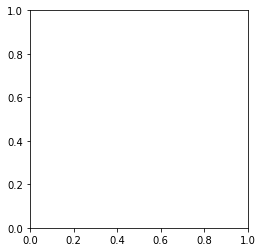

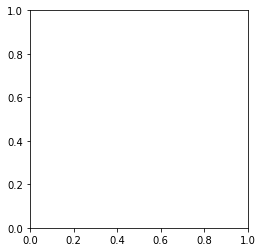

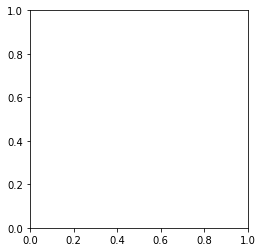

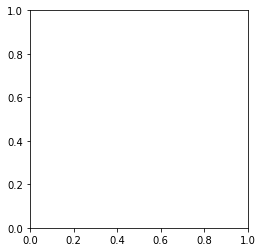

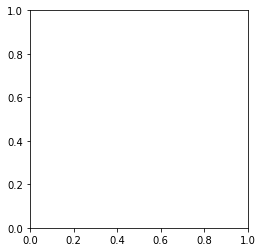

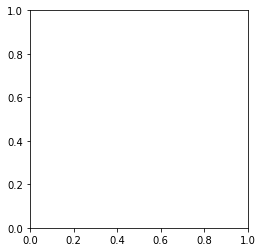

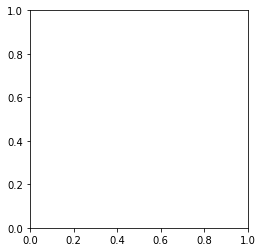

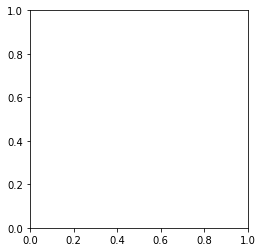

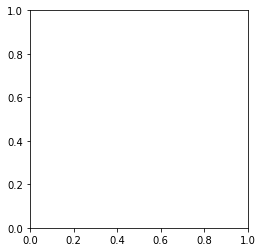

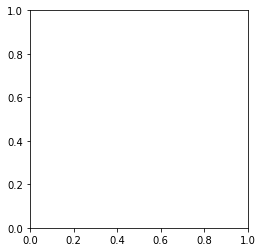

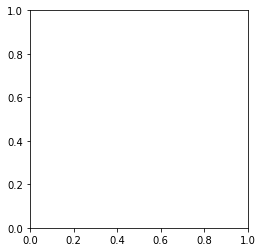

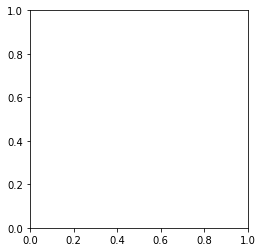

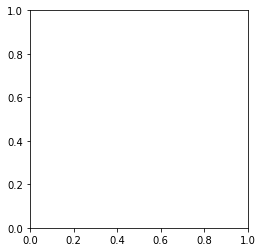

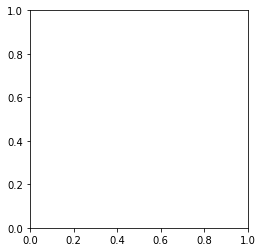

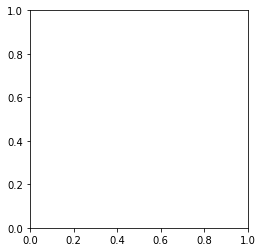

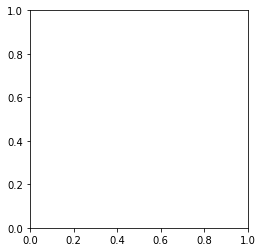

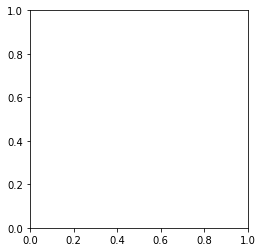

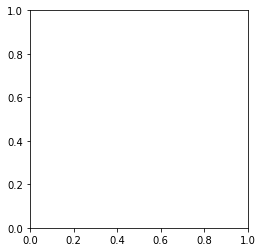

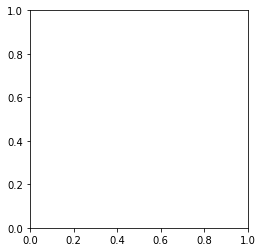

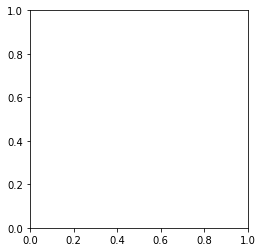

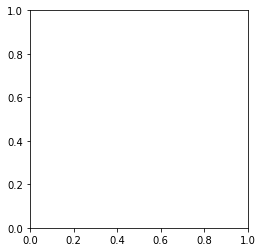

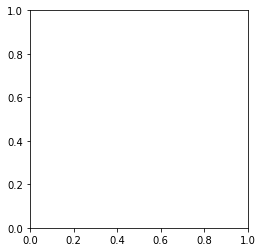

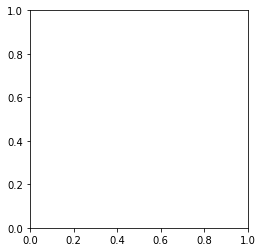

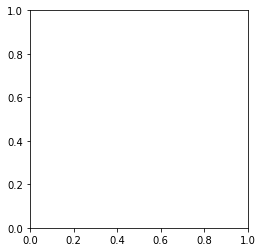

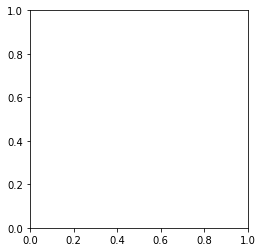

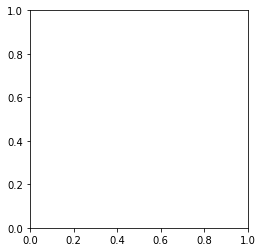

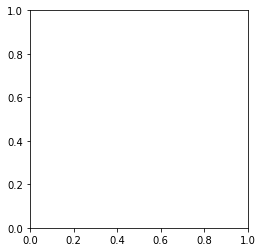

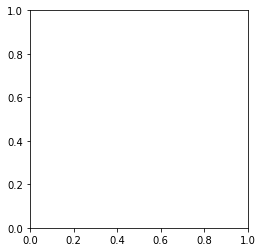

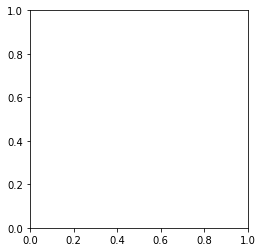

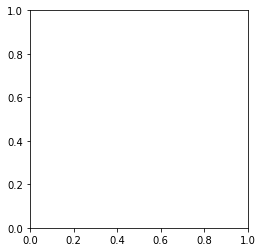

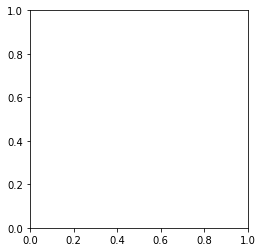

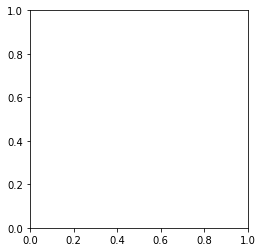

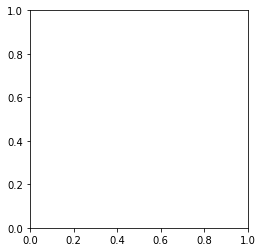

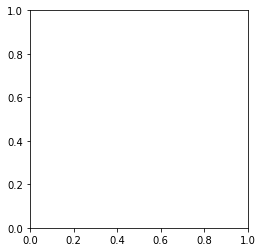

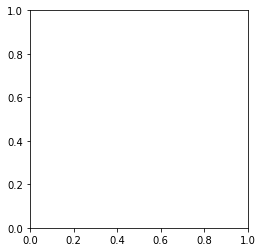

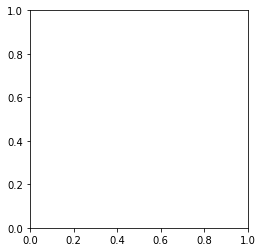

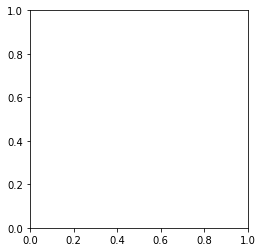

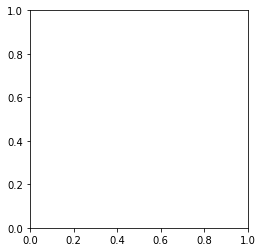

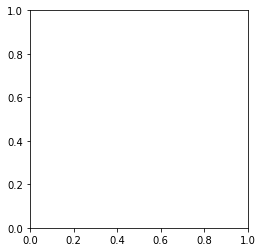

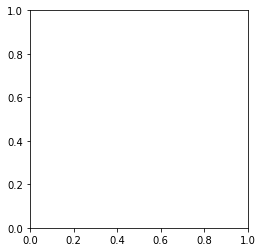

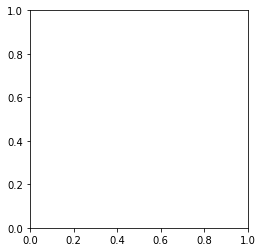

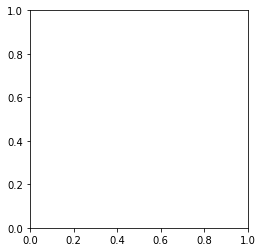

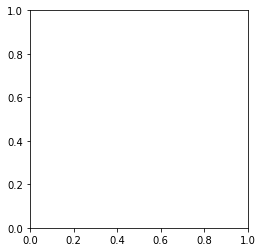

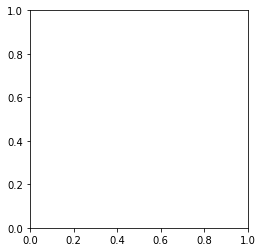

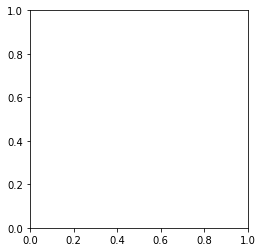

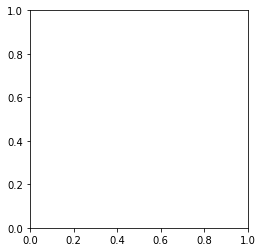

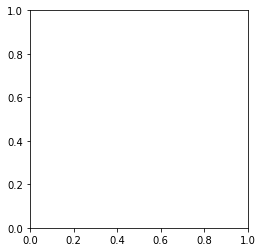

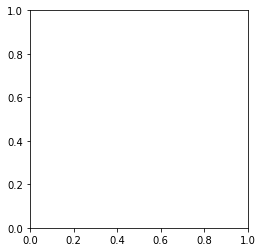

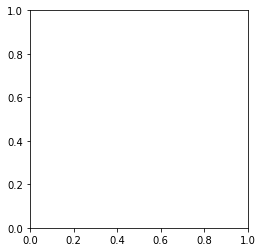

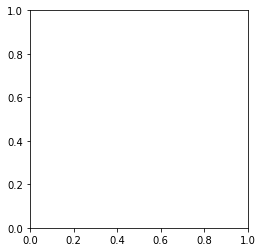

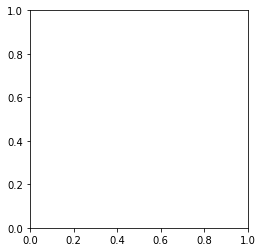

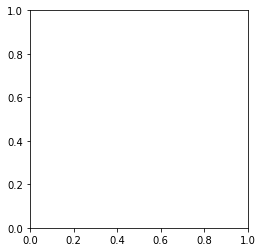

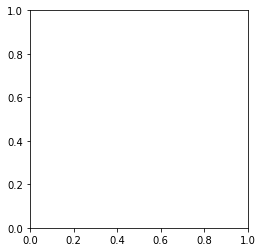

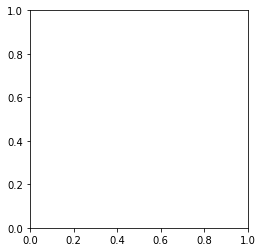

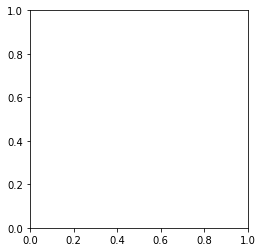

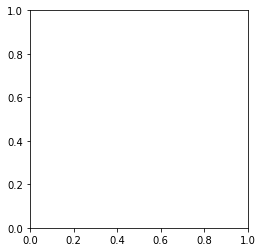

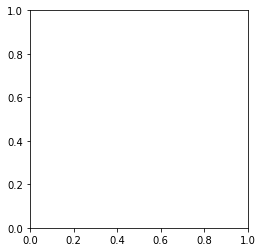

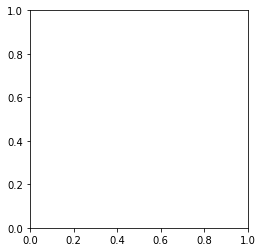

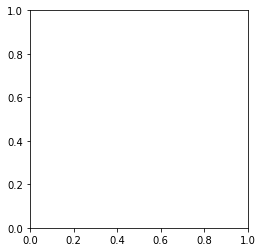

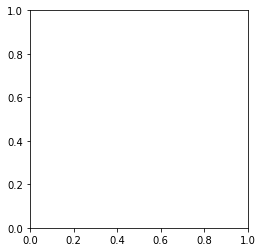

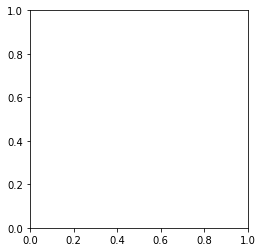

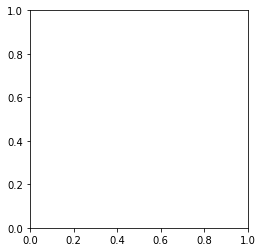

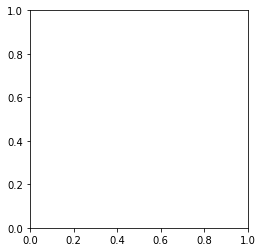

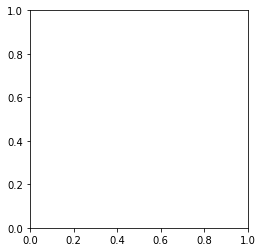

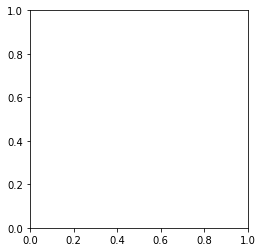

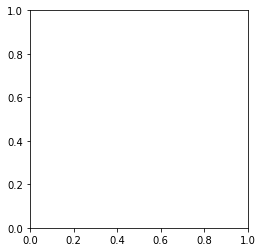

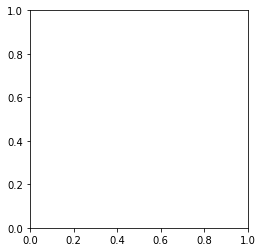

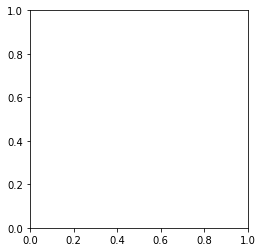

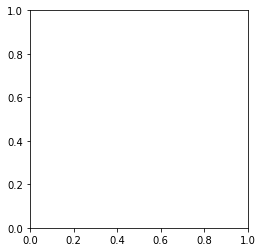

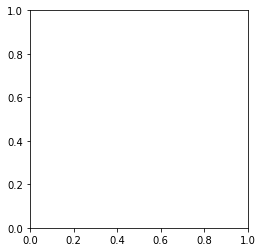

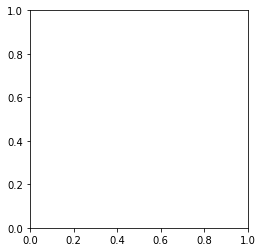

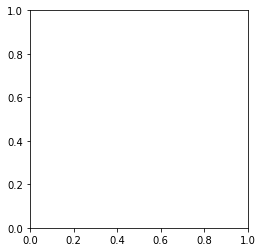

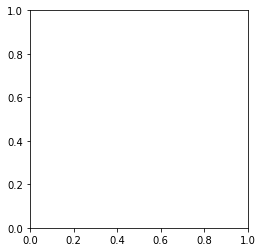

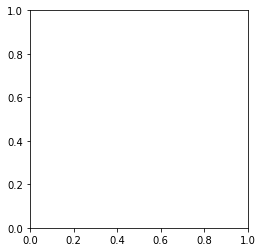

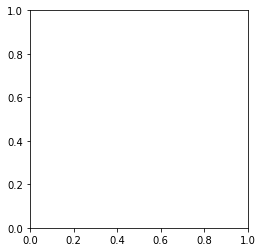

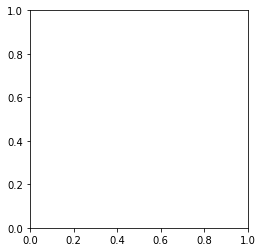

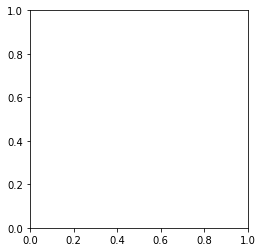

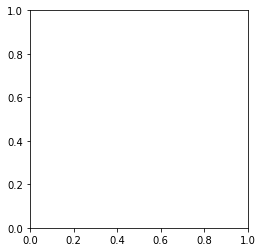

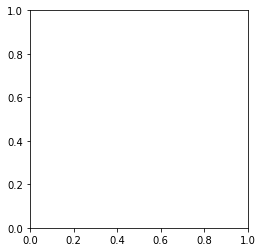

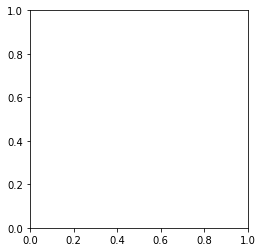

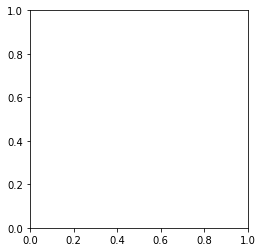

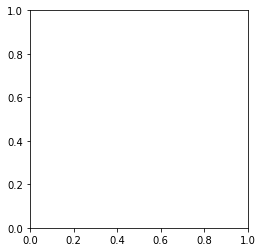

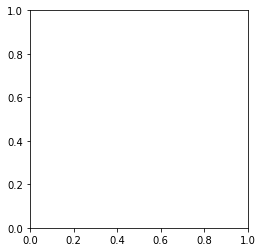

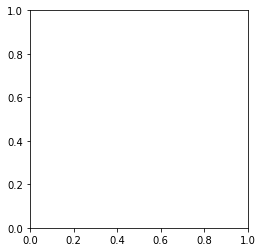

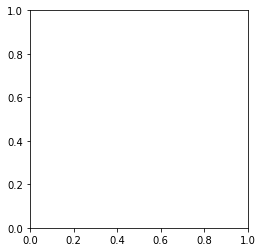

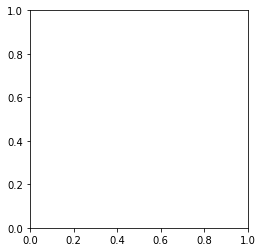

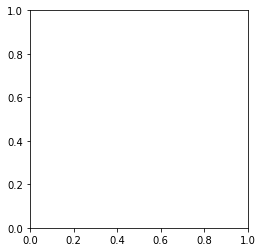

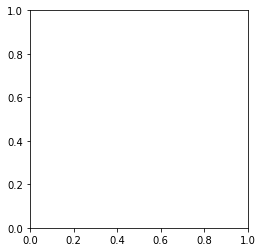

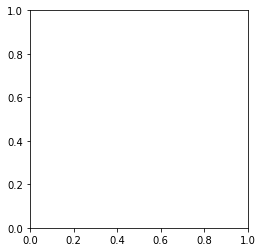

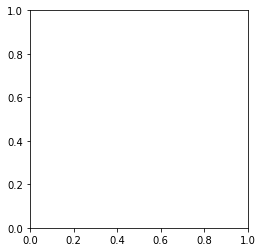

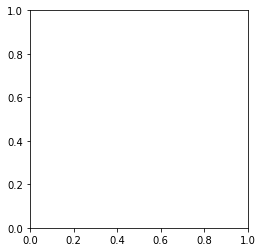

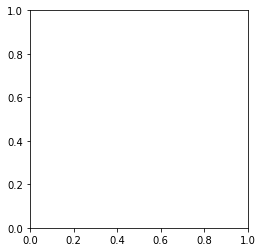

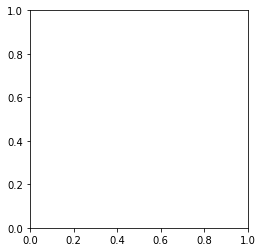

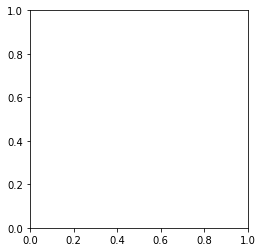

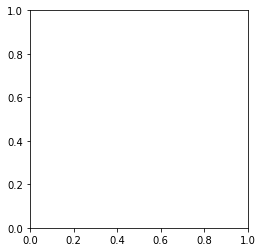

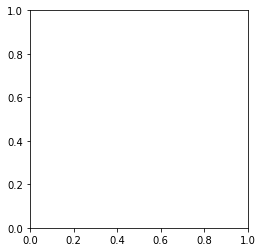

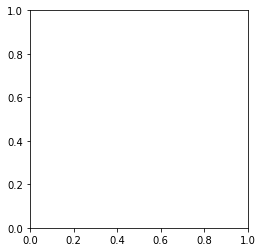

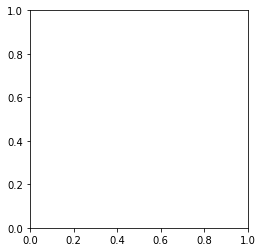

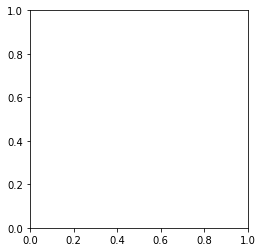

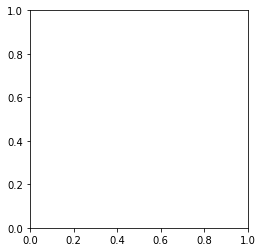

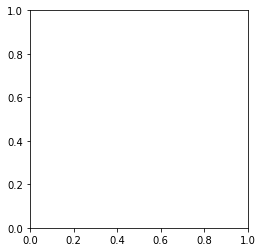

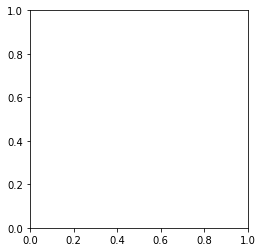

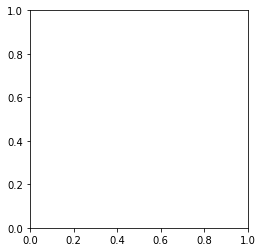

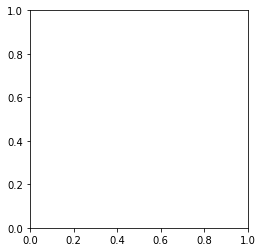

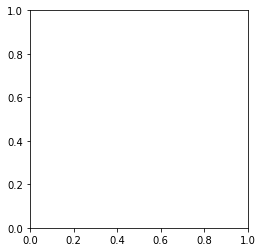

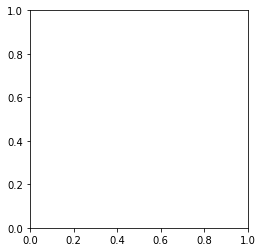

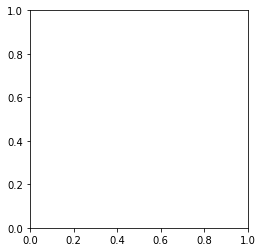

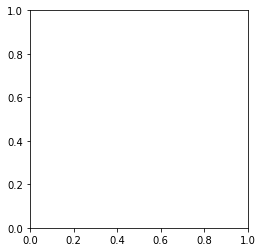

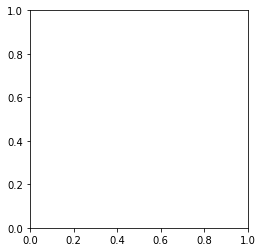

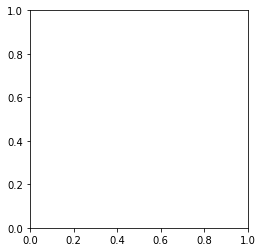

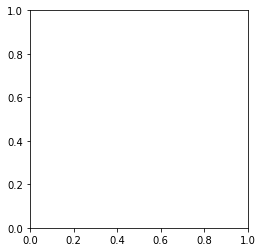

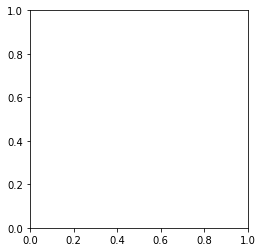

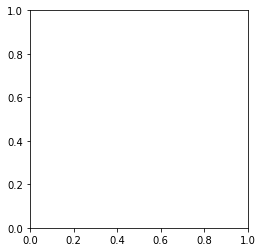

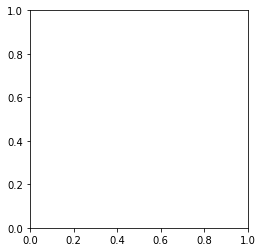

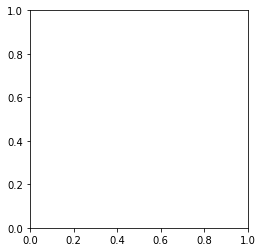

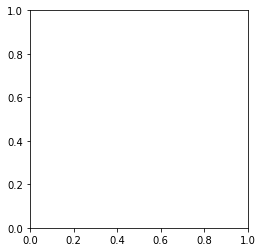

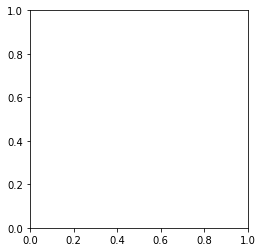

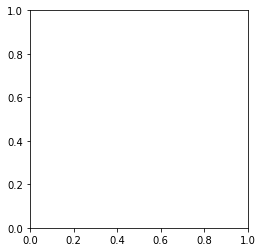

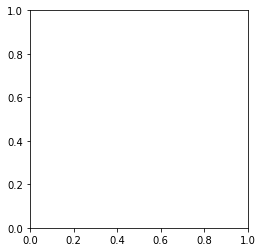

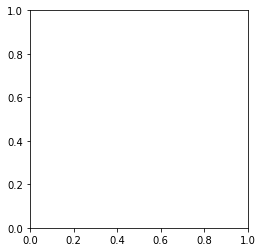

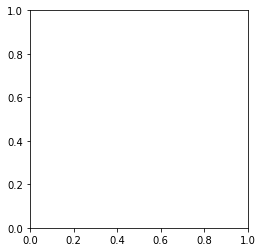

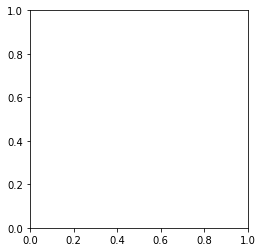

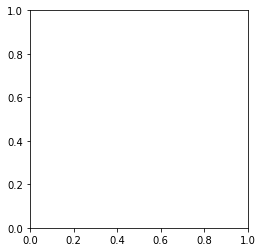

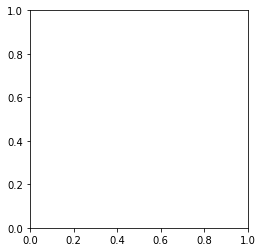

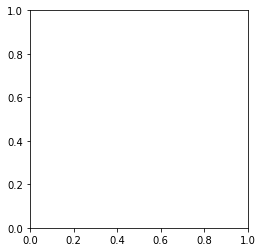

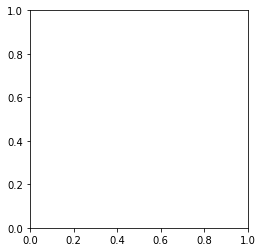

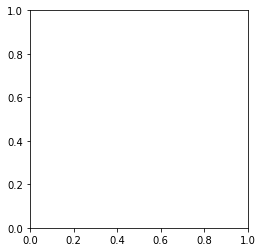

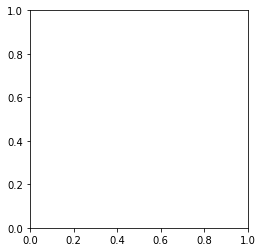

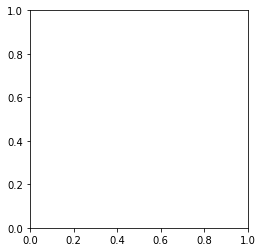

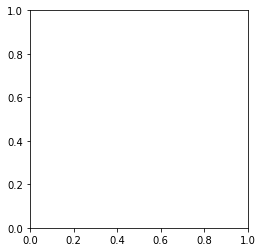

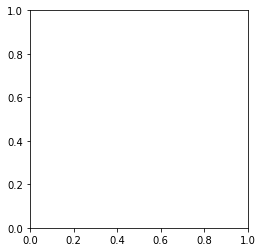

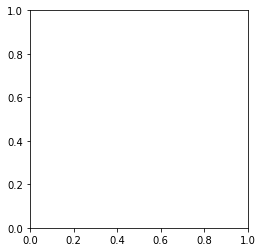

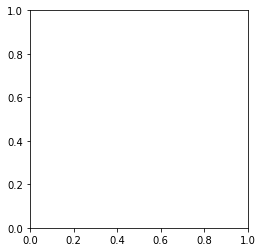

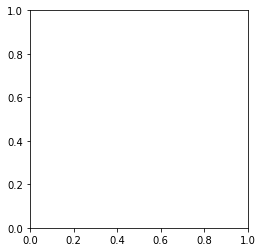

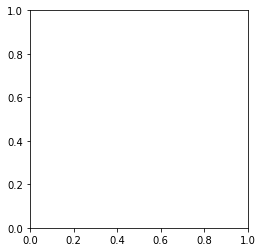

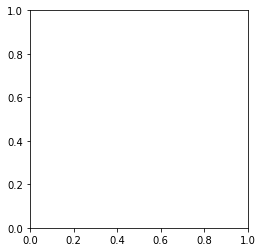

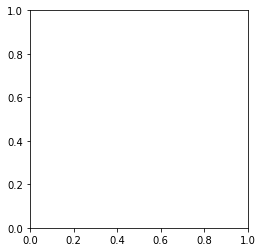

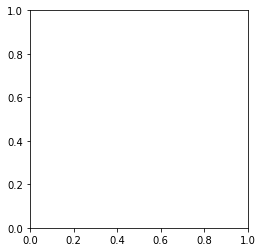

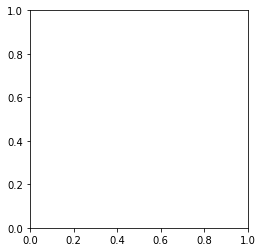

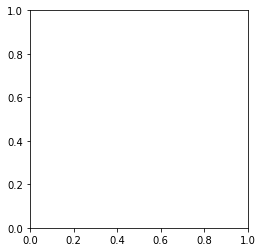

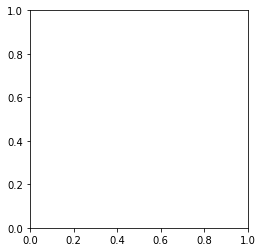

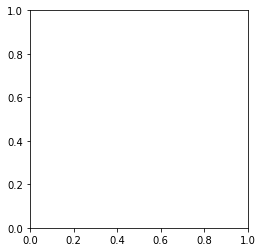

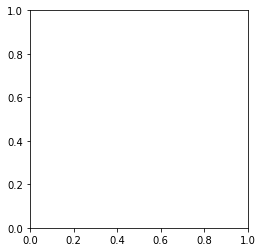

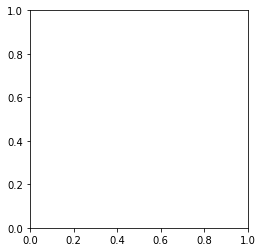

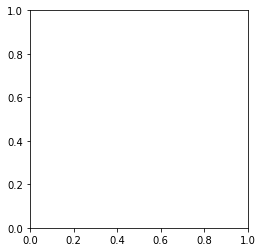

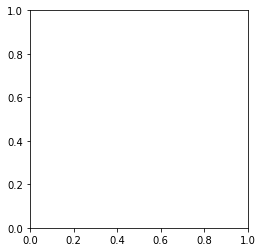

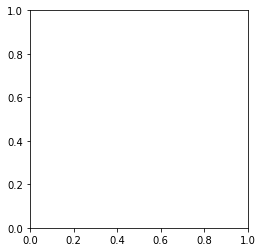

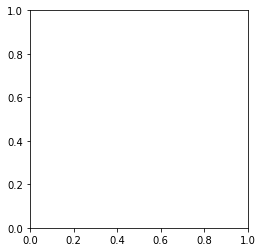

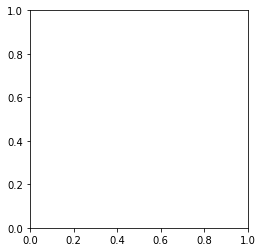

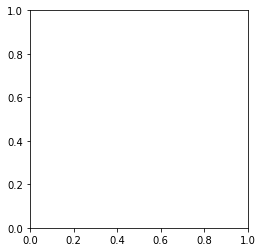

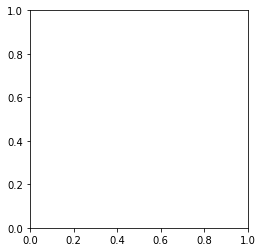

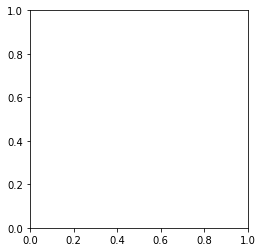

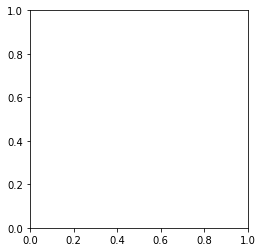

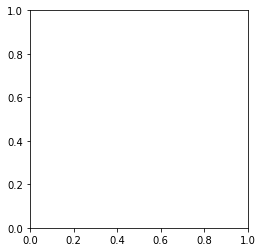

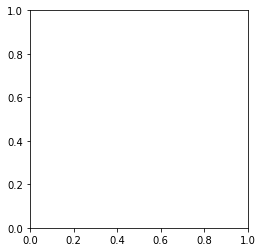

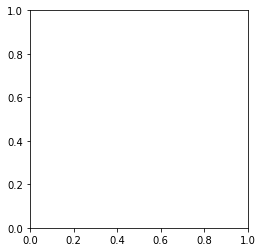

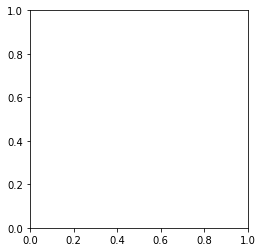

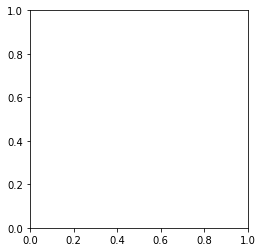

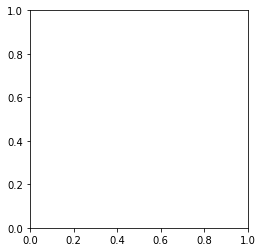

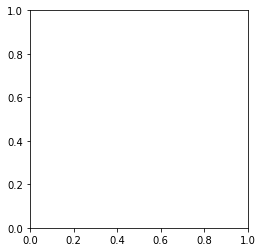

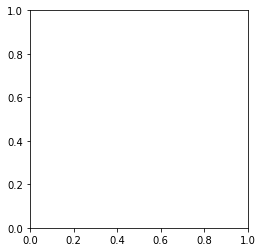

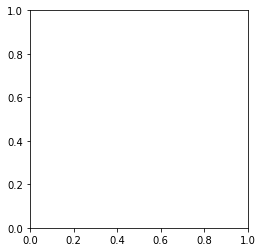

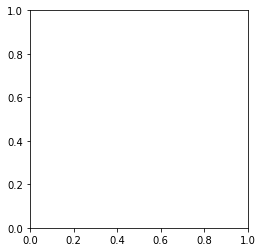

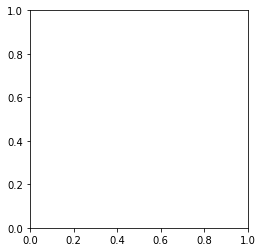

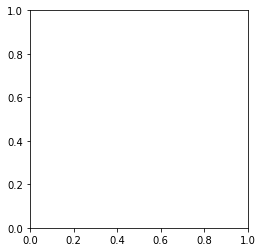

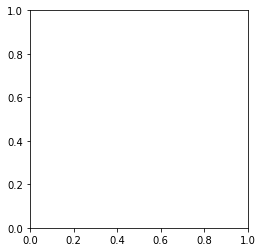

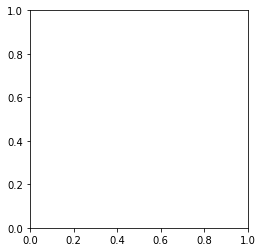

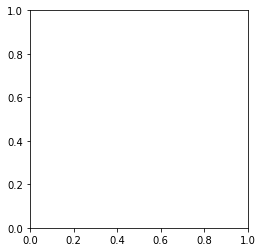

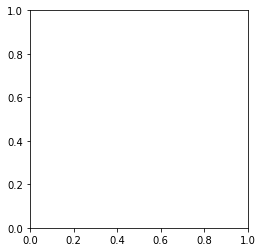

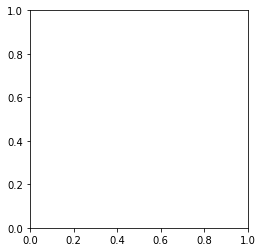

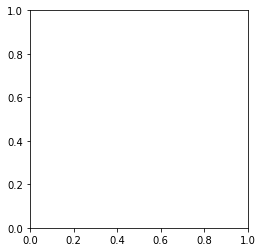

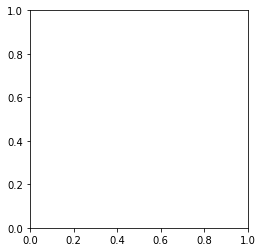

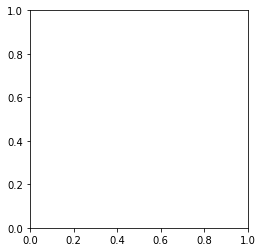

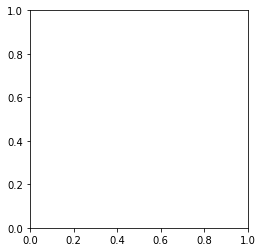

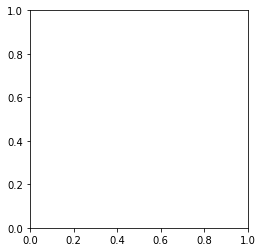

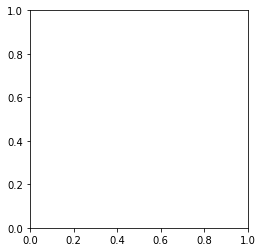

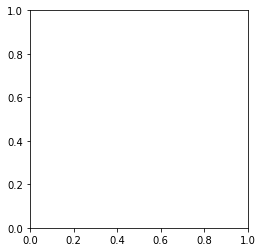

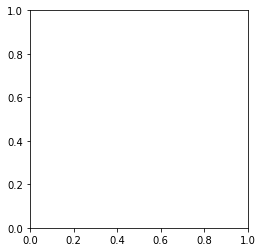

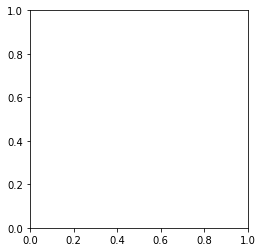

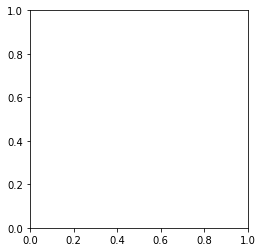

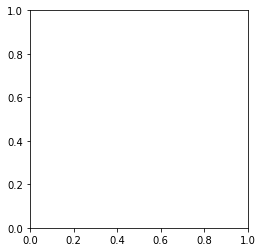

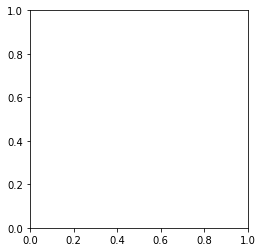

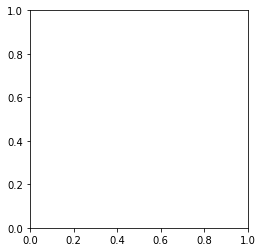

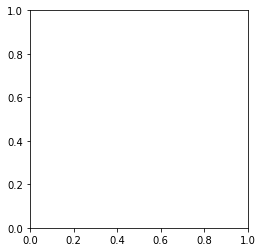

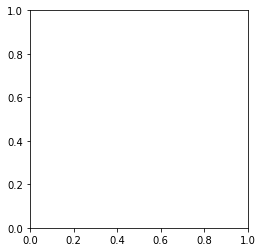

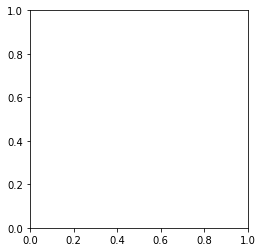

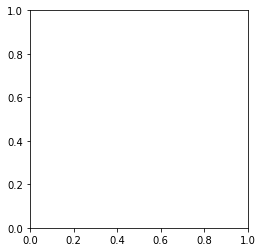

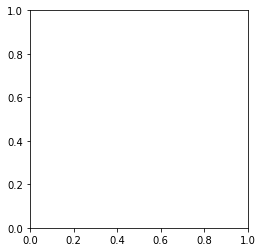

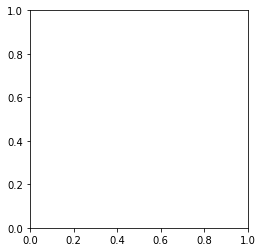

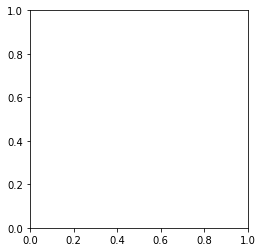

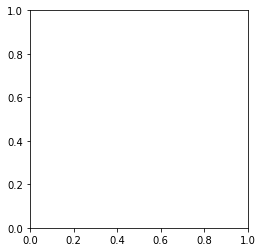

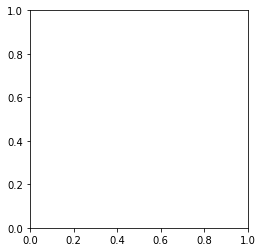

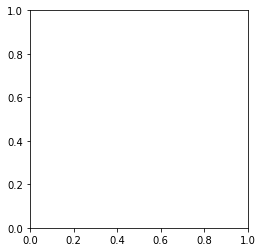

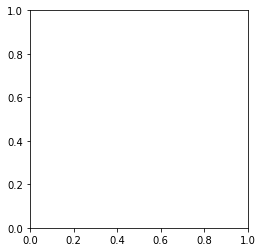

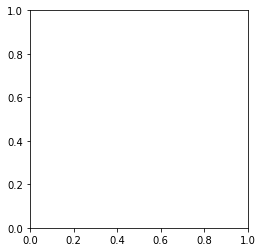

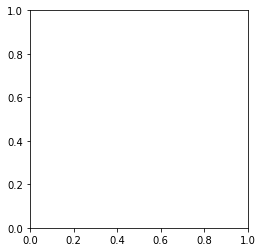

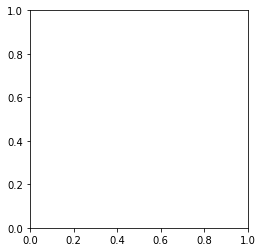

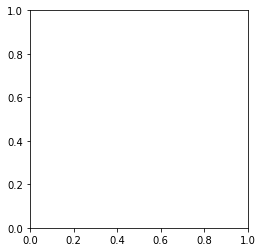

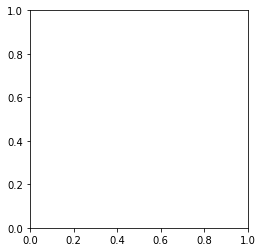

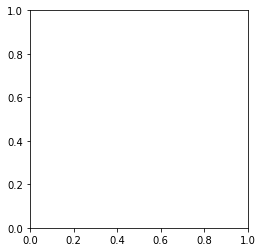

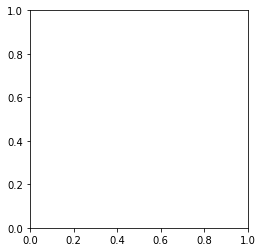

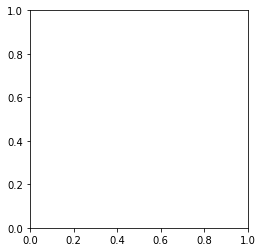

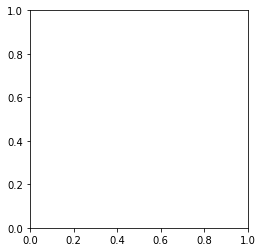

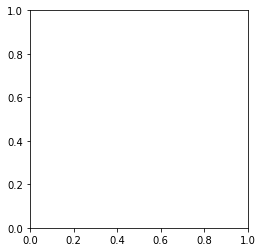

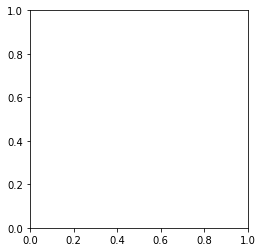

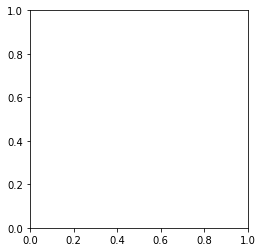

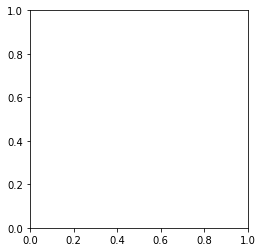

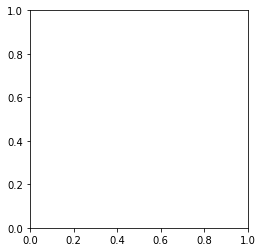

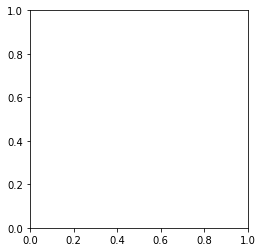

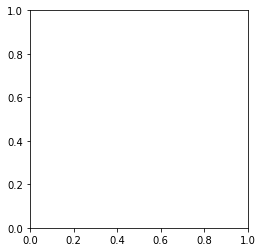

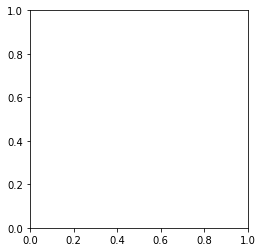

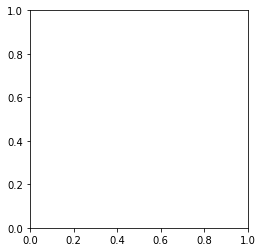

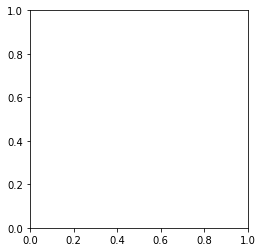

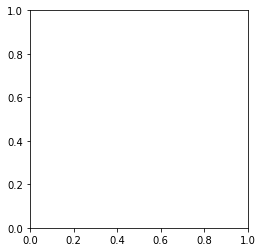

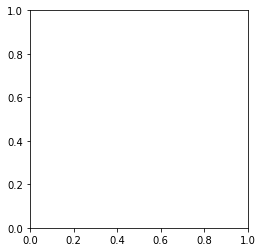

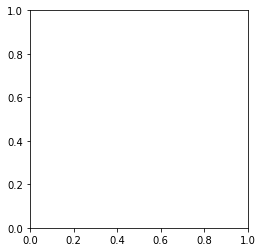

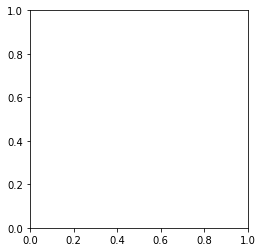

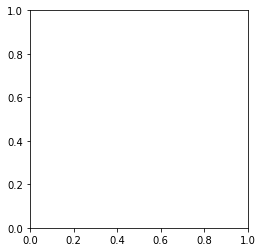

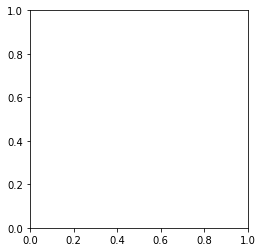

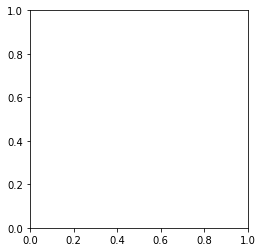

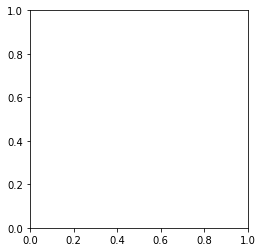

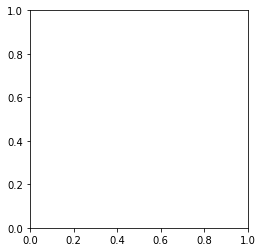

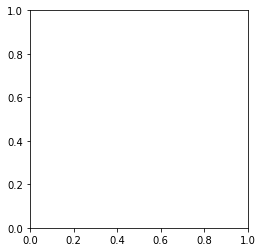

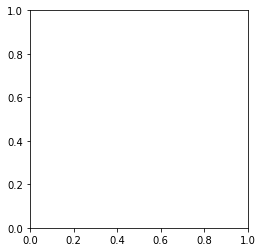

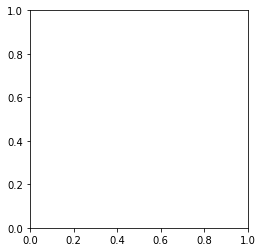

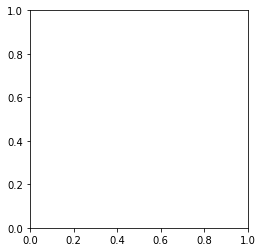

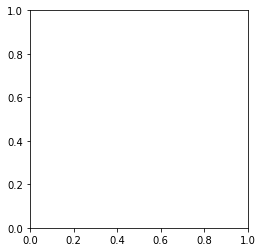

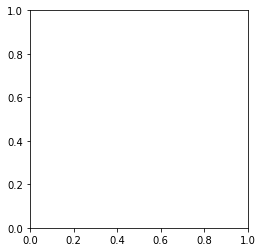

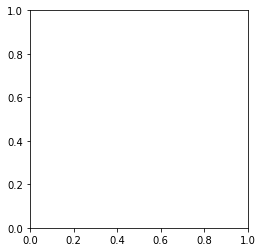

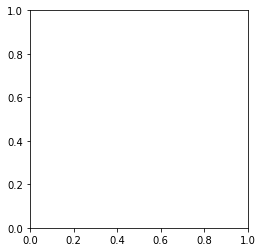

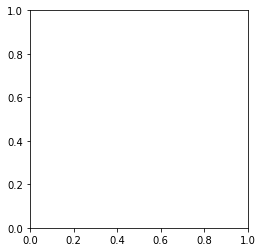

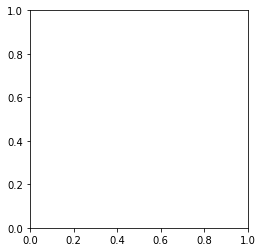

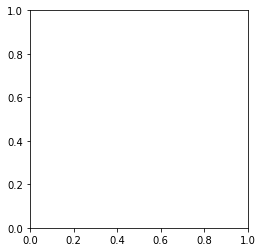

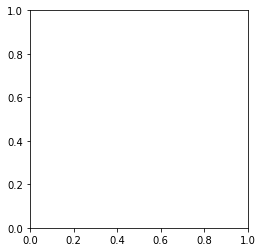

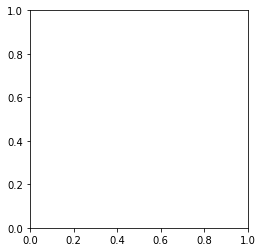

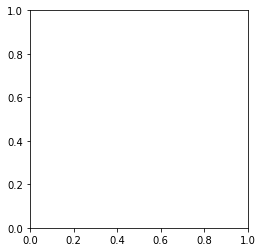

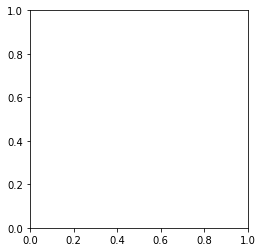

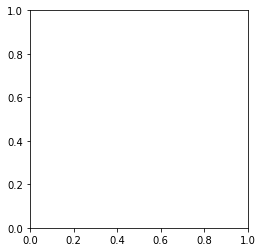

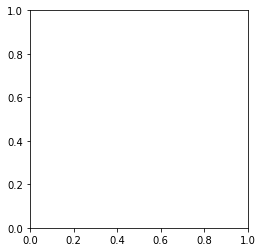

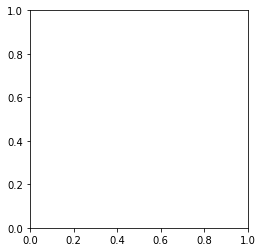

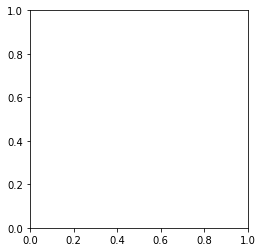

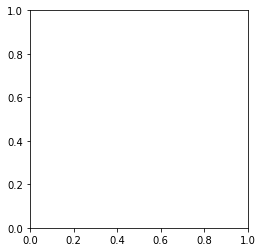

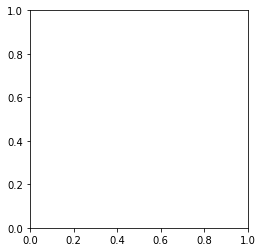

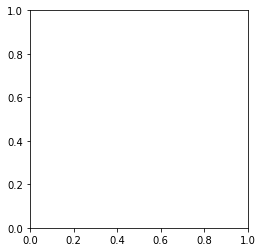

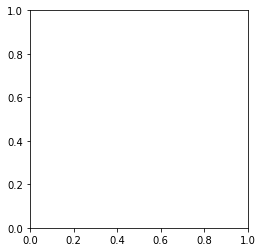

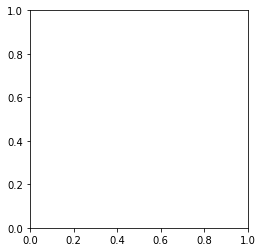

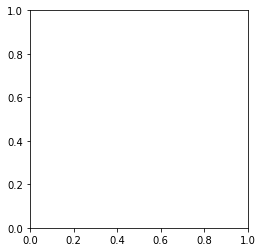

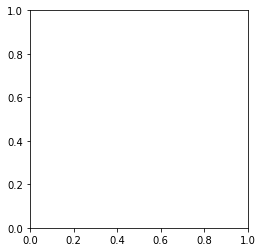

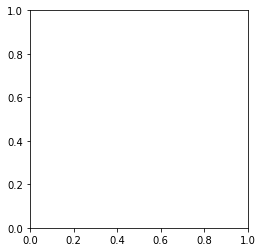

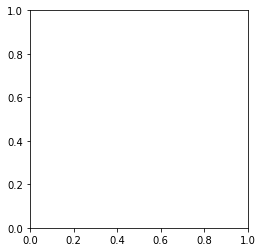

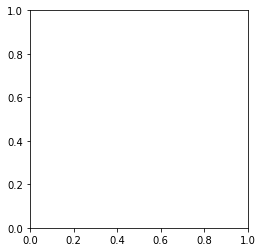

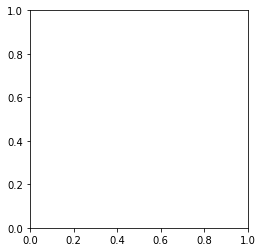

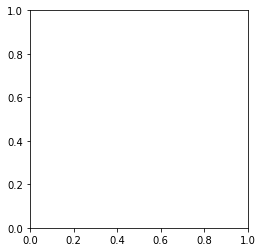

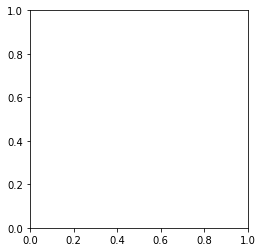

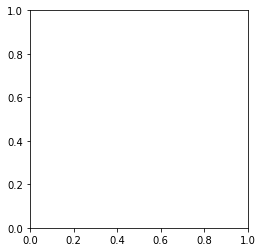

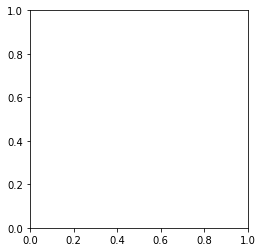

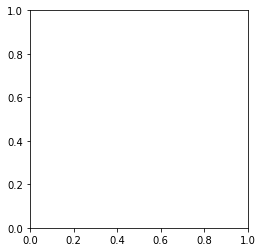

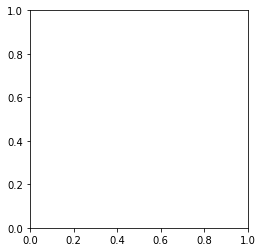

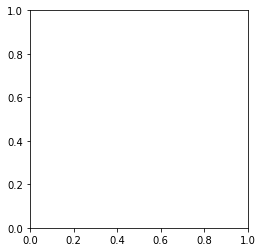

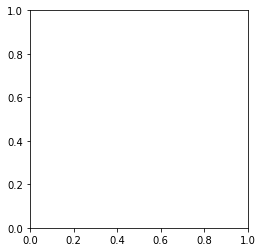

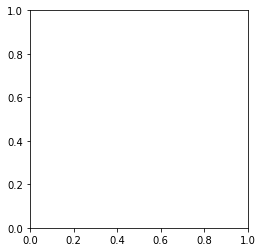

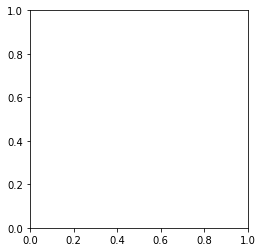

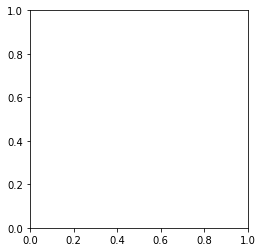

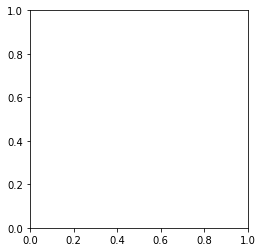

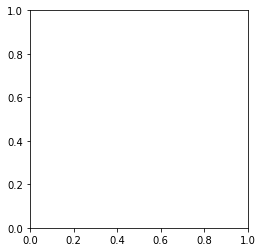

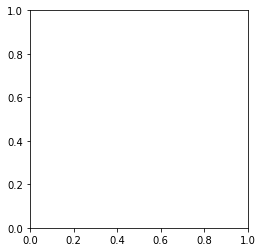

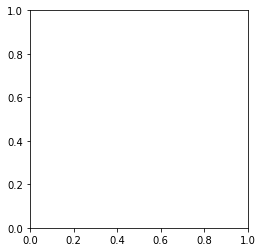

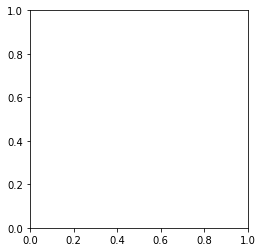

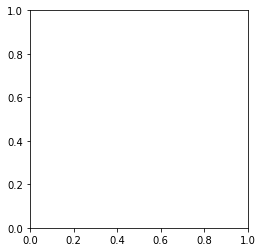

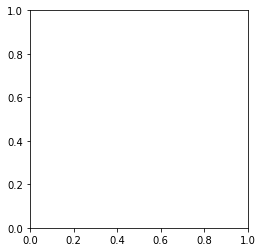

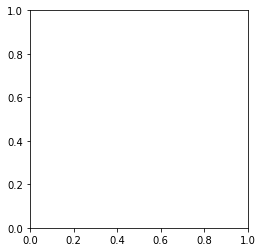

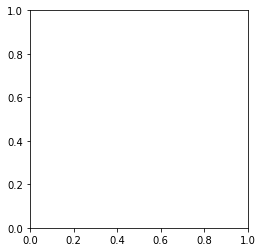

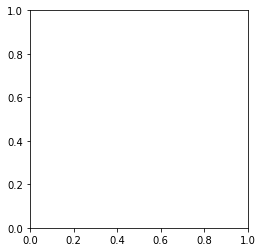

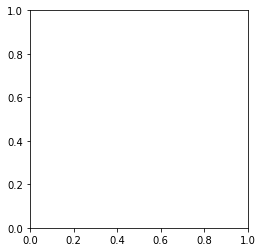

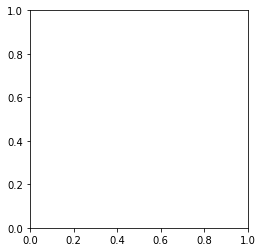

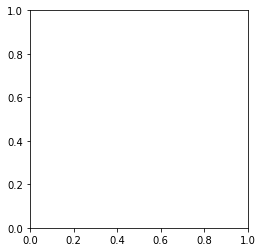

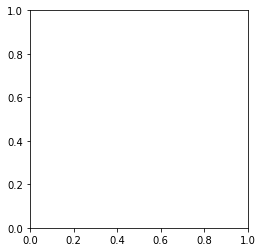

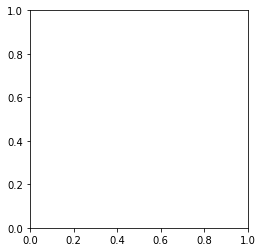

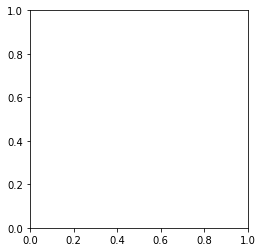

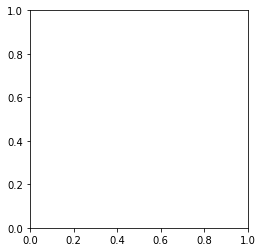

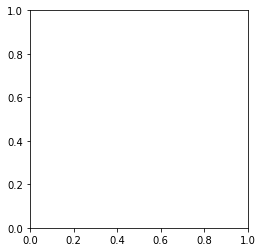

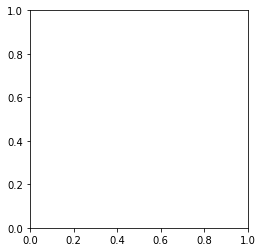

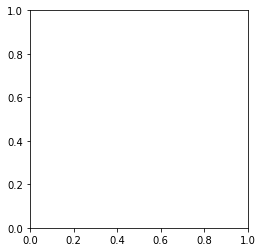

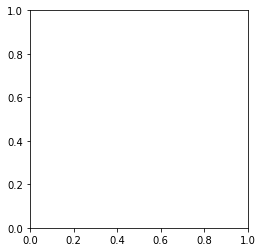

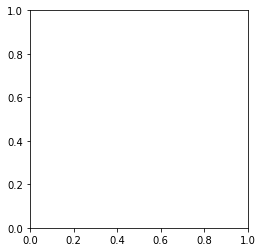

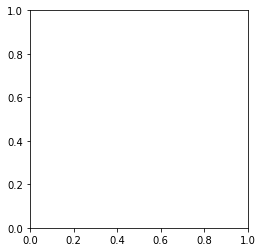

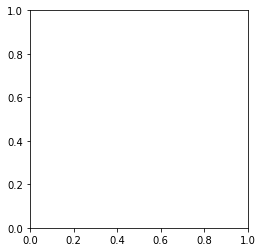

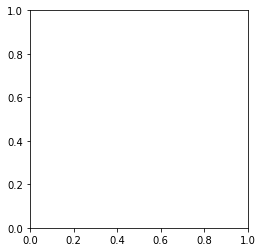

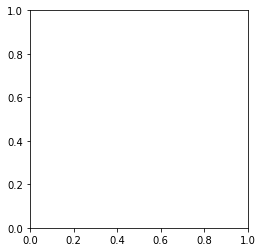

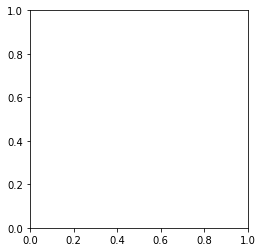

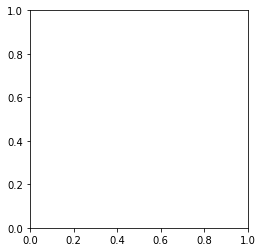

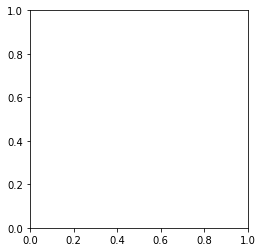

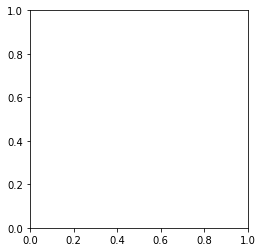

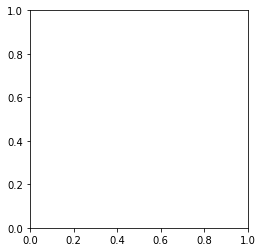

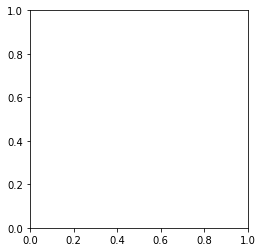

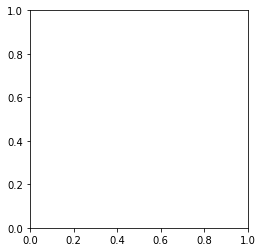

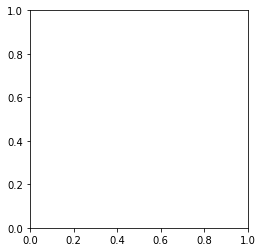

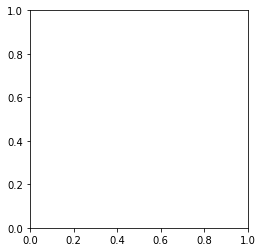

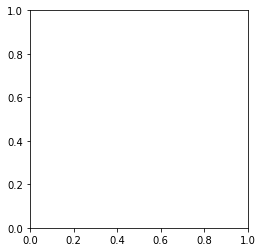

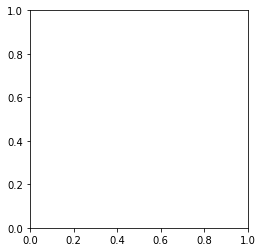

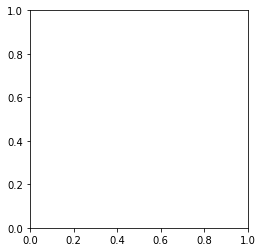

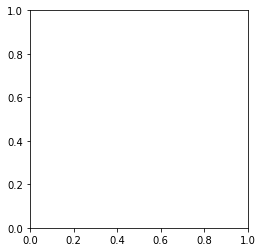

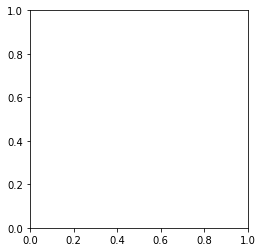

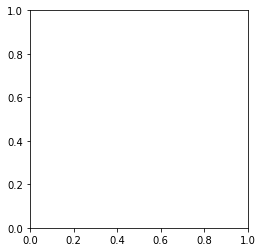

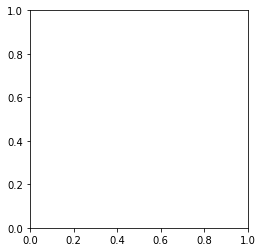

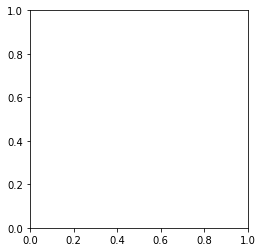

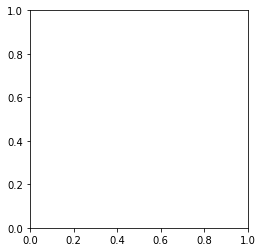

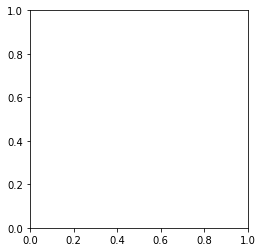

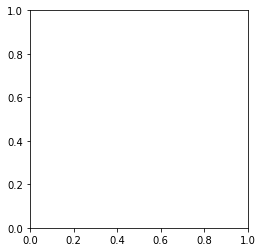

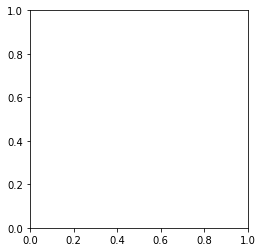

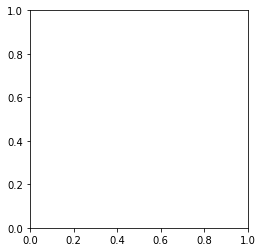

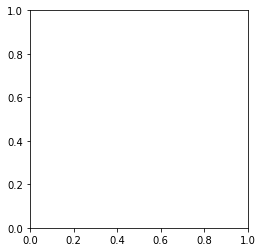

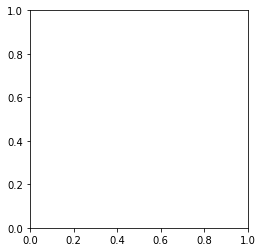

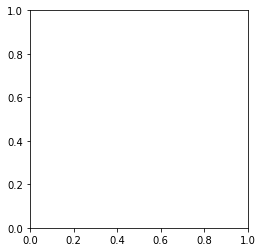

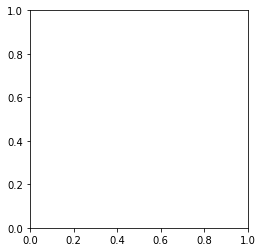

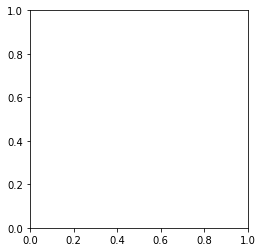

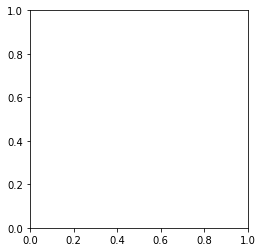

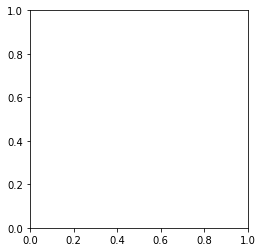

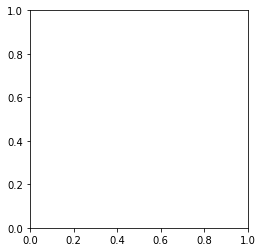

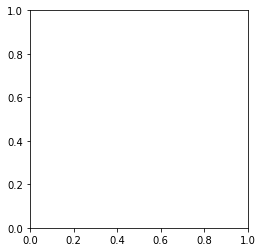

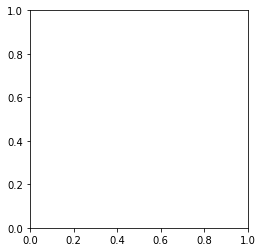

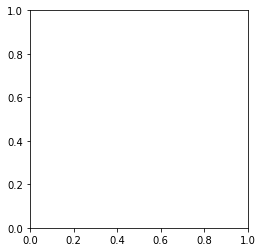

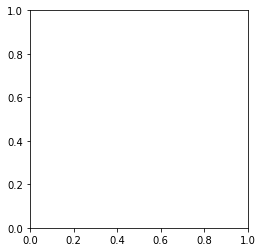

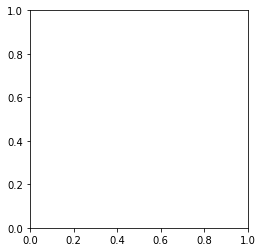

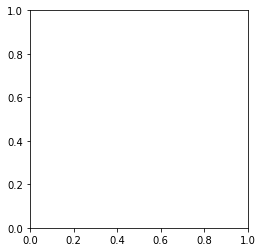

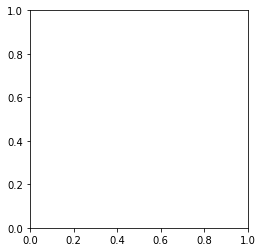

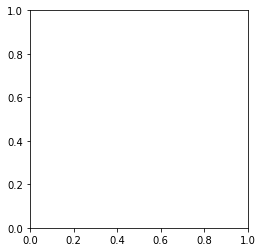

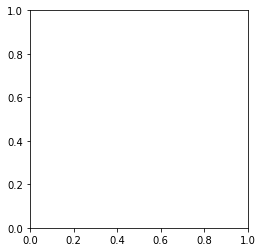

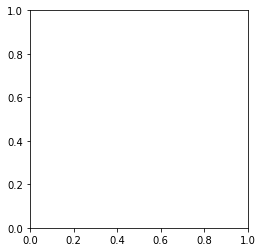

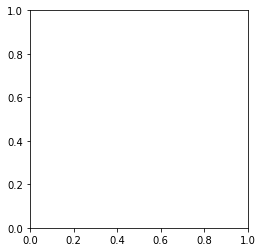

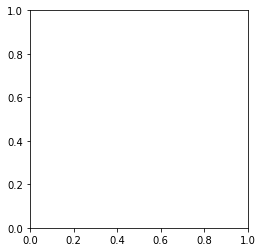

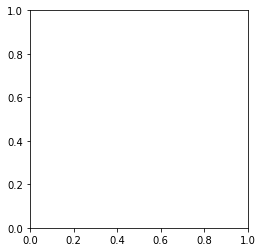

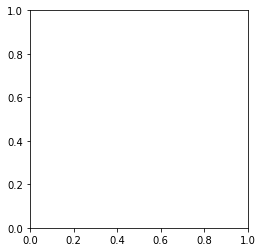

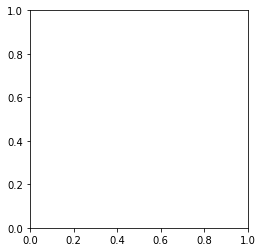

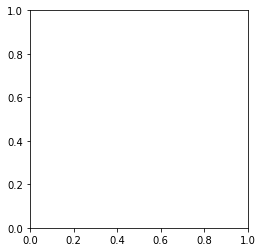

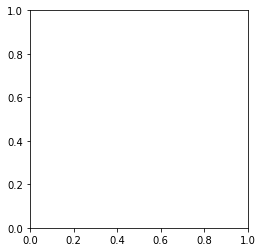

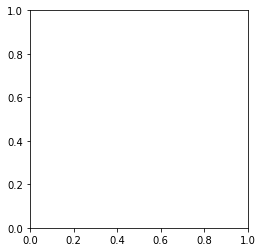

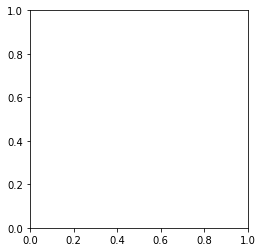

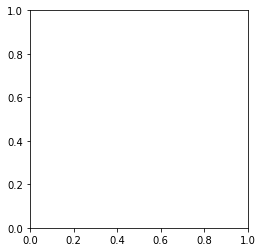

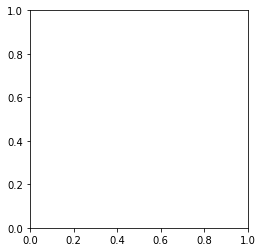

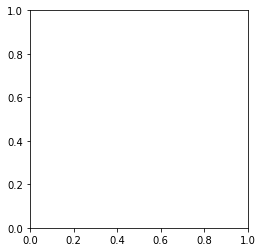

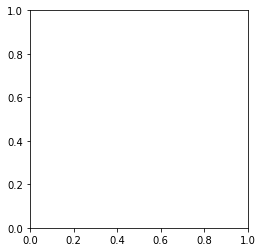

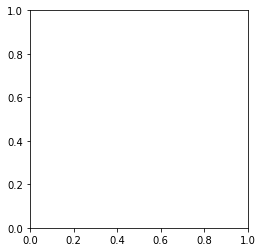

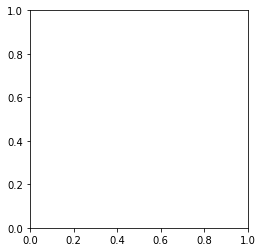

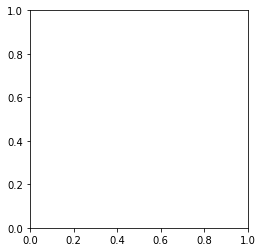

In [12]:
#define function that gathers the landmarks and stores into csv

def Landmark_to_CSV(image_name):
    image=cv2.imread(image_name)
    # Declaring the model input for images
    Height_R = 96
    Width_R = 96
    # Change real images height-width to model height-width ratio 
    Ratio_H = image.shape[0] /  Height_R
    Ratio_W = image.shape[1] /  Width_R
    # List to store Landmarks
    landmarks_x = []
    landmarks_y = []
    # print(image)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Detect the face
    rects = detector(gray, 1)
    # Detect landmarks for each face
    for rect in rects:
        # Get the landmark points
        shape = predictor(gray, rect)
        # Convert it to the NumPy Array
        shape_np = np.zeros((81, 2), dtype="int")
        for i in range(0, 81):
            landmarks_x.append(shape.part(i).x)
            landmarks_y.append(shape.part(i).y)
        shape = shape_np

        # Make some example data
        x = landmarks_x
        y = landmarks_y

        # Create a figure. Equal aspect so circles look circular
        fig,ax = plt.subplots(1)
        ax.set_aspect('equal')

        # Now, loop through coord arrays, and create a circle at each x,y pair
        for (x,y) in zip(landmarks_x, landmarks_y):
        # Draw the circle to mark the keypoint 
            cv2.circle(image, (x,y), 1, (0, 0, 255), -1)

        plt.show()
        fig.savefig('plot.png')
        #cv2.imwrite('output_face.png',image)
    # Collect all the Landmarks Normalise to height-width & Store it to csv    
    all_landmarks = []
    filename = image_name
    all_landmarks.append(filename)
    for i,j in zip(landmarks_x,landmarks_y):

        all_landmarks.append(i/Ratio_W) 
        all_landmarks.append(j/Ratio_H)


    l = [all_landmarks]
    with open('81croplandmarks.csv', 'a') as f: 
        write = csv.writer(f)
        write.writerows(l)
        
    return all_landmarks



#Give path to the folder that has images (make sure all images are in .jpg format)
path = "/home/jhanvipatel/Desktop/PythonTasks/crop_faces/"

for x in os.listdir(path):
    if x.endswith(".jpg"):
#         print(x)
        Landmark_to_CSV(x)